# Result Summary 
This notebook serve as a centralized hub to display following main results: Please be noted that all analysis here are conducted using only the tad that contains more than 16 cpg/h3k9ac peak. For the old results, please see result summary archived

A. Overview

0. upsetR plot for SNPs
1. Landing TSS
2. Annotation
3. Distal signals



## Global result

## Sharing of effect

In [3]:
gene_name = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/../reference_data/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.region_list")


Rows: 60726 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): #chr, gene_id, gene_name
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
options(repr.plot.width =30, repr.plot.height = 20)

In [2]:
library("stringr")
library("dplyr")
library("readr")
library("ggplot2")
library("purrr")
library("tidyr")
library("ComplexUpset")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [8]:
shared_snp_16 = readRDS("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/updated_16/haQTL_mQTL_eQTL_pQTL.UpSetR.rds")


In [4]:
h16 = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/haQTL_pure_completed_unlimited_16.tsv")
m16 = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/meQTL_pure_completed_unlimited_16.tsv")
joint = inner_join(h16,m16, by = "variants")

shared_cs_map = joint%>%count(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y)

Rows: 25937 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): variants, ref, alt, molecular_trait_id
dbl (10): snps_index, chromosome, position, cs_order, pip, finemapped_region...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 65155 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): variants, ref, alt, molecular_trait_id
dbl (10): snps_index, chromosome, position, cs_order, pip, finemapped_region...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
upset_stripes

function (mapping = aes(), geom = geom_segment(size = 7), colors = c("white", 
    "grey95"), data = NULL) 
{
    stripes = list(mapping = mapping, geom = geom, colors = colors, 
        data = data)
    class(stripes) = "upset_stripes"
    stripes
}
<bytecode: 0x56260288cec0>
<environment: namespace:ComplexUpset>

In [6]:
a  = readRDS("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/updated_16//haQTL_mQTL_eQTL_pQTL.UpSetR_mQTL_cs.rds")
b  = readRDS("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/updated_16/haQTL_mQTL_eQTL_pQTL.UpSetR_haQTL_cs.rds")
c =  readRDS("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/updated_16/haQTL_mQTL_eQTL_pQTL.UpSetR_eQTL_cs.rds")

combind_cs_ha = rbind(a[[1]],b[[1]]%>%mutate(id = paste0(molecular_trait_id,"_",cs_order ))%>%filter(!id %in% (shared_cs_map%>%mutate(id = paste0(molecular_trait_id.x,"_",cs_order.x ))%>%pull(id) )))%>%filter()
combind_cs_me = rbind(a[[1]]%>%mutate(id = paste0(molecular_trait_id,"_",cs_order ))%>%filter(!id %in% (shared_cs_map%>%mutate(id = paste0(molecular_trait_id.y,"_",cs_order.y ))%>%pull(id) )),b[[1]])%>%filter()
cs_e = c[[1]]%>%mutate(id = paste0(molecular_trait_id,"_",cs_order ))%>%filter(!haQTL & !mQTL )
combind_cs = rbind(combind_cs_me%>%mutate(cs_order = as.character(cs_order)), cs_e)
e = upset(combind_cs%>%dplyr::select(haQTL,mQTL,eQTL,pQTL)%>%as.data.frame,intersect = c("mQTL","haQTL","eQTL","pQTL"),
  keep_empty_groups = F,
      base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 5)  )+ylab("")+annotate("point", y = 2500, x = c(4:14), color = "blue"  )   ) ,
          themes=upset_default_themes(axis.text=element_text(size=30), axis.title.x = element_blank()  )     ,  
          min_degree = 1)

Adding missing grouping variables: `molecular_trait_id`


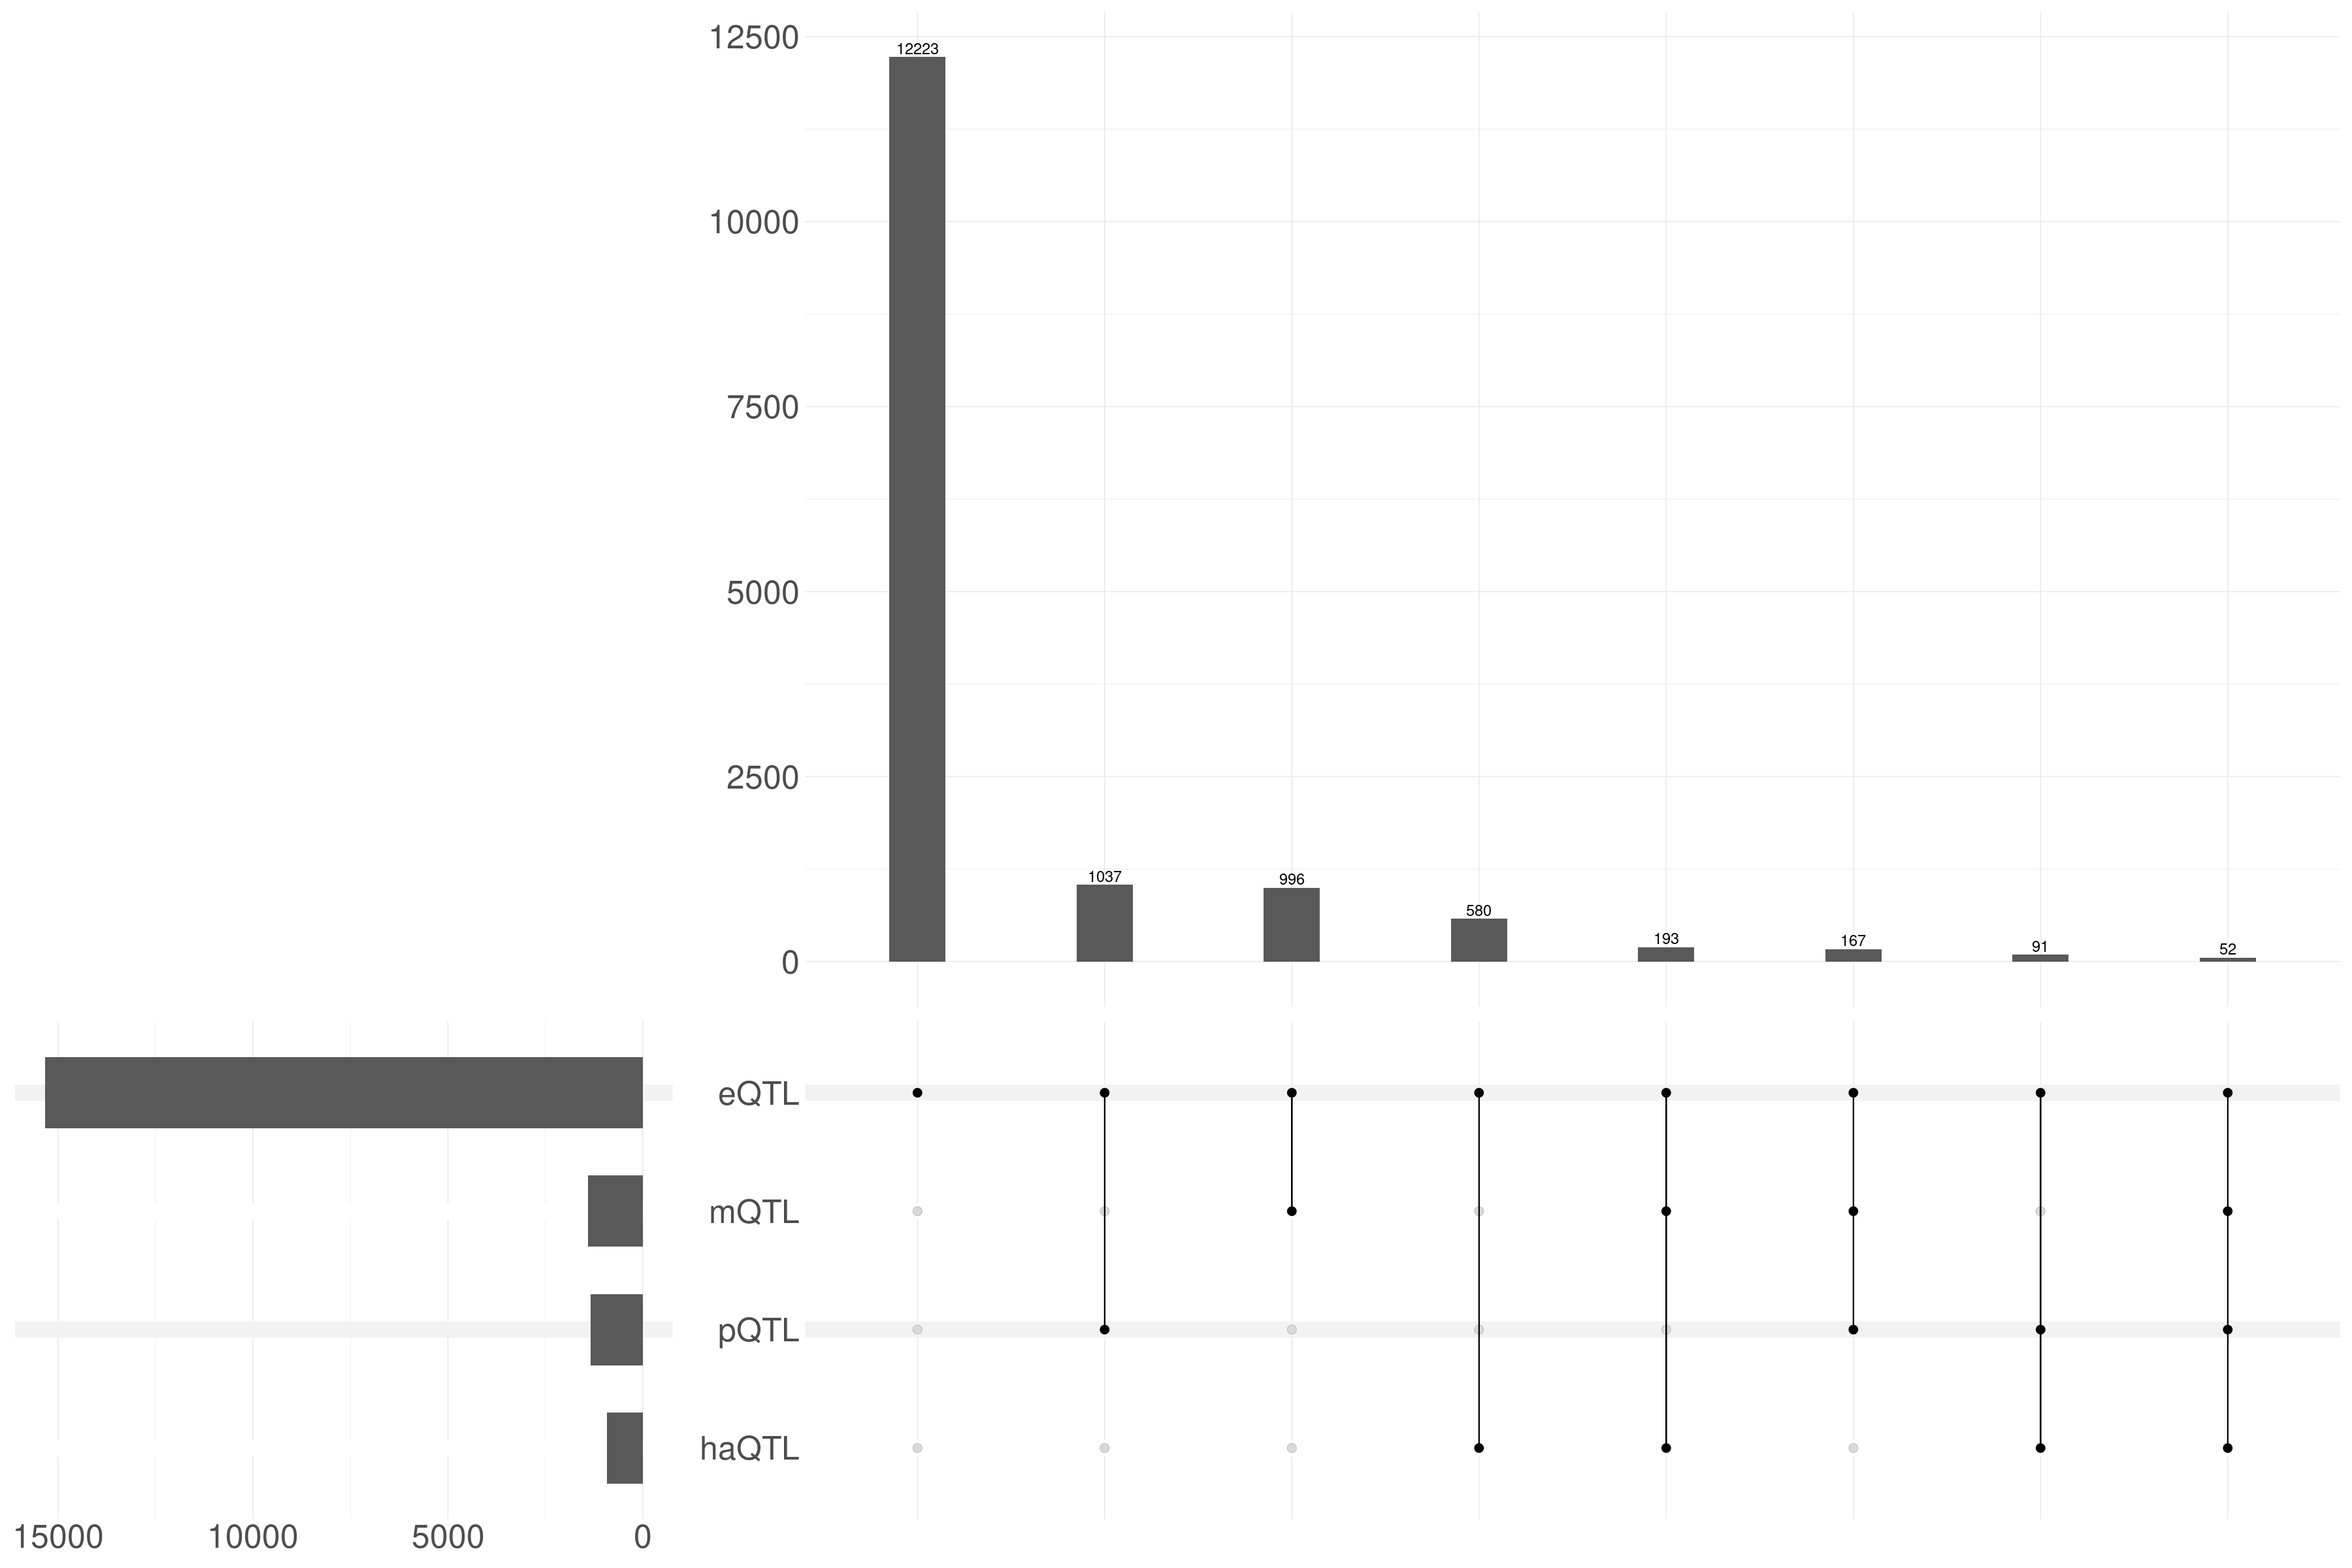

In [15]:
upset(c[[1]],intersect = c("mQTL","haQTL","eQTL","pQTL"),
  keep_empty_groups = F,
      base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 5)  )+ylab("")  ) ,
          themes=upset_default_themes(axis.text=element_text(size=30), axis.title.x = element_blank()  )     ,  
          min_degree = 1)

Adding missing grouping variables: `molecular_trait_id`


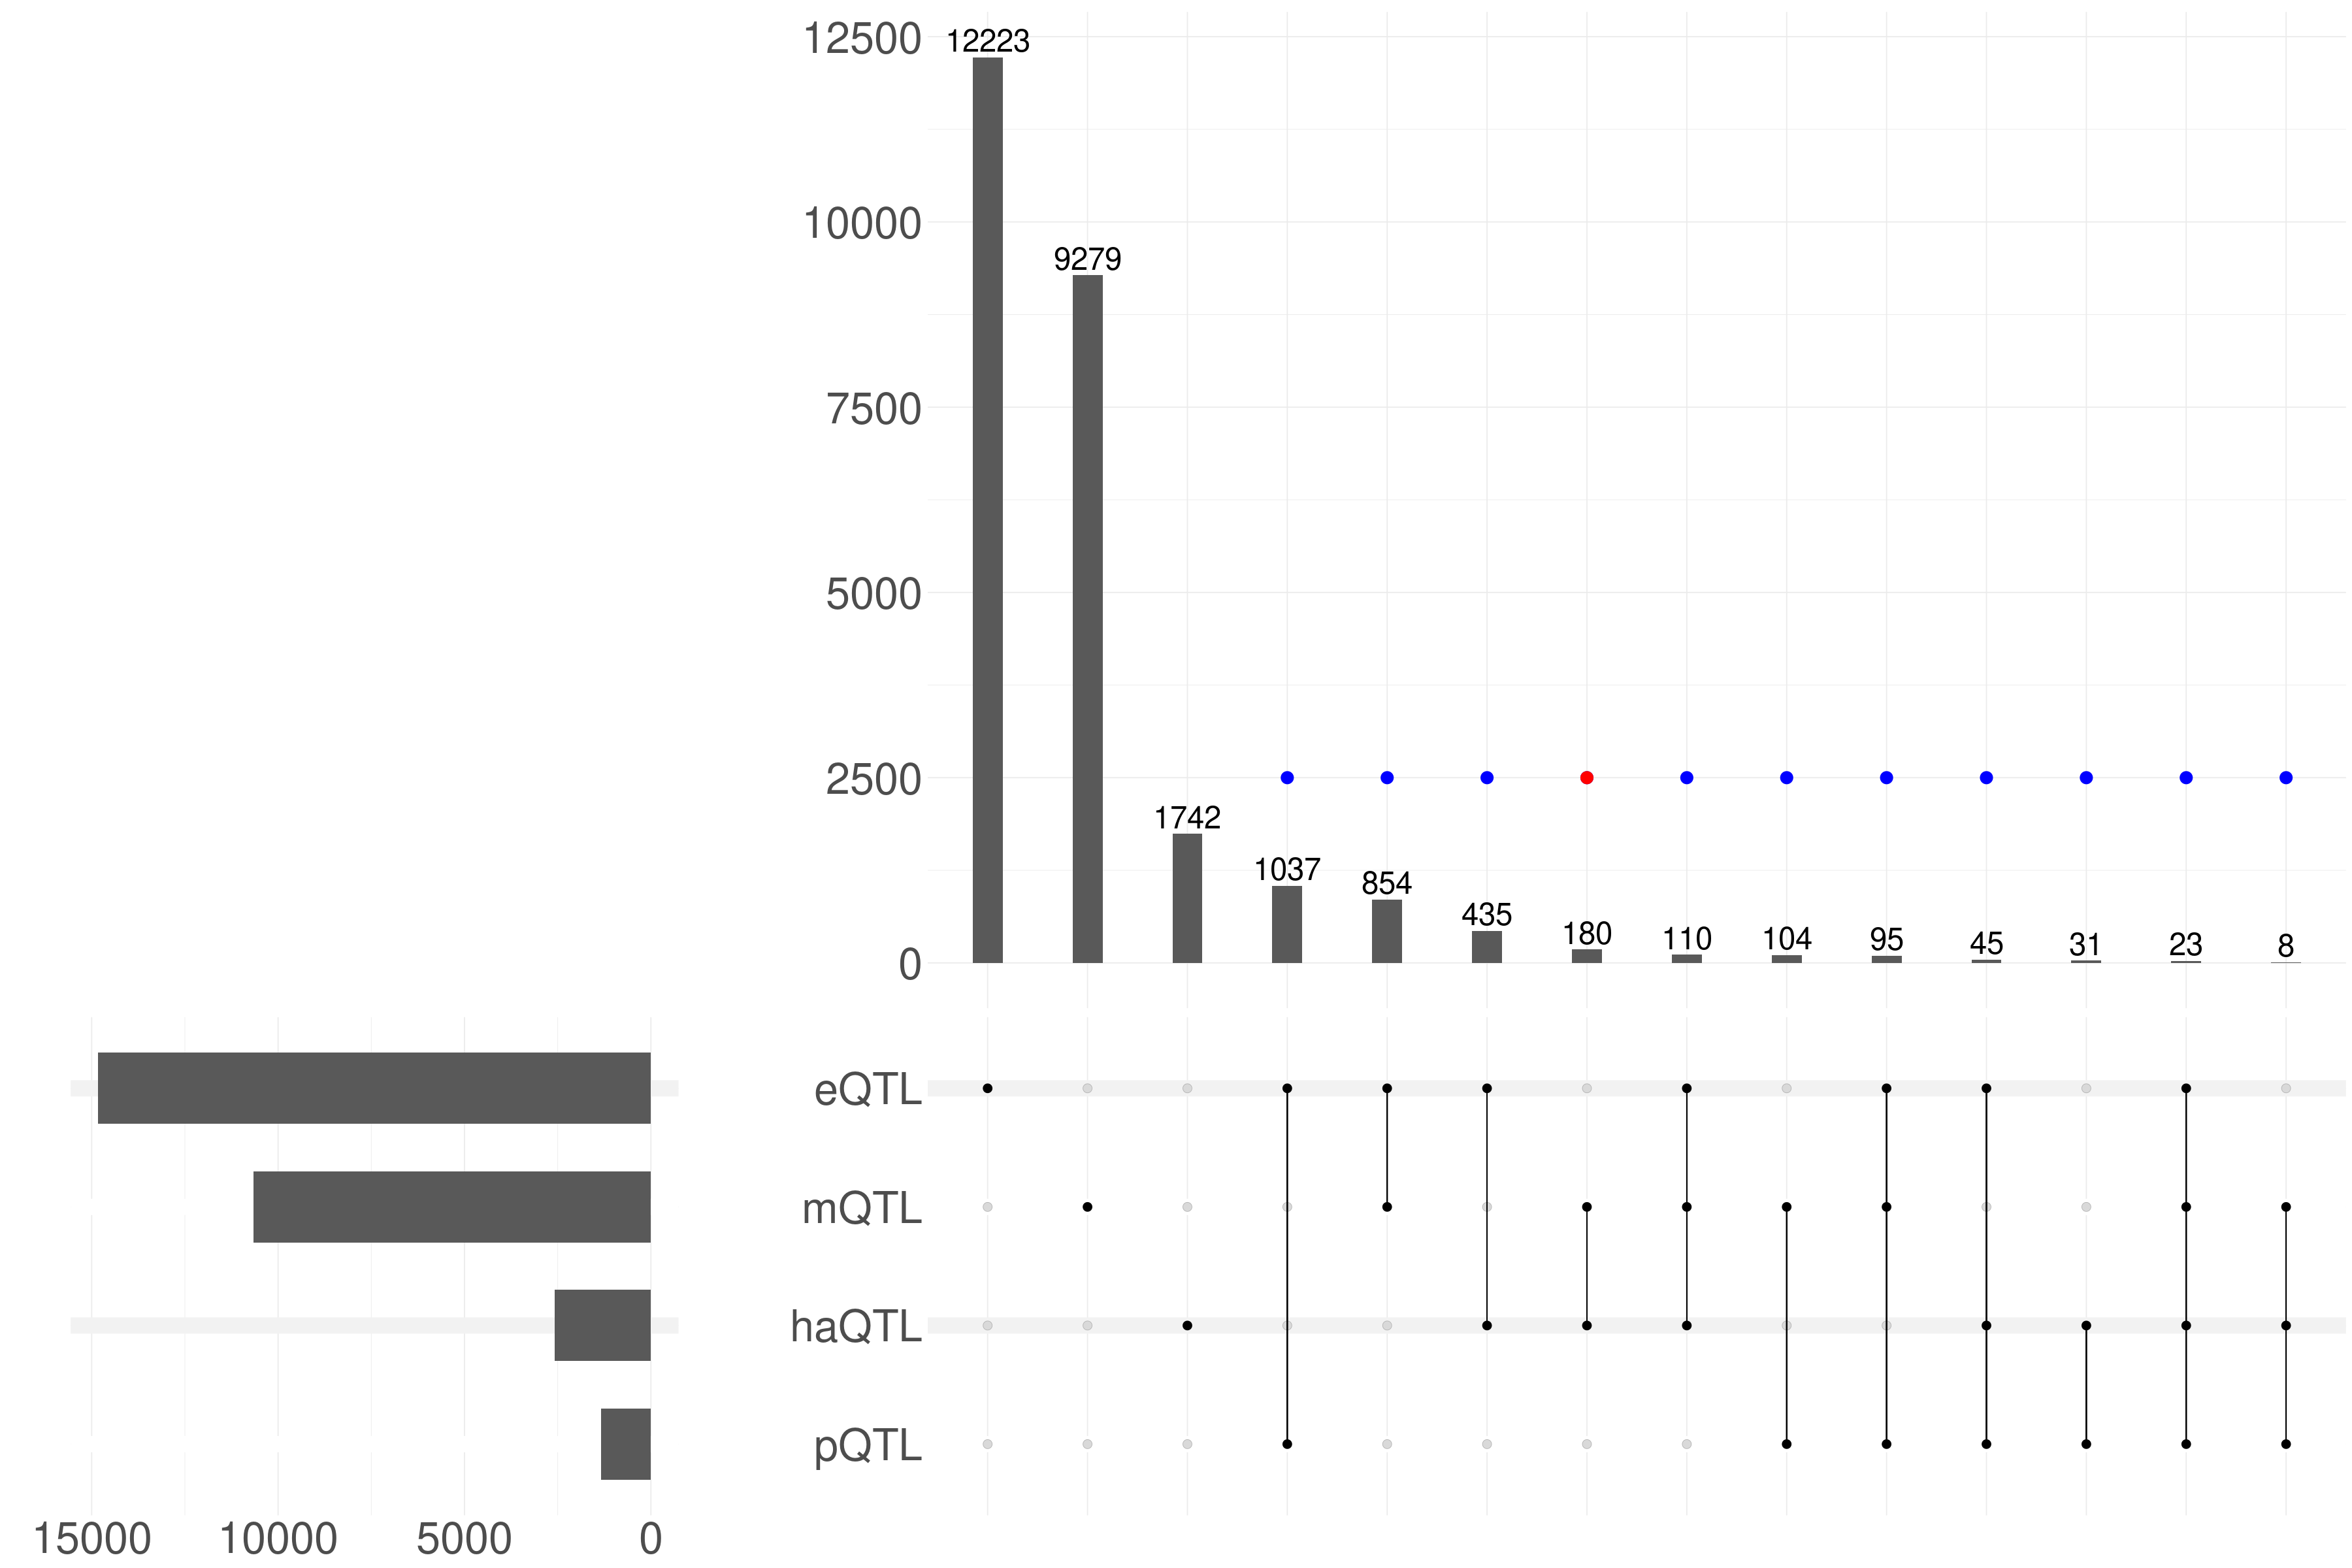

In [430]:
e = upset(combind_cs%>%dplyr::select(haQTL,mQTL,eQTL,pQTL)%>%as.data.frame,intersect = c("mQTL","haQTL","eQTL","pQTL"),
  keep_empty_groups = F,
      base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 10)  )+ylab("")+annotate("point", y = 2500, x = c(4:14), color = "blue", size = 5  ) + annotate("point", y = 2500, x = c(7), color = "red", size = 5  )       ) ,
          themes=upset_default_themes(plot.margin=unit(c(0,0,0,20),"mm"),axis.text=element_text(size=40), axis.title.x = element_blank() ,text=element_text(size=40) )     ,  
          min_degree = 1)
e

Adding missing grouping variables: `molecular_trait_id`


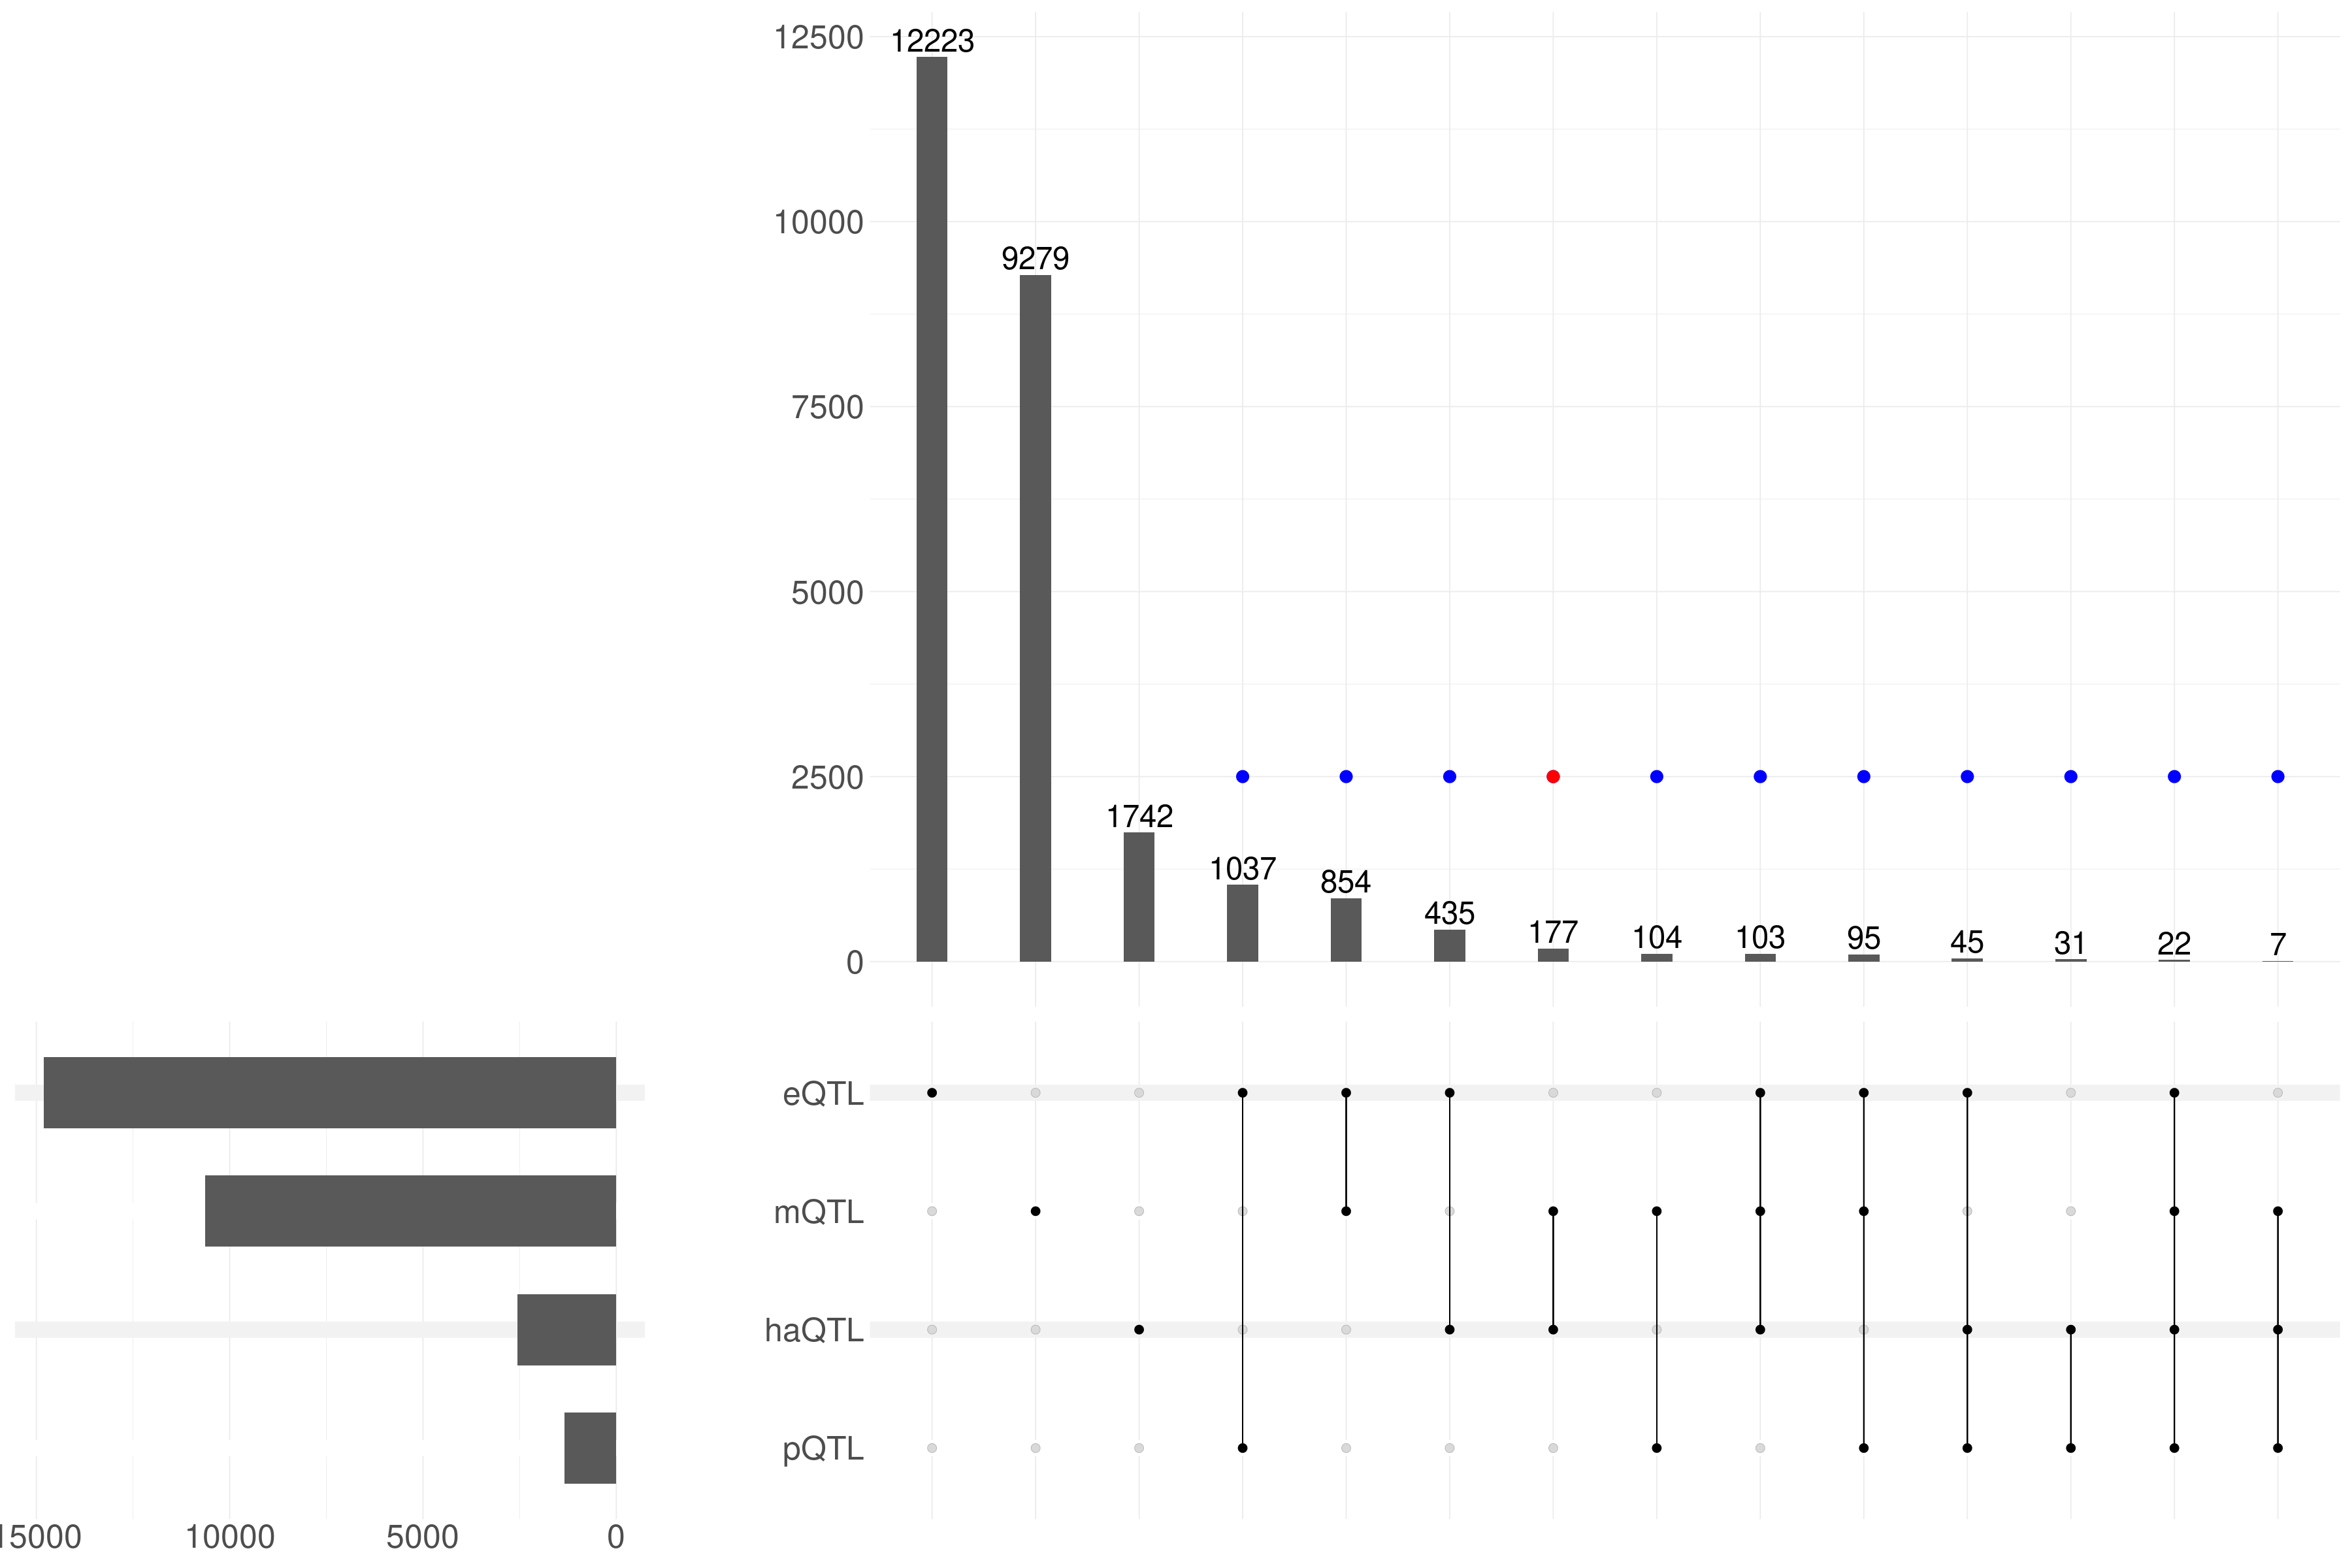

In [10]:
upset(combind_cs%>%dplyr::select(haQTL,mQTL,eQTL,pQTL)%>%as.data.frame,intersect = c("mQTL","haQTL","eQTL","pQTL"),
  keep_empty_groups = F,
      base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 10)  )+ylab("")+annotate("point", y = 2500, x = c(4:14), color = "blue", size = 5  ) + annotate("point", y = 2500, x = c(7), color = "red", size = 5  )    ) ,
          themes=upset_default_themes(axis.text=element_text(size=30), axis.title.x = element_blank() ,text=element_text(size=100) )     ,  
          min_degree = 1)

In [389]:
m16_effect = m16%>%count(molecular_trait_id)%>%select(-n)%>%mutate(type = "mQTL", effect_tibble_path = paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/all_meQTL_effect/meQTL.yuqi_mqtl.",molecular_trait_id,".uni_Fsusie.mixture_normal_per_scale.estimated_effect.tsv") )

In [390]:
m16_effect = m16_effect%>%mutate(effect = map(effect_tibble_path, ~read_delim(.x,show_col_types=FALSE)))

In [ ]:
ha16_effect = h16%>%count(molecular_trait_id)%>%select(-n)%>%mutate(type = "haQTL", effect_tibble_path = paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/all_haQTL_effect/haQTL.rosmap_haqtl.",molecular_trait_id,".uni_Fsusie.mixture_normal_per_scale.estimated_effect.tsv") )

In [ ]:
ha16_effect = ha16_effect%>%mutate(effect = map(effect_tibble_path, ~read_delim(.x,show_col_types=FALSE)))

In [194]:
list(methylation_effect = m16_effect , histone_acylation_effect =  ha16_effect )%>%saveRDS("all_functional_effect_16.rds")

## Sharing between functional phenotypes and univariates phenotype CS 

In [9]:
eQTL = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl/output/susie_per_gene_tad/whole_genome_cs.eqtl")

Rows: 392547 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): variants, ref, alt, cs_order, log10_base_factor, molecular_trait_id
dbl (9): snps_index, chromosome, position, pip, posterior_mean, posterior_sd...
lgl (1): cs_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
pQTL = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/pqtl.all_variants.tsv")
pQTL = pQTL%>%mutate(type = "pQTL")%>%filter(cs_order  != 0)

Rows: 36591872 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (7): variants, ref, alt, cs_order, cs_id, log10_base_factor, molecular_t...
dbl (9): snps_index, chromosome, position, pip, posterior_mean, posterior_sd...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Distribution of CS size

`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


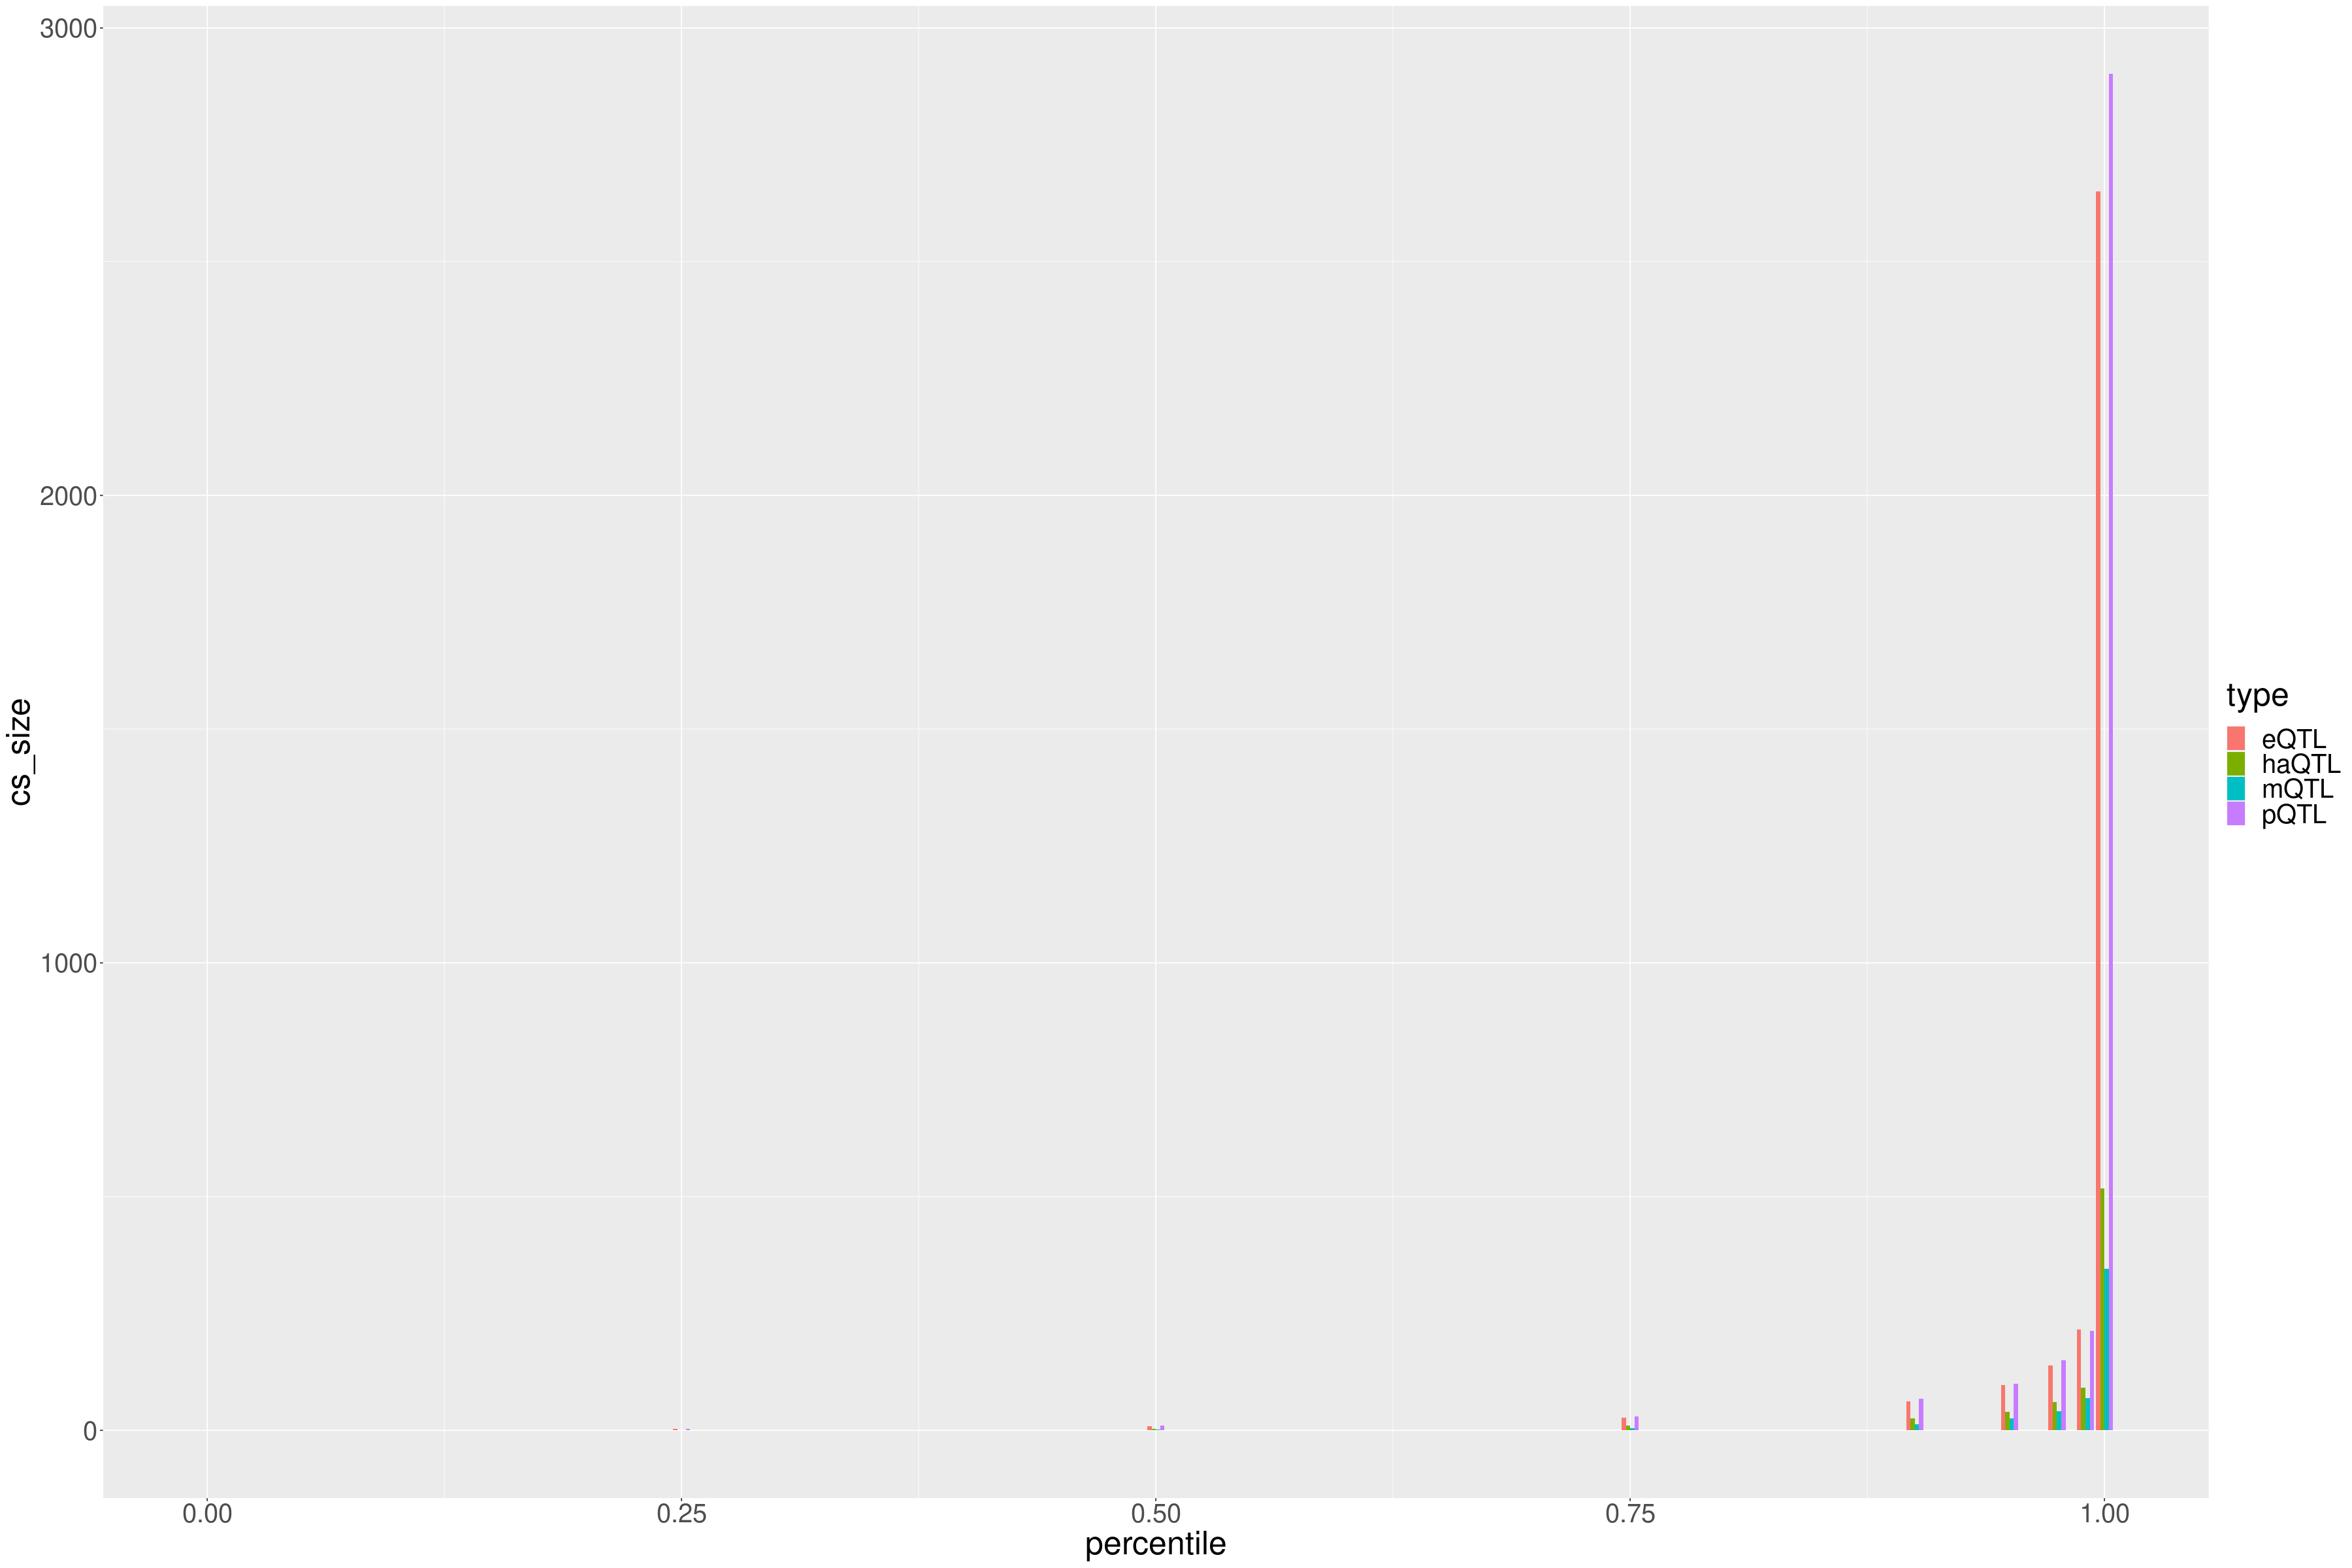

In [197]:
rbind(
h16%>%mutate(type = "haQTL")%>%count(type,molecular_trait_id,cs_order),
m16%>%mutate(type = "mQTL")%>%count(type,molecular_trait_id,cs_order),
eQTL%>%mutate(type = "eQTL")%>%count(type,molecular_trait_id,cs_order),
pQTL%>%mutate(type = "pQTL")%>%filter(cs_order  != 0)%>%count(type,molecular_trait_id,cs_order))%>%group_by(type)%>%summarize(total = n(),percentile = c(0,0.25,0.5,.75,0.9,0.95,0.975,0.99,1),cs_size = quantile(n,c(0,0.25,0.5,.75,0.9,0.95,0.975,0.99,1))) -> cs_size_dist
cs_size_dist %>% ggplot(aes(fill = type,x = percentile, y = cs_size))+geom_col(position = "dodge")+theme(text = element_text(size = 30) )


In [198]:
cs_size_dist_tbl = cs_size_dist%>%pivot_wider(names_from = "percentile", values_from = "cs_size" )

In [199]:
cs_size_dist_tbl

type,total,0,0.25,0.5,0.75,0.9,0.95,0.975,0.99,1
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
eQTL,15339,1,3,9,27,62.0,97.00,138.55,215.62,2650
haQTL,2562,1,1,3,10,25.0,39.00,60.00,91.00,518
mQTL,10642,1,1,2,5,13.0,24.95,41.00,69.00,345
pQTL,2335,1,3,10,30,67.6,99.30,150.30,212.62,2902


### Adjusting CS cutoff

In [200]:
getOption("warn")

[1] -1

In [201]:
options(warn = -1)

In [202]:
adjust_cs_size = function(df, phenotype, percentile = 0.975   ){
df = df%>%group_by(molecular_trait_id, cs_order)%>%mutate(cs_size = n() )%>%filter(cs_size <=   (cs_size_dist_tbl%>%filter(type == phenotype)%>%pull(as.character(percentile)) ) )
return(df)
}

In [203]:
list(cs_size_dist_tbl$type)

[[1]]
[1] "eQTL"  "haQTL" "mQTL"  "pQTL"

In [204]:
df_list = map2(list(eQTL,h16,m16,pQTL), cs_size_dist_tbl$type , ~adjust_cs_size(.x,phenotype = .y,percentile = 0.975))

In [205]:
get_overlap = function(x,y){inner_join(df_list[[x]],df_list[[y]], by = "variants", relationship = "many-to-many")%>%count(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y)%>%count(molecular_trait_id.x,cs_order.x)%>%count( n)%>%mutate( from = cs_size_dist_tbl$type[x], to =  cs_size_dist_tbl$type[y] )   }

### Unfiltered result

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` 

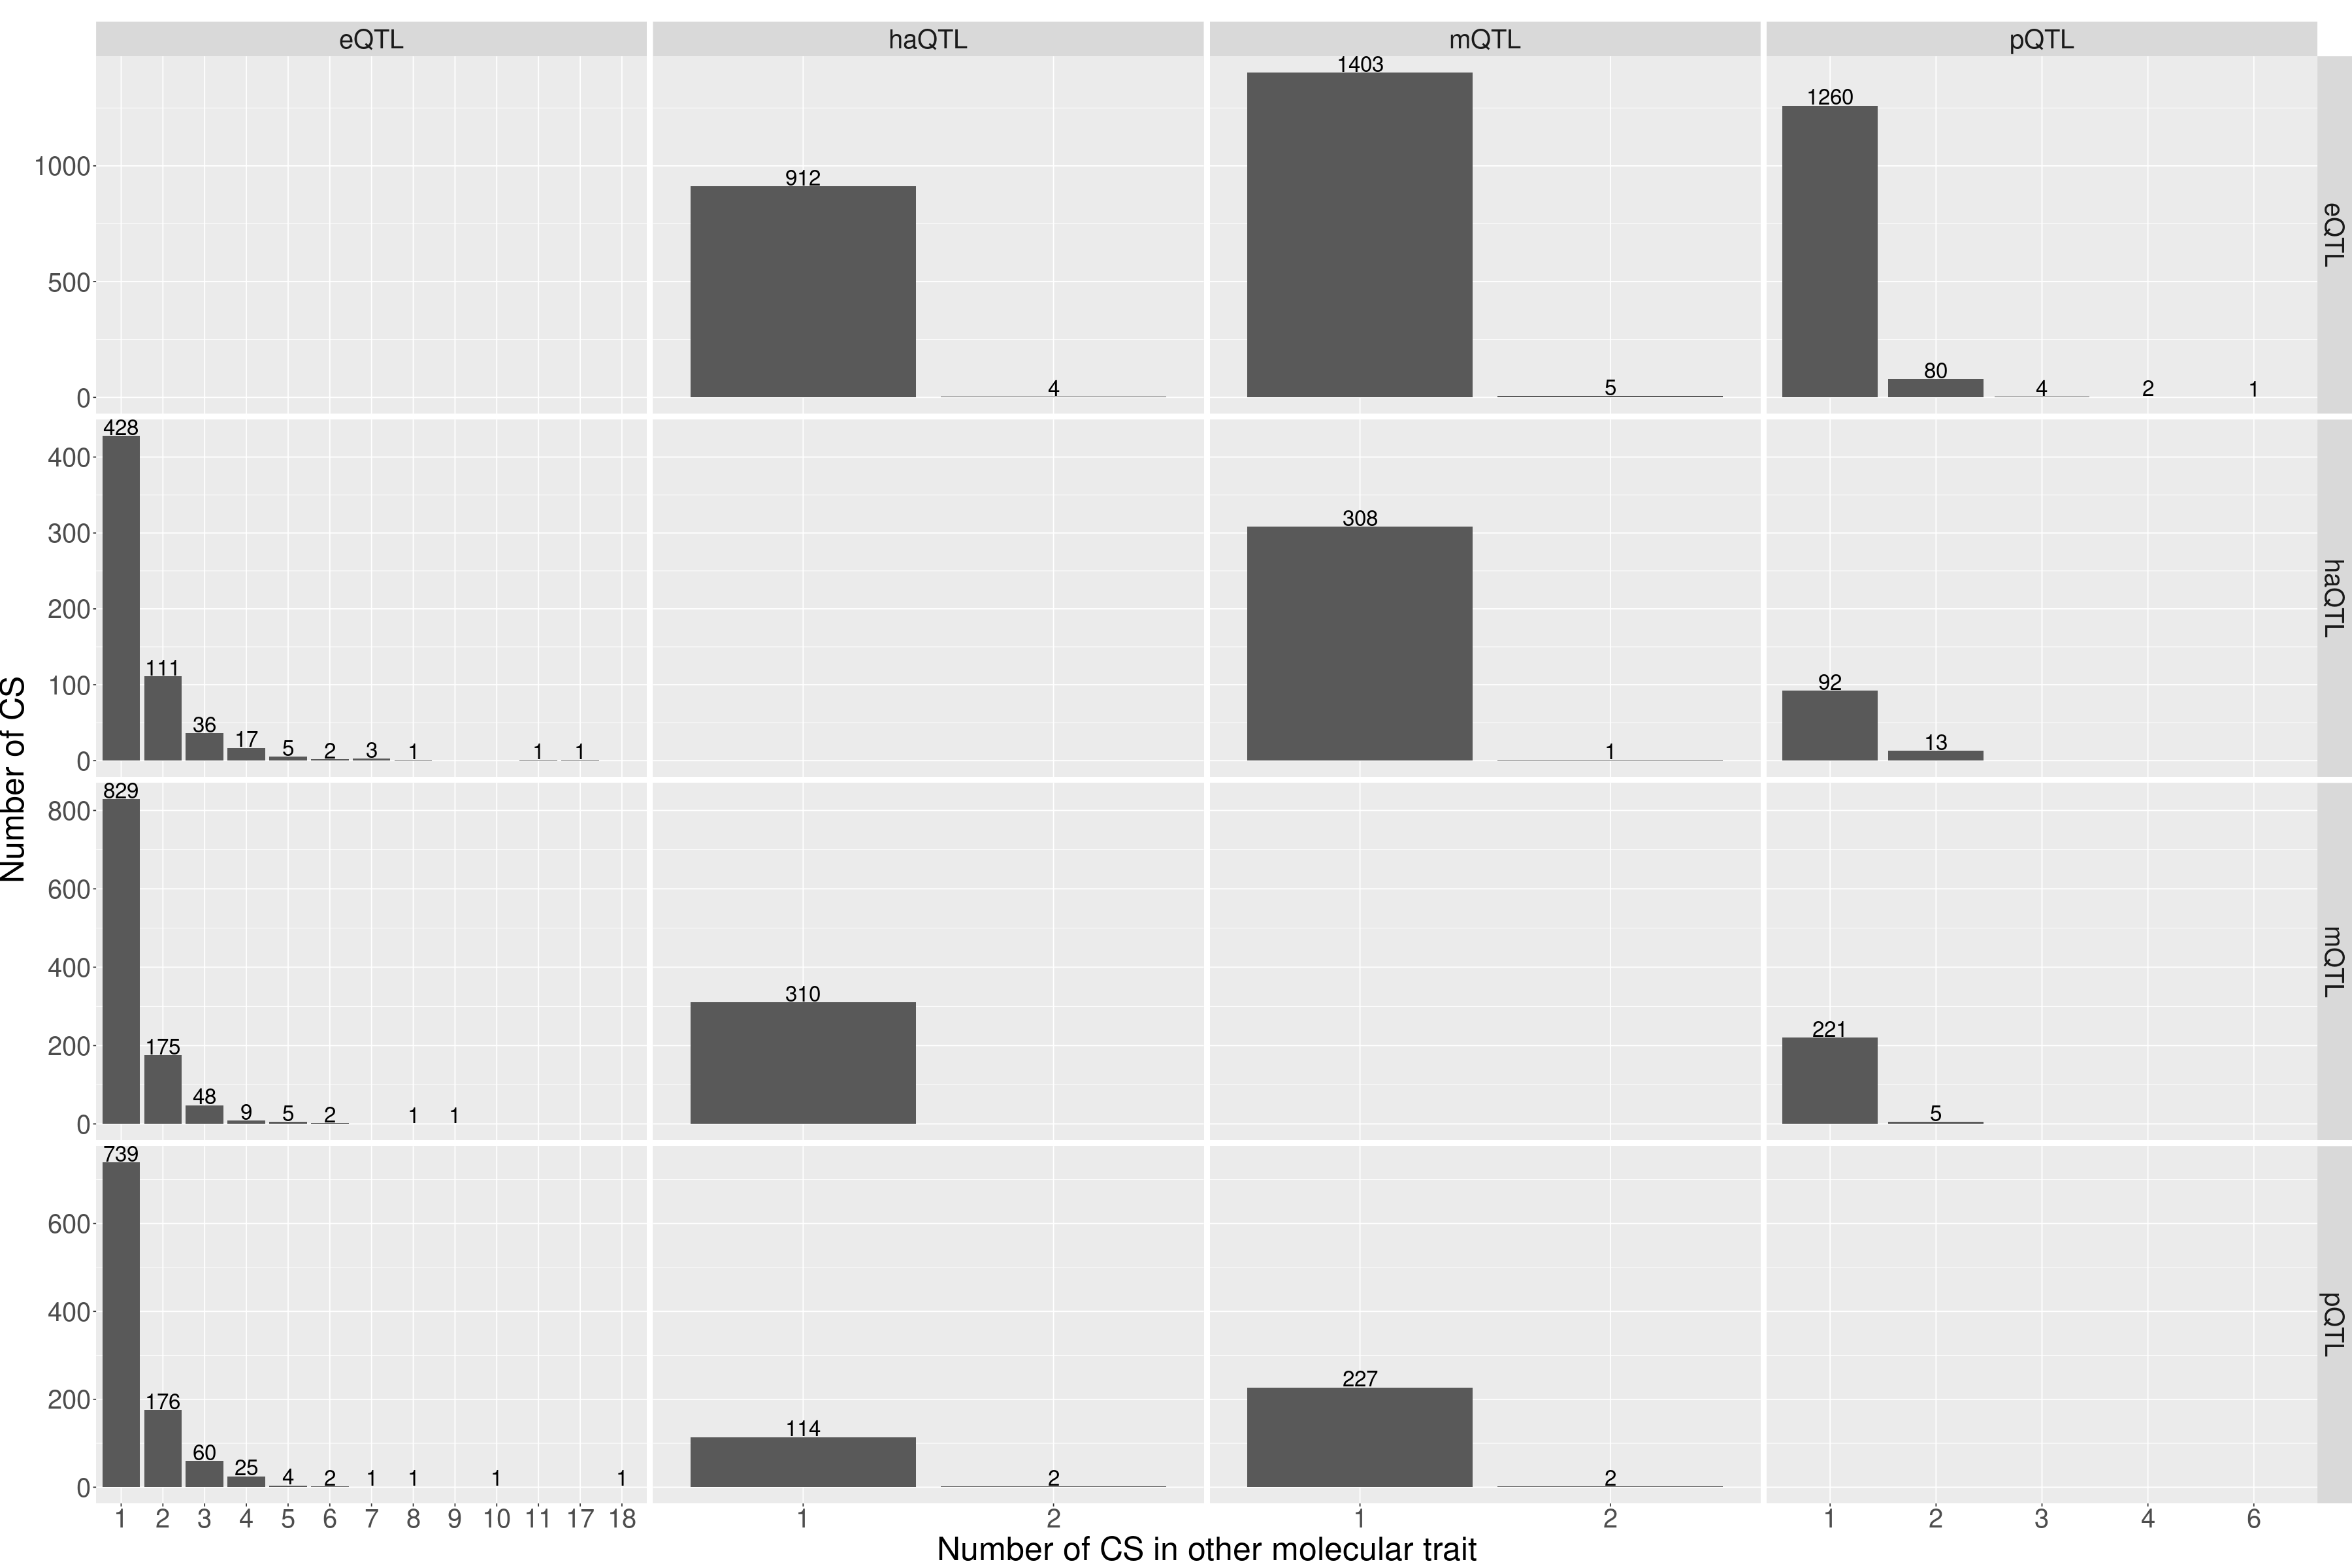

In [206]:

df_list = map2(list(eQTL,h16,m16,pQTL), cs_size_dist_tbl$type , ~adjust_cs_size(.x,phenotype = .y,percentile = 1))
sharing_output = Reduce(rbind, map(1:4,function(x) Reduce(rbind, map(1:4, function(y) get_overlap(x,y)))%>%filter(from != to ) ))
sharing_output%>%ggplot(aes(x = as.factor(n), y = nn)) + geom_text(aes(label = nn),vjust = -0.05, size = 7) +geom_col( ) +facet_grid(from~to, scale ="free")+ylab("Number of CS")+ xlab("Number of CS in other molecular trait")+theme(text = element_text(size = 30) )+
  theme(plot.margin = margin(t = 20, unit = "pt"))  + ## pad "t"op region of the plot
  coord_cartesian(clip = "off")

### filtered result for different cutoff : 0.99, 0.975, 0.9, 0.75

### 0.99

In [308]:
df_list = map2(list(eQTL,h16,m16,pQTL), cs_size_dist_tbl$type , ~adjust_cs_size(.x,phenotype = .y,percentile = 0.99))
sharing_output = Reduce(rbind, map(1:4,function(x) Reduce(rbind, map(1:4, function(y) get_overlap(x,y)))%>%filter(from != to ) ))
sharing_output%>%ggplot(aes(x = as.factor(n), y = nn)) + geom_text(aes(label = nn),vjust = -0.05, size = 8) +geom_col( ) +facet_grid(from~to, scale ="free")+ylab("Number of CS")+ xlab("Number of CS in other molecular trait")+theme(text = element_text(size = 30) )+
  theme(plot.margin = margin(t = 20, unit = "pt"))  + ## pad "t"op region of the plot
  coord_cartesian(clip = "off")+ 
    theme_bw()+theme(text = element_text(size = 45),panel.background = element_rect(), axis.text.x =  element_text( vjust = 0.5, hjust=1,size = 30))

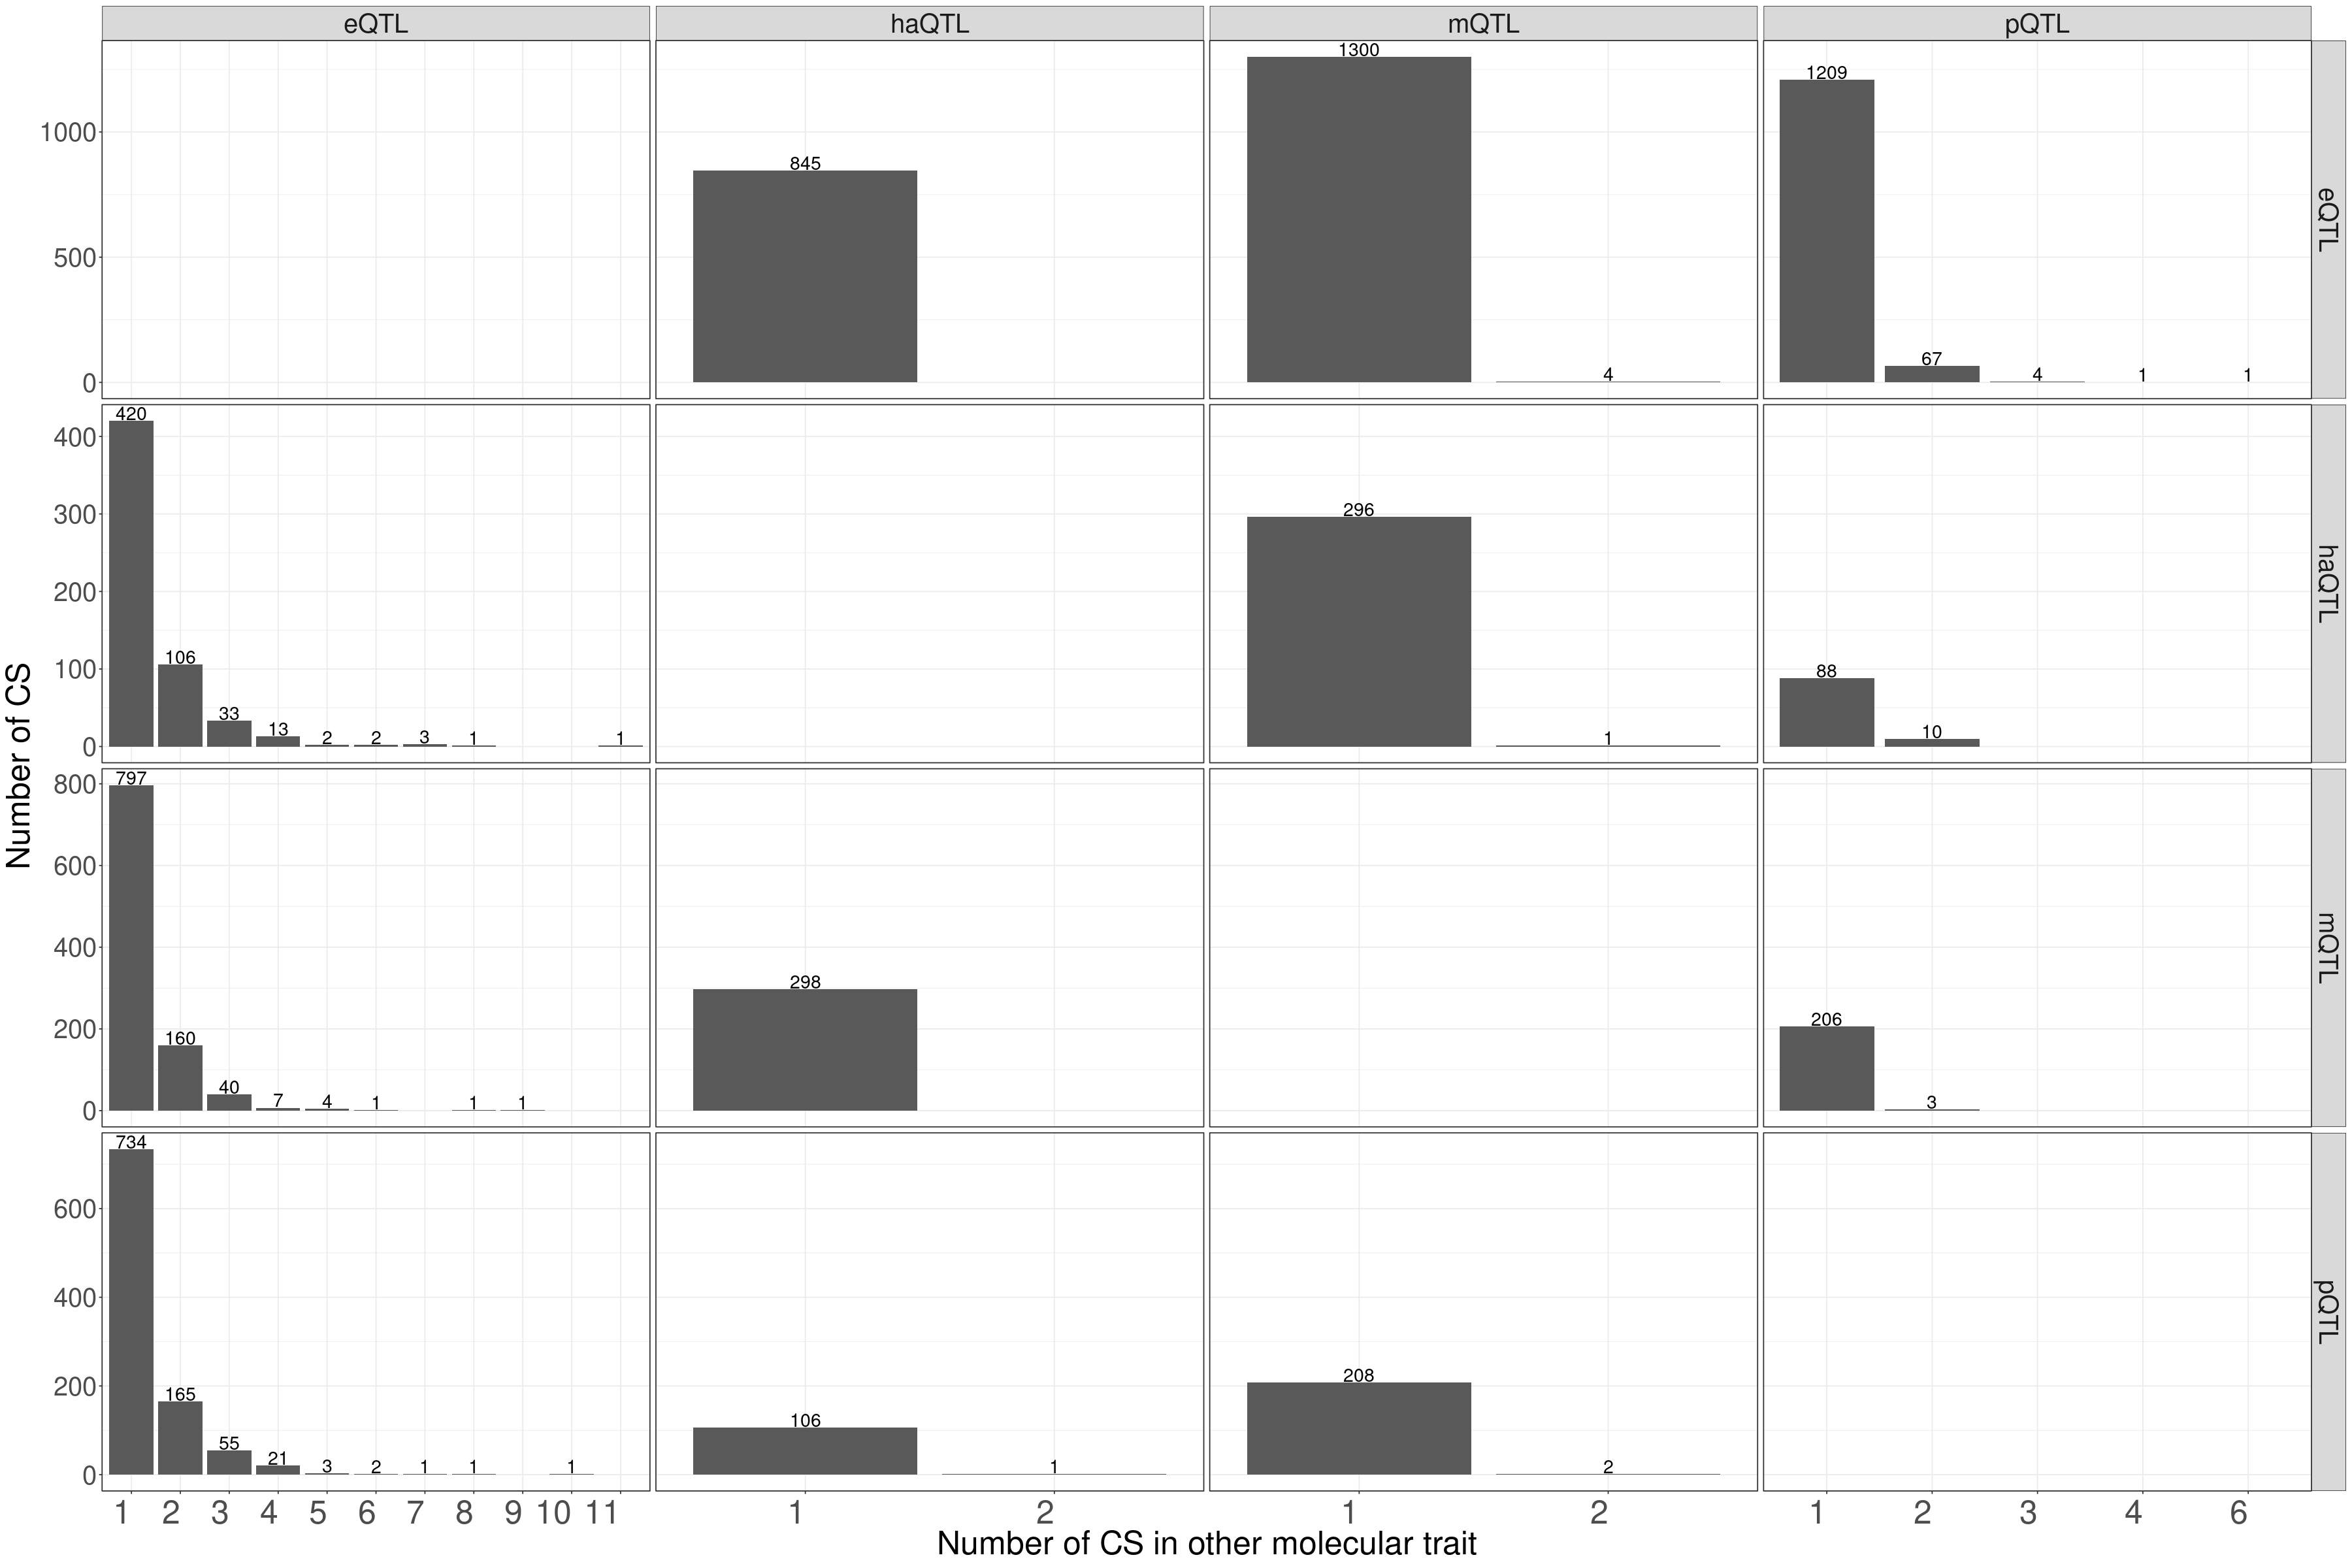

In [321]:
sharing_output%>%ggplot(aes(x = as.factor(n), y = nn)) + geom_text(aes(label = nn),vjust = -0.05, size = 6) +geom_col( ) +facet_grid(from~to, scale ="free")+ylab("Number of CS")+ xlab("Number of CS in other molecular trait")+theme(text = element_text(size = 30) )+
  theme(plot.margin = margin(t = 1, unit = "pt"))  + ## pad "t"op region of the plot
  coord_cartesian(clip = "off")+ 
    theme_bw()+theme(text = element_text(size = 30),panel.background = element_rect(), axis.text.x =  element_text( vjust = 0.5, hjust=1,size = 30))

### 0.975

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` 

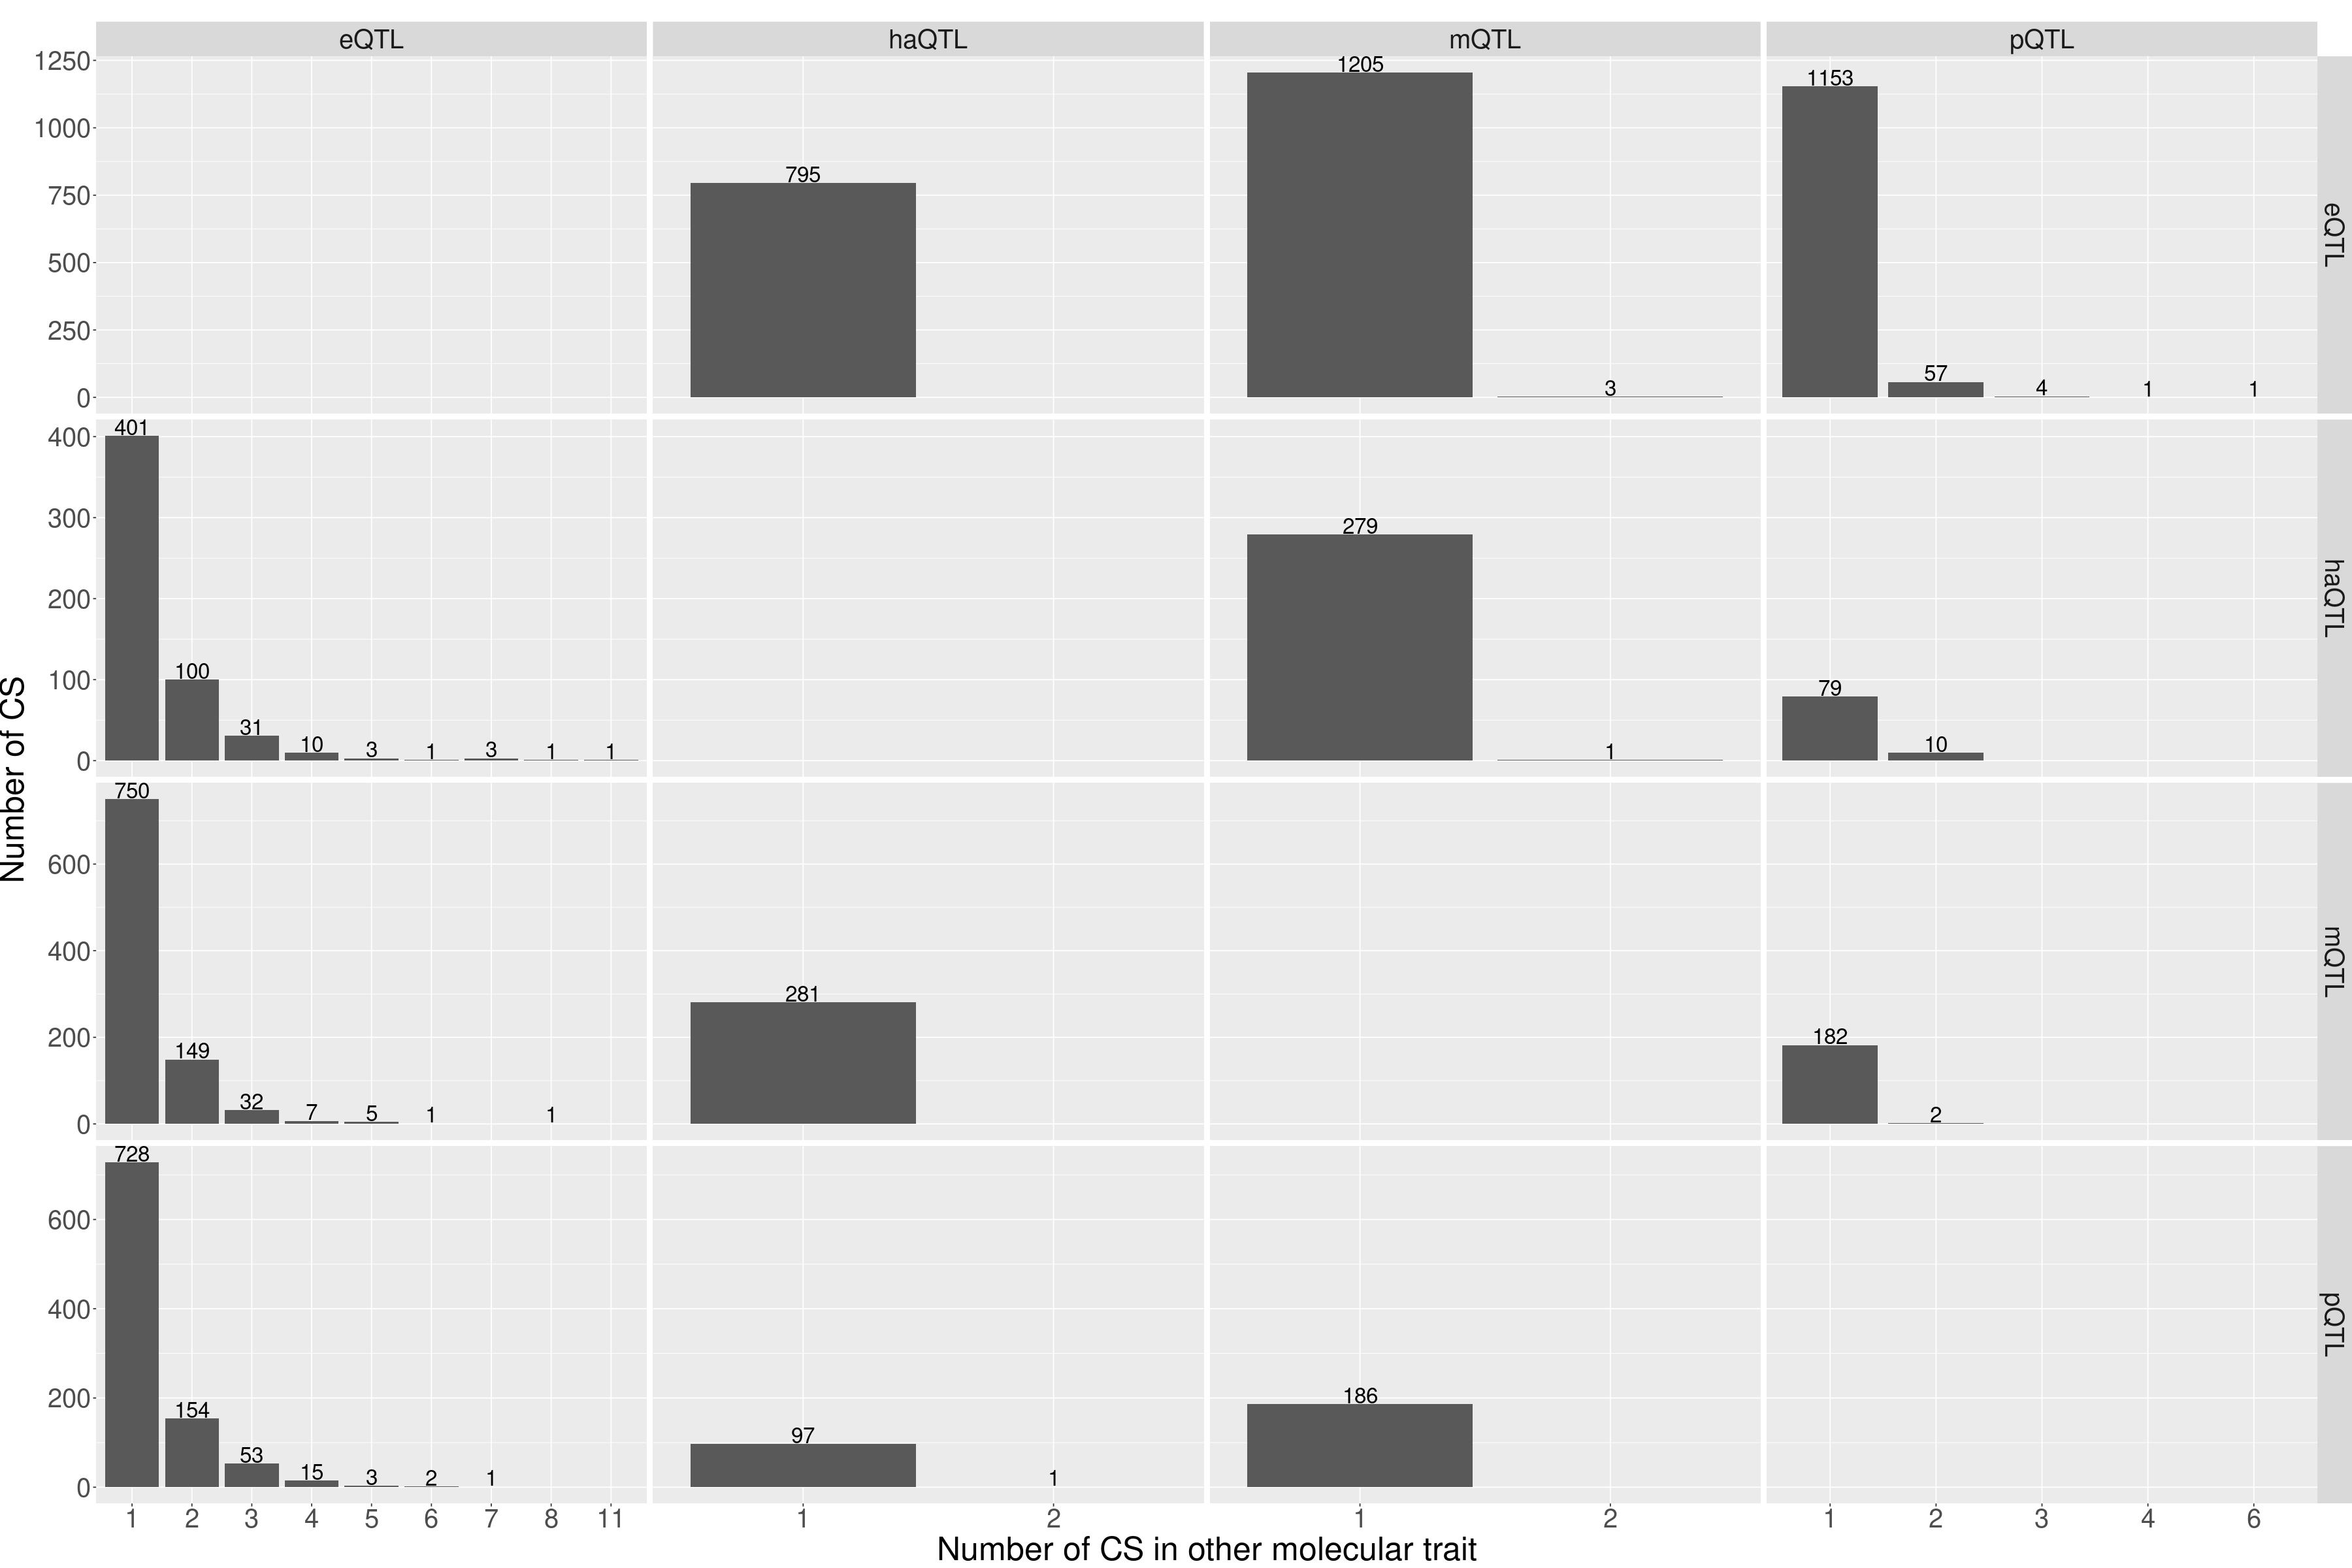

In [208]:
df_list = map2(list(eQTL,h16,m16,pQTL), cs_size_dist_tbl$type , ~adjust_cs_size(.x,phenotype = .y,percentile = 0.975))
sharing_output = Reduce(rbind, map(1:4,function(x) Reduce(rbind, map(1:4, function(y) get_overlap(x,y)))%>%filter(from != to ) ))
sharing_output%>%ggplot(aes(x = as.factor(n), y = nn)) + geom_text(aes(label = nn),vjust = -0.05, size = 7) +geom_col( ) +facet_grid(from~to, scale ="free")+ylab("Number of CS")+ xlab("Number of CS in other molecular trait")+theme(text = element_text(size = 30) )+
  theme(plot.margin = margin(t = 20, unit = "pt"))  + ## pad "t"op region of the plot
  coord_cartesian(clip = "off")

### 0.95

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` 

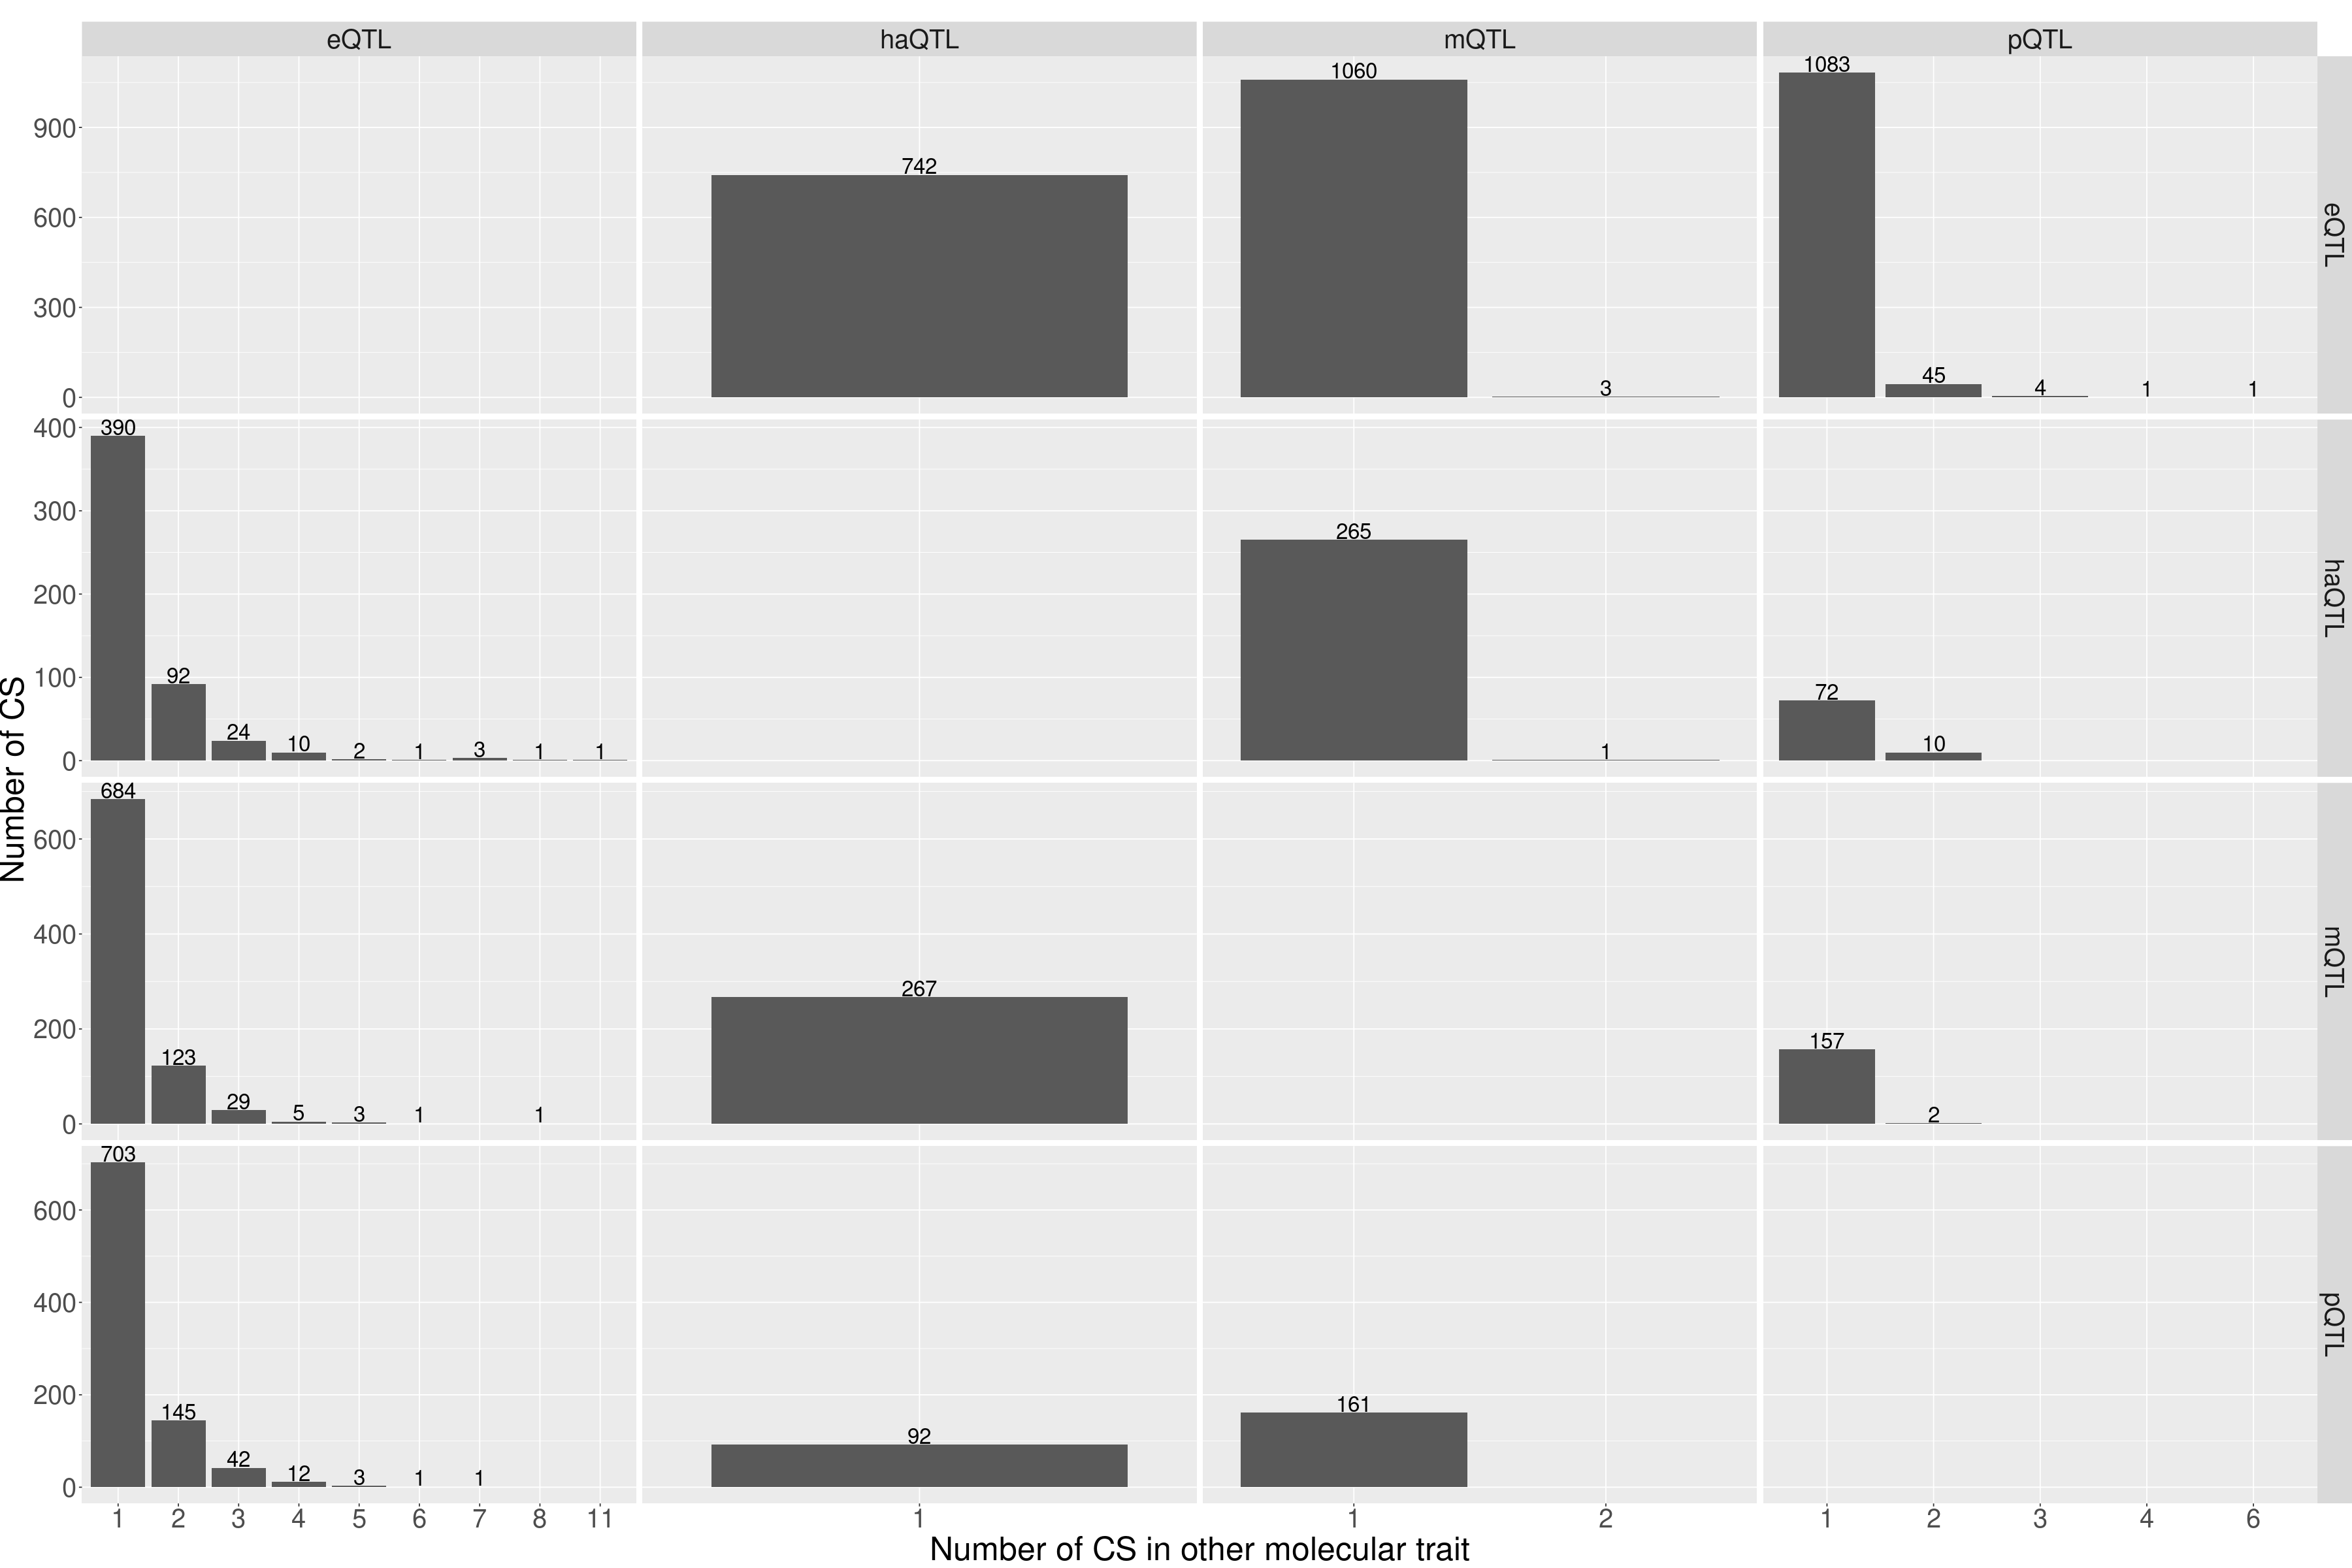

In [209]:
df_list = map2(list(eQTL,h16,m16,pQTL), cs_size_dist_tbl$type , ~adjust_cs_size(.x,phenotype = .y,percentile = 0.95))
sharing_output = Reduce(rbind, map(1:4,function(x) Reduce(rbind, map(1:4, function(y) get_overlap(x,y)))%>%filter(from != to ) ))
sharing_output%>%ggplot(aes(x = as.factor(n), y = nn)) + geom_text(aes(label = nn),vjust = -0.05, size = 7) +geom_col( ) +facet_grid(from~to, scale ="free")+ylab("Number of CS")+ xlab("Number of CS in other molecular trait")+theme(text = element_text(size = 30) )+
  theme(plot.margin = margin(t = 20, unit = "pt"))  + ## pad "t"op region of the plot
  coord_cartesian(clip = "off")

### 0.9

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` 

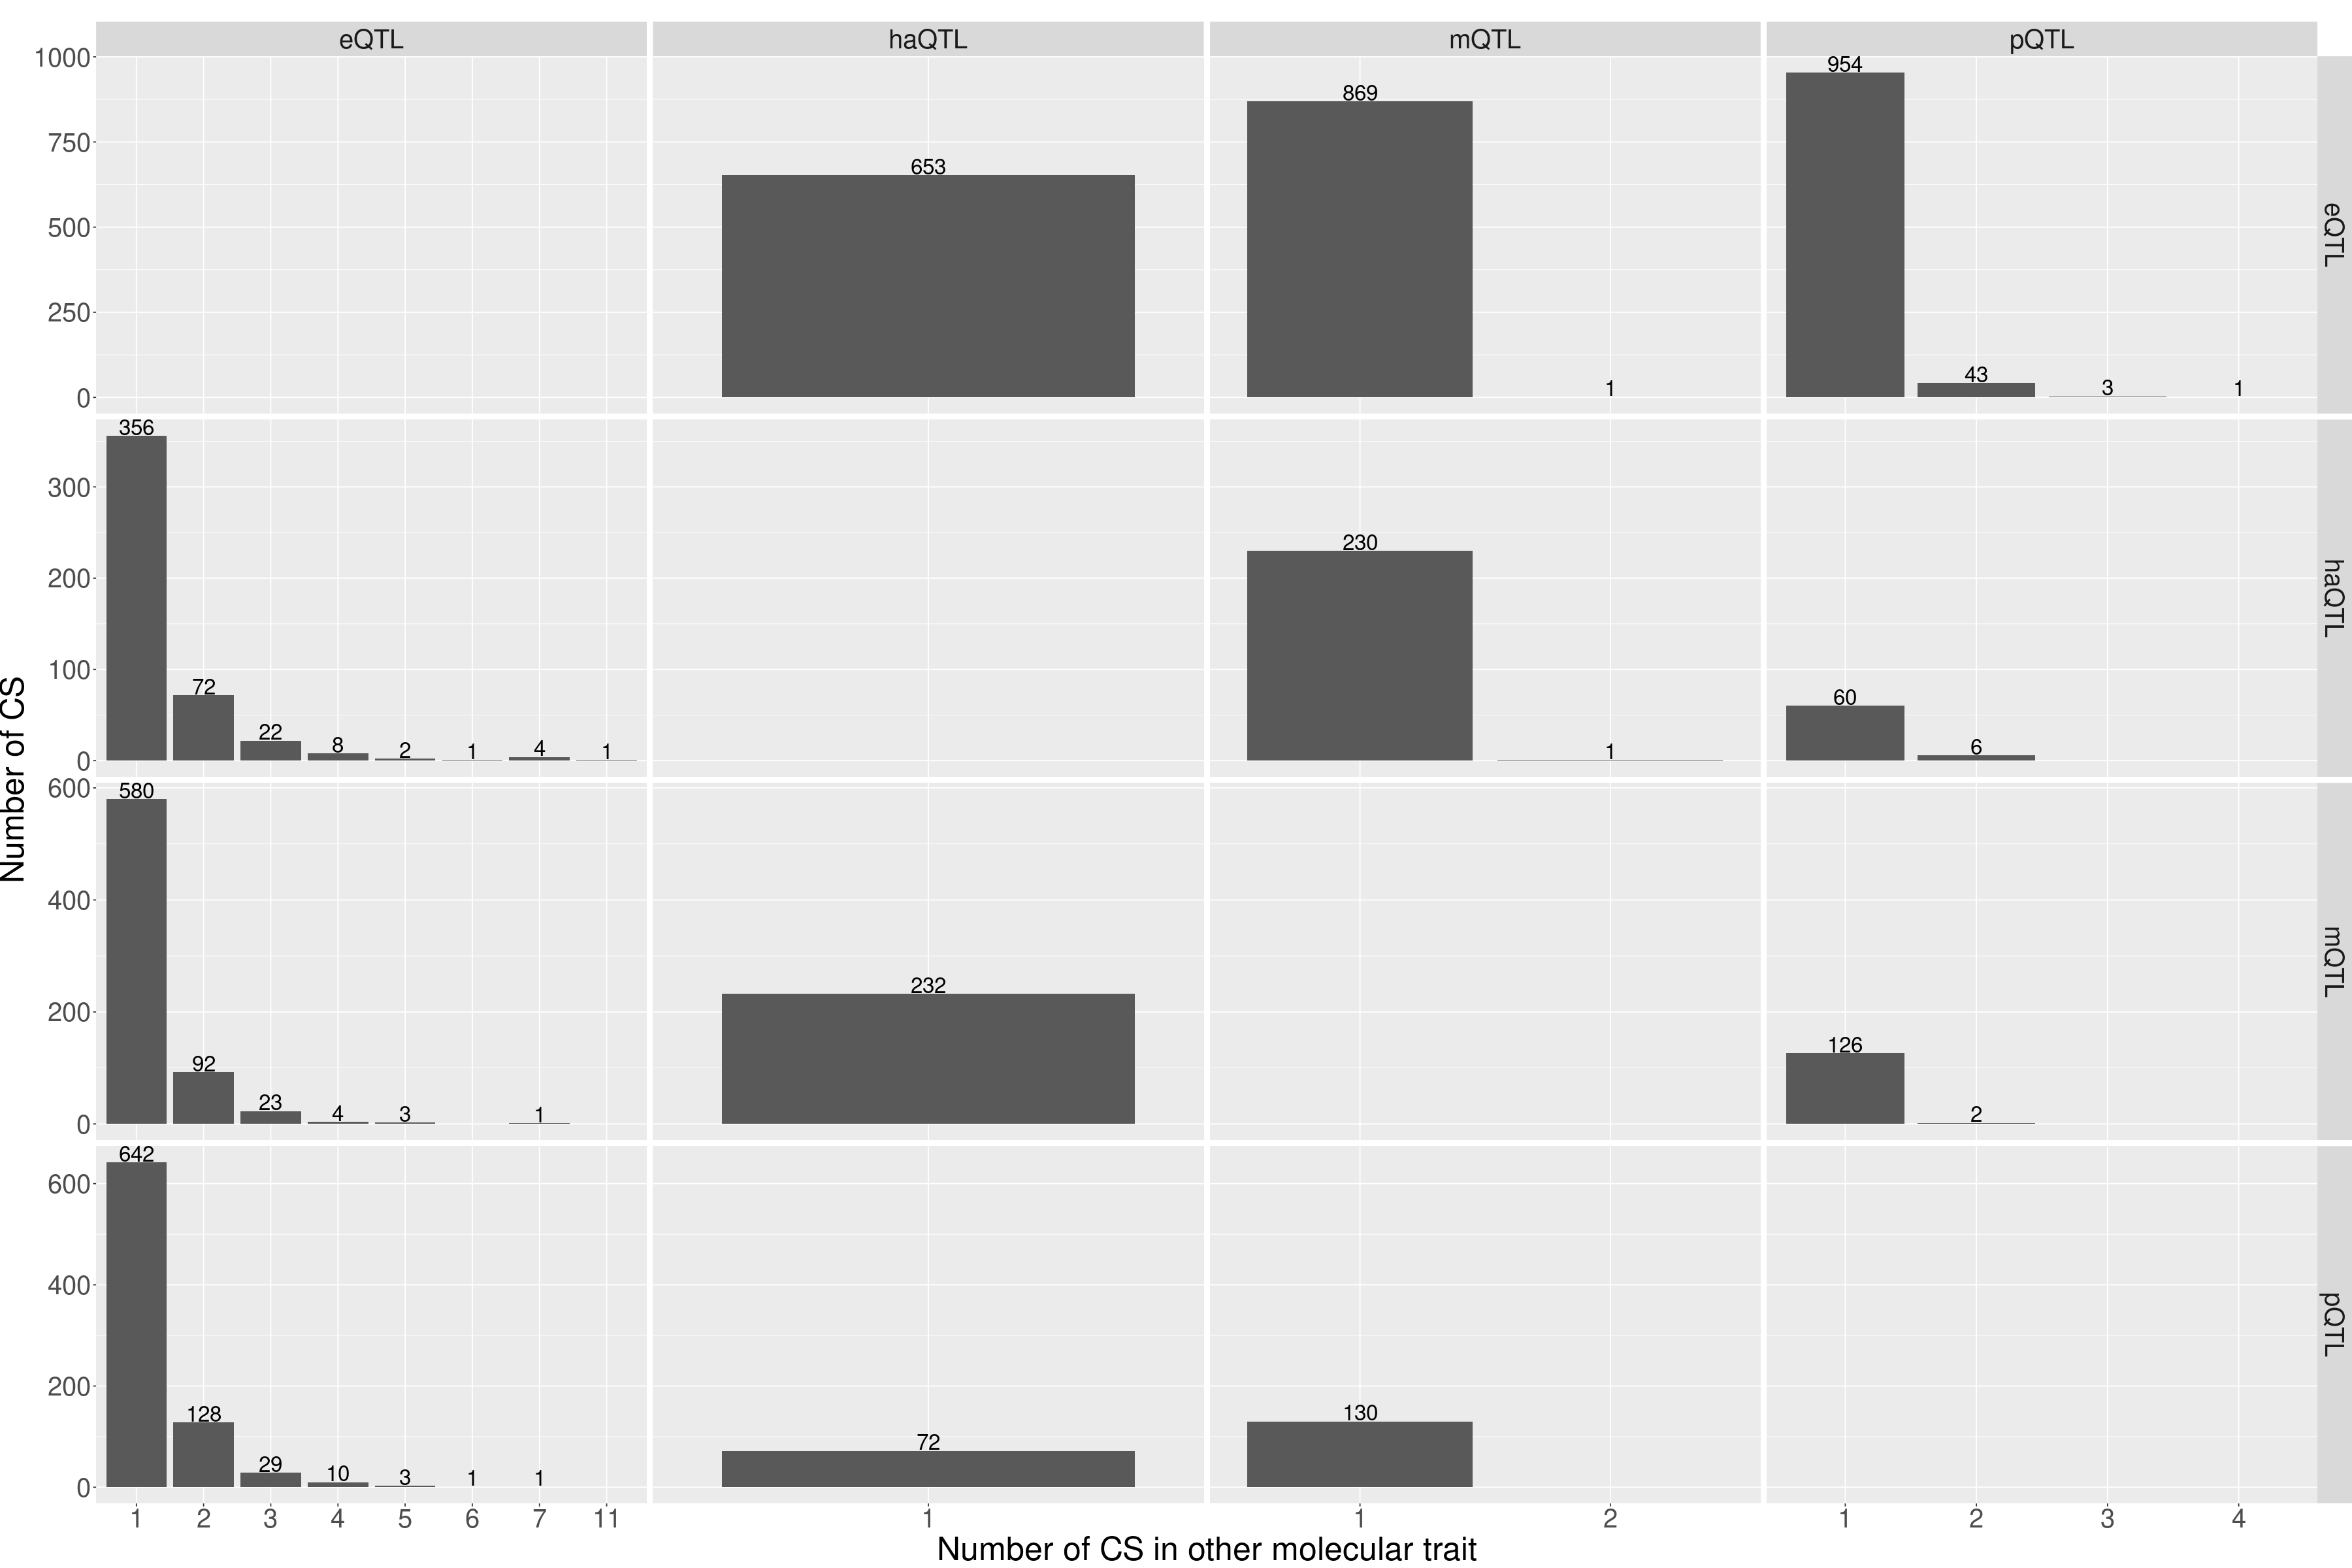

In [210]:
df_list = map2(list(eQTL,h16,m16,pQTL), cs_size_dist_tbl$type , ~adjust_cs_size(.x,phenotype = .y,percentile = 0.9))
sharing_output = Reduce(rbind, map(1:4,function(x) Reduce(rbind, map(1:4, function(y) get_overlap(x,y)))%>%filter(from != to ) ))
sharing_output%>%ggplot(aes(x = as.factor(n), y = nn)) + geom_text(aes(label = nn),vjust = -0.05, size = 7) +geom_col( ) +facet_grid(from~to, scale ="free")+ylab("Number of CS")+ xlab("Number of CS in other molecular trait")+theme(text = element_text(size = 30) )+
  theme(plot.margin = margin(t = 20, unit = "pt"))  + ## pad "t"op region of the plot
  coord_cartesian(clip = "off")

### 0.75

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` 

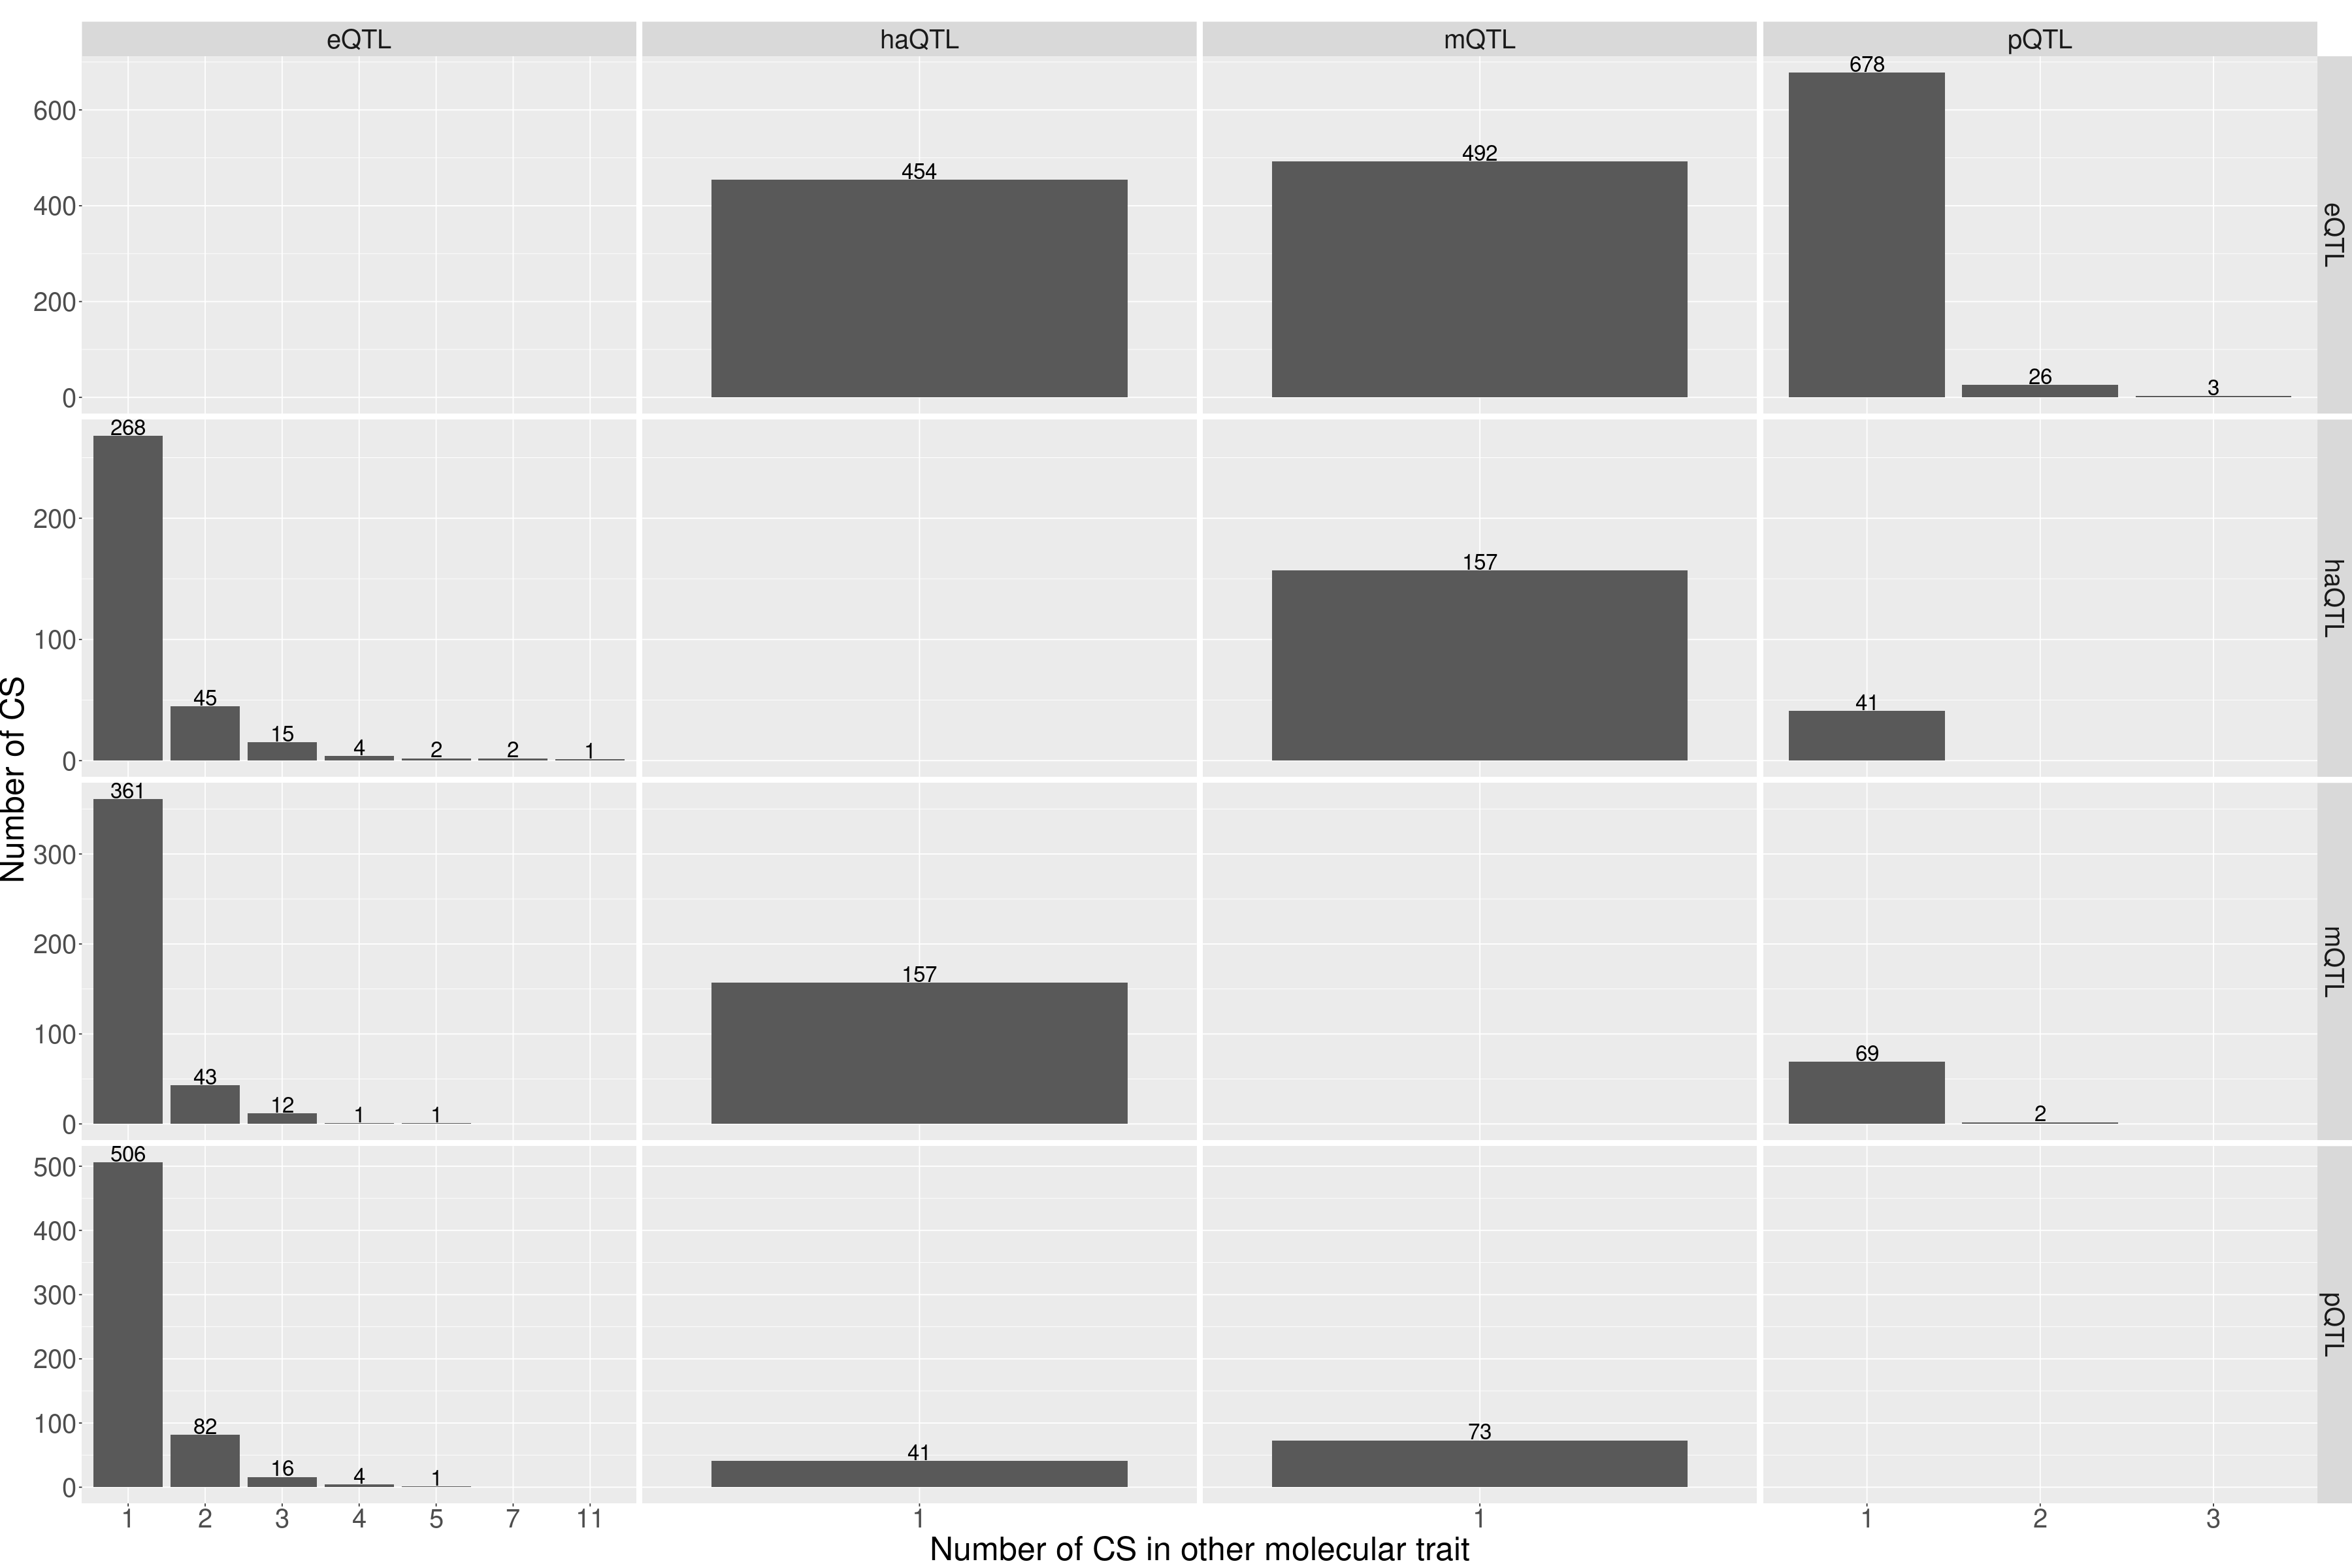

In [211]:
df_list = map2(list(eQTL,h16,m16,pQTL), cs_size_dist_tbl$type , ~adjust_cs_size(.x,phenotype = .y,percentile = 0.75))
sharing_output = Reduce(rbind, map(1:4,function(x) Reduce(rbind, map(1:4, function(y) get_overlap(x,y)))%>%filter(from != to ) ))
sharing_output%>%ggplot(aes(x = as.factor(n), y = nn)) + geom_text(aes(label = nn),vjust = -0.05, size = 7) +geom_col( ) +facet_grid(from~to, scale ="free")+ylab("Number of CS")+ xlab("Number of CS in other molecular trait")+theme(text = element_text(size = 30) )+
  theme(plot.margin = margin(t = 20, unit = "pt"))  + ## pad "t"op region of the plot
  coord_cartesian(clip = "off")

## Filter based on CS size

This section regenerate the data object and save them after filtering CS size by 0.99. The CS sharing plot dont need to be regenerated because all the tad that are overlap wiil only be count once

In [5]:
df_list = map2(list(eQTL,h16,m16,pQTL), cs_size_dist_tbl$type , ~adjust_cs_size(.x,phenotype = .y,percentile = 0.99))

ERROR: Error in vctrs_vec_compat(.x, .purrr_user_env): object 'eQTL' not found


In [6]:
map2(df_list,
     list("eqtl.all_variants","haQTL_pure_completed_unlimited_16","mQTL_pure_completed_unlimited_16","pqtl.all_variants")
     ,~.x%>%write_delim(paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/",.y,"_99pCS.tsv") ,"\t"))

ERROR: Error in vctrs_vec_compat(.x, .purrr_user_env): object 'df_list' not found


In [4]:
eQTL = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/eqtl.all_variants_99pCS.tsv","\t")
h16 =  read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/haQTL_pure_completed_unlimited_16_99pCS.tsv","\t")
m16 =  read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/mQTL_pure_completed_unlimited_16_99pCS.tsv","\t")
pQTL = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/pqtl.all_variants_99pCS.tsv","\t")


Rows: 322701 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (6): variants, ref, alt, cs_order, log10_base_factor, molecular_trait_id
dbl (10): snps_index, chromosome, position, pip, posterior_mean, posterior_s...
lgl  (1): cs_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 21527 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): variants, ref, alt, molecular_trait_id
dbl (11): snps_index, chromosome, position, cs_order, pip, finemapped_region...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 53860 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): variants, ref

In [6]:
m16%>%filter(molecular_trait_id == "tad435")%>%count(cs_order)

cs_order,n
<dbl>,<int>
1,1
2,1
3,1
4,9
5,1
6,1
7,19
8,2


In [22]:
inner_join(c[[1]],eQTL%>%count(molecular_trait_id,cs_order))

Joining with `by = join_by(molecular_trait_id, cs_order)`


molecular_trait_id,cs_order,haQTL,mQTL,eQTL,pQTL,n
<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<int>
ENSG00000000457,c(L1 = 1),FALSE,FALSE,TRUE,FALSE,93
ENSG00000000457,c(L2 = 2),FALSE,FALSE,TRUE,FALSE,7
ENSG00000000971,c(L1 = 1),FALSE,FALSE,TRUE,FALSE,26
ENSG00000001084,c(L1 = 1),FALSE,FALSE,TRUE,FALSE,12
ENSG00000001167,c(L1 = 1),FALSE,FALSE,TRUE,FALSE,23
ENSG00000001460,c(L1 = 1),FALSE,FALSE,TRUE,FALSE,21
ENSG00000001461,c(L2 = 2),TRUE,FALSE,TRUE,FALSE,62
ENSG00000001461,c(L3 = 1),FALSE,TRUE,TRUE,FALSE,17
ENSG00000001561,c(L1 = 1),FALSE,FALSE,TRUE,TRUE,13


### Adhoc viewing of specific region/gene


In [186]:
eQTL%>%filter(molecular_trait_id == "ENSG00000198838"  )

variants,snps_index,chromosome,position,ref,alt,cs_order,cs_id,log10_base_factor,pip,posterior_mean,posterior_sd,z,molecular_trait_id,finemapped_region_start,finemapped_region_end,cs_size
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>


In [ ]:
ENSG00000198838

In [14]:
eQTL%>%filter(chromosome == 15, finemapped_region_start == 32600000  )%>%count(molecular_trait_id)

molecular_trait_id,n
<chr>,<int>
ENSG00000140199,56
ENSG00000166923,67
ENSG00000169857,17
ENSG00000182117,41
ENSG00000182405,14
ENSG00000184984,19
ENSG00000198826,6
ENSG00000244952,3
ENSG00000248905,18


In [15]:
eQTL%>%filter(chromosome == 15, finemapped_region_start == 32600000  )%>%count(molecular_trait_id)

molecular_trait_id,n
<chr>,<int>
ENSG00000140199,56
ENSG00000166923,67
ENSG00000169857,17
ENSG00000182117,41
ENSG00000182405,14
ENSG00000184984,19
ENSG00000198826,6
ENSG00000244952,3
ENSG00000248905,18


In [16]:
eQTL%>%filter(chromosome == 15, finemapped_region_start == 32600000 ,molecular_trait_id == "ENSG00000184984" )%>%group_by(cs_order)%>%summarise(sum(z))

cs_order,sum(z)
<chr>,<dbl>
c(L1 = 1),0.2554763
c(L2 = 2),-1.0250030


In [17]:
eQTL%>%filter(chromosome == 8, finemapped_region_start == 141440000  )%>%count(molecular_trait_id)

molecular_trait_id,n
<chr>,<int>
ENSG00000130193,16
ENSG00000160886,16
ENSG00000160932,1
ENSG00000167653,33
ENSG00000167656,2
ENSG00000171045,9
ENSG00000176956,13
ENSG00000177335,57
ENSG00000180155,23


In [18]:
eQTL%>%filter(chromosome == 8, finemapped_region_start == 141440000  )%>%count(molecular_trait_id,cs_order)%>%count(molecular_trait_id)%>%count(n)

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.


n,nn
<int>,<int>
1,8
2,7
3,4
4,1


In [19]:
h16%>%filter(molecular_trait_id == "tad808")%>%count(cs_order)%>%nrow
m16%>%filter(molecular_trait_id == "tad808")%>%count(cs_order)%>%nrow

[1] 9

[1] 20

In [20]:
h16%>%filter(molecular_trait_id == "tad1182")%>%count(cs_order)%>%nrow
m16%>%filter(molecular_trait_id == "tad1182")%>%count(cs_order)%>%nrow

[1] 7

[1] 17

In [21]:
eQTL%>%filter(chromosome == 15, finemapped_region_start == 32600000  )%>%count(molecular_trait_id)

molecular_trait_id,n
<chr>,<int>
ENSG00000140199,56
ENSG00000166923,67
ENSG00000169857,17
ENSG00000182117,41
ENSG00000182405,14
ENSG00000184984,19
ENSG00000198826,6
ENSG00000244952,3
ENSG00000248905,18


In [7]:
eQTL%>%filter(variants == "chr2:88170344_G_C")

variants,snps_index,chromosome,position,ref,alt,cs_order,cs_id,log10_base_factor,pip,posterior_mean,posterior_sd,z,molecular_trait_id,finemapped_region_start,finemapped_region_end,cs_size
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr2:88170344_G_C,516,2,88170344,G,C,c(L1 = 4),NA,997.699835506623;21.7932656773848;1.61827626878115;1.75002884939389;-1.04811433422138;0;0;0;0;0,0.1224063,0.03432014,0.2159131,0.1589535,ENSG00000144115,8.8e+07,89240000,9


In [14]:
h16%>%filter(molecular_trait_id  == "tad174",cs_order == 1)

variants,snps_index,chromosome,position,ref,alt,cs_order,pip,molecular_trait_id,finemapped_region_start,finemapped_region_end,purity,is_dummy,effect_peak_pos,cs_size
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr2:86208944_C_A,2204,2,86208944,C,A,1,0.9997709,tad174,85400000,86880000,1,0,86547402,1


In [16]:
m16%>%filter(variants  == "chr2:86208944_C_A")

variants,snps_index,chromosome,position,ref,alt,cs_order,pip,molecular_trait_id,finemapped_region_start,finemapped_region_end,purity,is_dummy,effect_peak_pos,cs_size
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [17]:
eQTL%>%filter(variants  == "chr2:86208944_C_A")

variants,snps_index,chromosome,position,ref,alt,cs_order,cs_id,log10_base_factor,pip,posterior_mean,posterior_sd,z,molecular_trait_id,finemapped_region_start,finemapped_region_end,cs_size
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>


In [18]:
pQTL%>%filter(variants == "chr2:86208944_C_A")

variants,snps_index,chromosome,position,ref,alt,cs_order,cs_id,log10_base_factor,pip,posterior_mean,posterior_sd,z,molecular_trait_id,finemapped_region_start,finemapped_region_end,type,cs_size
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>


In [28]:
nrow(h16%>%count(molecular_trait_id,cs_order))
nrow(m16%>%count(molecular_trait_id,cs_order))

[1] 2537

[1] 10541

In [29]:
h16%>%count(molecular_trait_id,cs_order)%>%filter(n == 1)
m16%>%count(molecular_trait_id,cs_order)%>%filter(n == 1)

molecular_trait_id,cs_order,n
<chr>,<dbl>,<int>
tad1,1,1
tad100,1,1
tad100,3,1
tad1000,3,1
tad1003,2,1
tad1003,3,1
tad1005,2,1
tad1006,2,1
tad101,1,1


molecular_trait_id,cs_order,n
<chr>,<dbl>,<int>
tad10,4,1
tad10,5,1
tad10,7,1
tad10,9,1
tad100,1,1
tad100,4,1
tad100,6,1
tad100,8,1
tad100,9,1


In [23]:
shared_cs_map%>%filter(molecular_trait_id.x == "tad1182")

ERROR: Error in filter(., molecular_trait_id.x == "tad1182"): object 'shared_cs_map' not found


In [ ]:
joint = inner_join(h16,m16, by = "variants")

shared_cs_map = joint%>%count(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y)

In [ ]:
id = map(df_list,~.x%>%mutate(id = paste0(molecular_trait_id,"_",cs_order))%>%pull(id))

In [ ]:
id_str = id%>%unlist()

In [ ]:
length(id%>%unlist)

In [ ]:
length(id_str)

In [156]:
m16_effect = m16%>%count(molecular_trait_id)%>%select(-n)%>%mutate(type = "mQTL", effect_tibble_path = paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/all_meQTL_effect/meQTL.yuqi_mqtl.",molecular_trait_id,".uni_Fsusie.mixture_normal_per_scale.estimated_effect.tsv") )

In [157]:
m16_effect = m16_effect%>%mutate(effect = map(effect_tibble_path, ~read_delim(.x,show_col_types=FALSE)))

In [135]:
ha16_effect = h16%>%count(molecular_trait_id)%>%select(-n)%>%mutate(type = "haQTL", effect_tibble_path = paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/all_haQTL_effect/haQTL.rosmap_haqtl.",molecular_trait_id,".uni_Fsusie.mixture_normal_per_scale.estimated_effect.tsv") )

In [136]:
ha16_effect = ha16_effect%>%mutate(effect = map(effect_tibble_path, ~read_delim(.x,show_col_types=FALSE)))

In [137]:
list(methylation_effect = m16_effect , histone_acylation_effect =  ha16_effect )%>%saveRDS("all_functional_effect_16.rds")

In [138]:
combind_cs = combind_cs%>%mutate(id = paste0(id = paste0(molecular_trait_id,"_",cs_order) ))%>%filter(id %in% id_str)

ERROR: [1m[33mError[39m in `filter()`:[22m
[1m[22m[36mℹ[39m In argument: `id %in% id_str`.
[36mℹ[39m In group 1: `molecular_trait_id = "ENSG00000000457"`.
[1mCaused by error in `id %in% id_str`:[22m
[33m![39m object 'id_str' not found


In [ ]:
combind_cs = combind_cs%>%filter(id %in% id_str )

In [185]:
combind_cs%>%dplyr::select(haQTL,mQTL,eQTL,pQTL)%>%as.data.frame%>%write_delim("2_upset.tsv","\t")

Adding missing grouping variables: `molecular_trait_id`


Adding missing grouping variables: `molecular_trait_id`


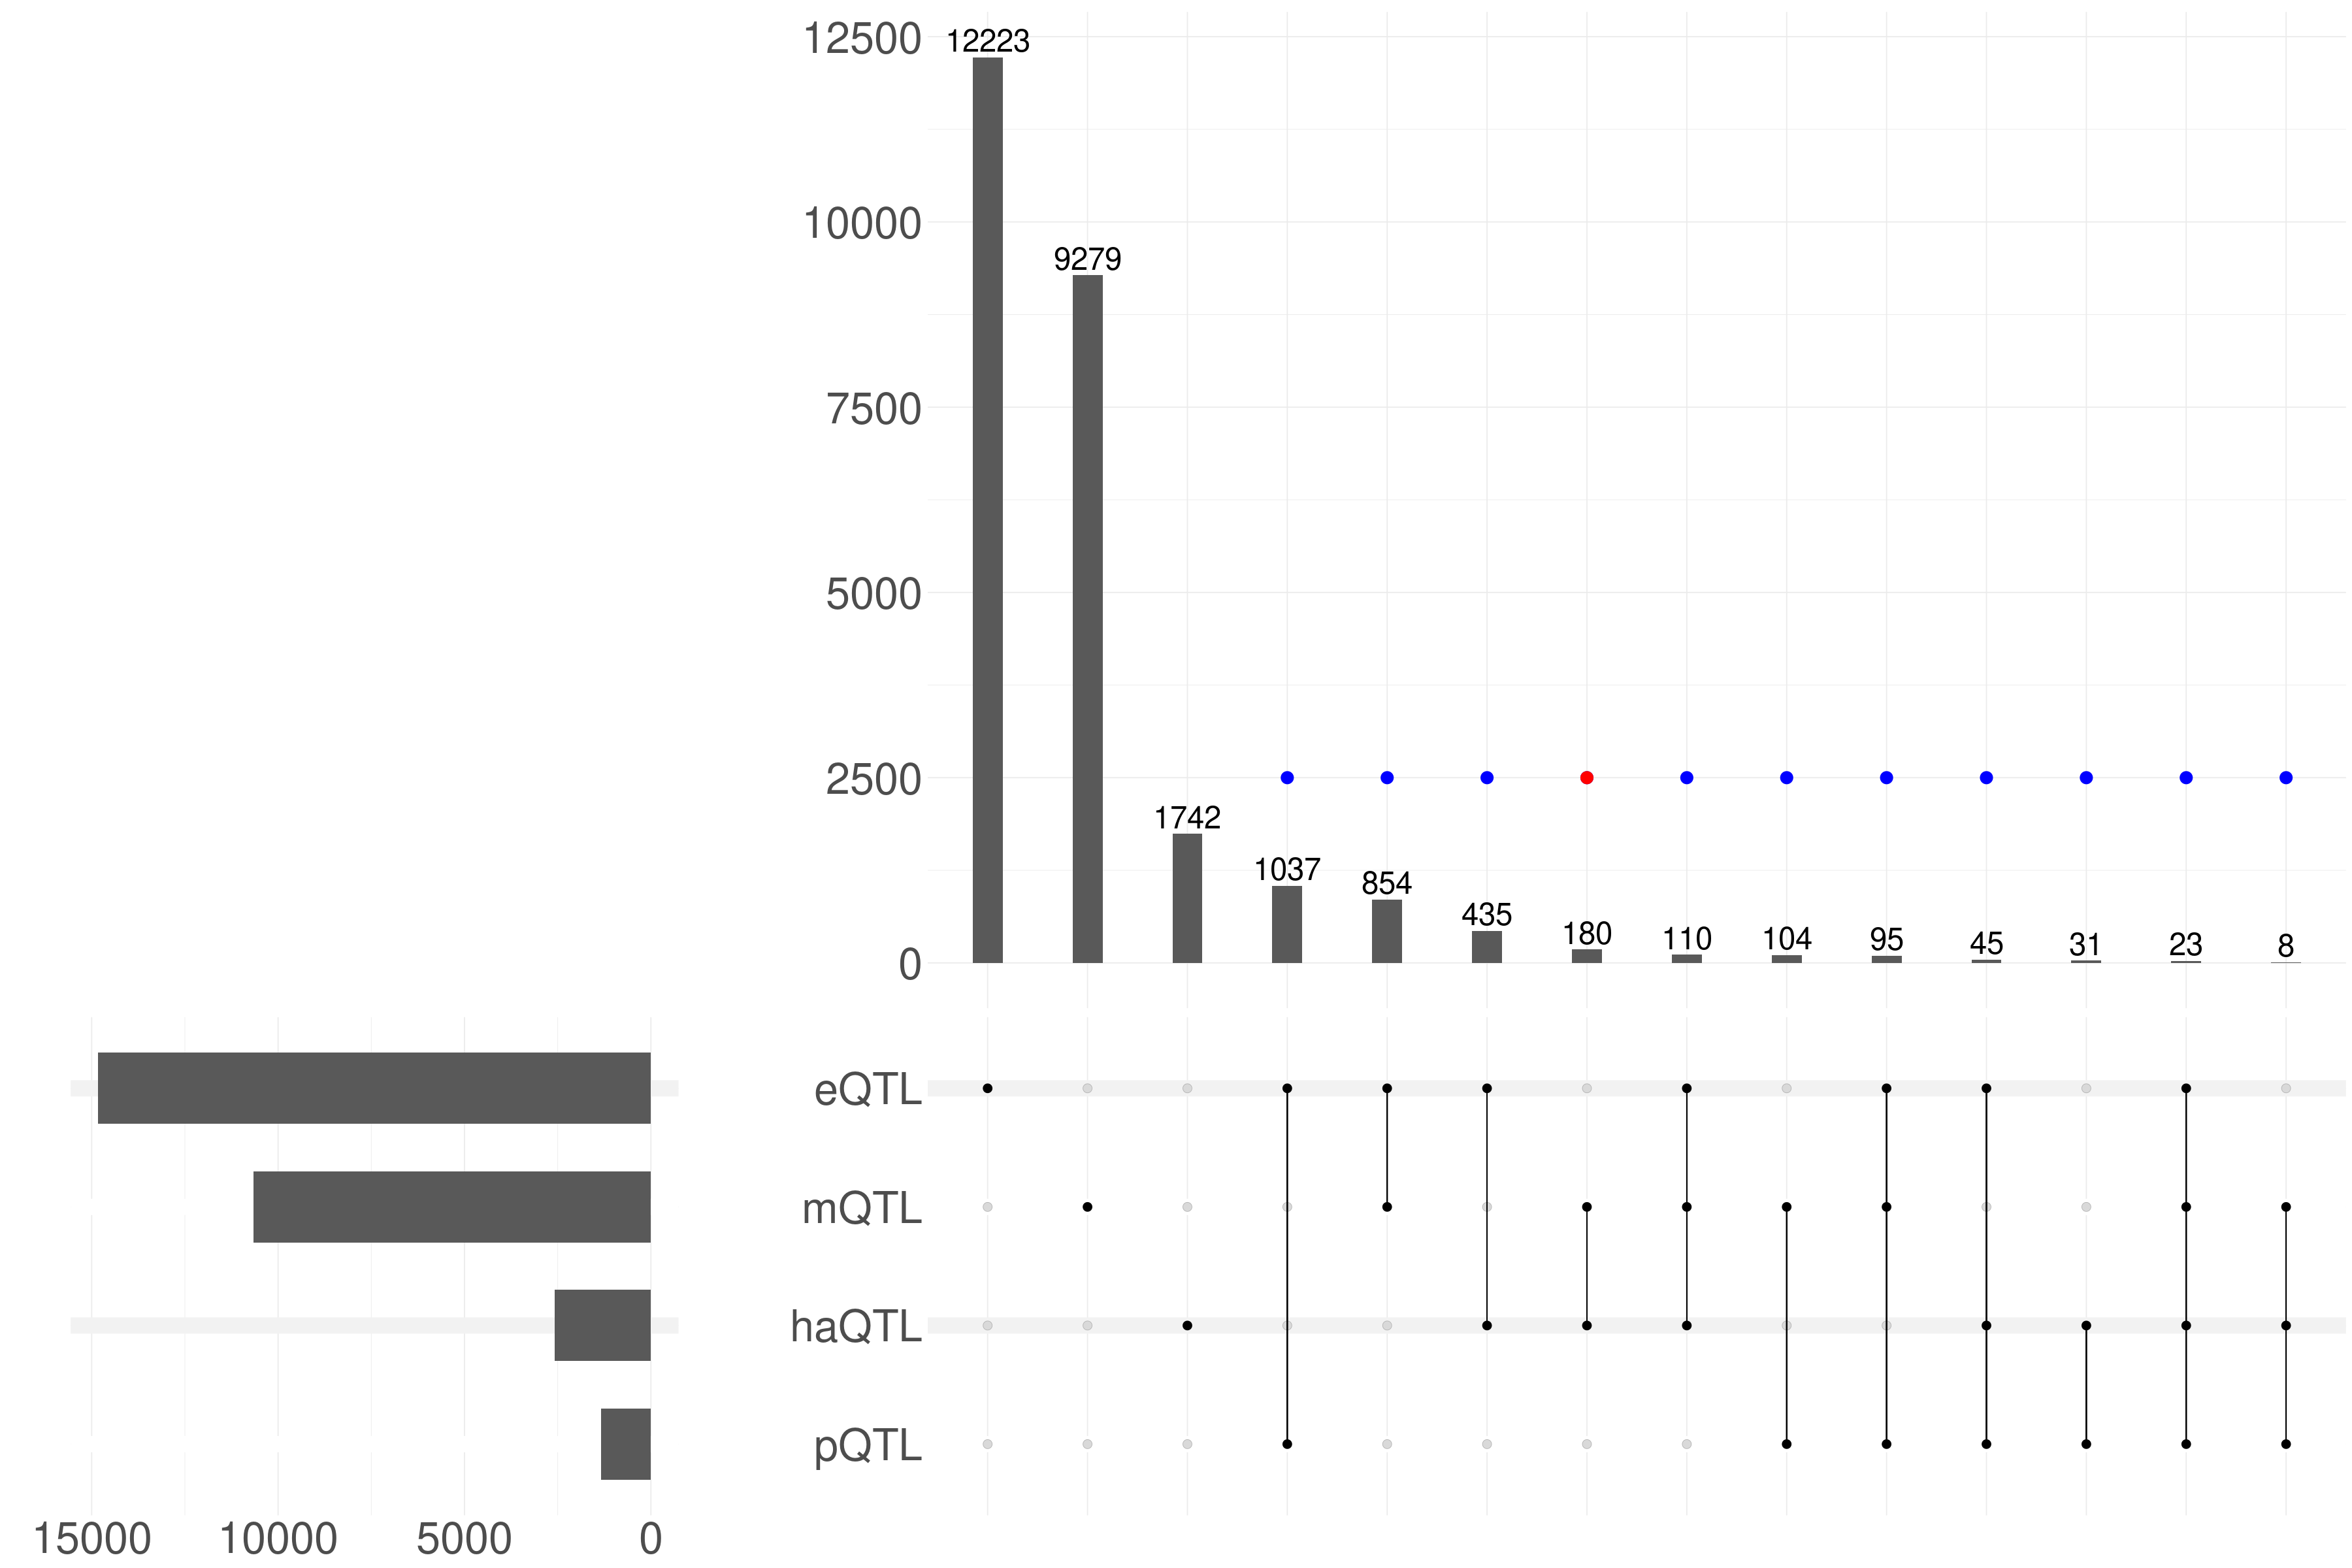

In [183]:
upset(combind_cs%>%dplyr::select(haQTL,mQTL,eQTL,pQTL),intersect = c("mQTL","haQTL","eQTL","pQTL"),
  keep_empty_groups = F,
      base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 10)  )+ylab("")+annotate("point", y = 2500, x = c(4:14), color = "blue", size = 5  ) + annotate("point", y = 2500, x = c(7), color = "red", size = 5  )       ) ,
          themes=upset_default_themes(plot.margin=unit(c(0,0,0,20),"mm"),axis.text=element_text(size=40), axis.title.x = element_blank() ,text=element_text(size=40) )     ,  
          min_degree = 1)

## Redo shared TSS

In [52]:
haQTL_affected_region = readr::read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping//all.haQTL.affected_region.tsv","\t")
mQTL_affected_region = readr::read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping//all.mQTL.affected_region.tsv","\t")


Rows: 14720 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): analysis, chr, molecular_trait_id
dbl (3): CS, Start, End
lgl (1): purity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 89578 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): analysis, chr, molecular_trait_id
dbl (3): CS, Start, End
lgl (1): purity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [53]:
joint = inner_join(h16,m16, by = "variants")
shared_cs_map = joint%>%count(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y)

In [54]:
shared_cs_map = joint%>%count(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y)

In [64]:
haQTL_shared_affected_region = inner_join(shared_cs_map,haQTL_affected_region,by = c("molecular_trait_id.x" =  "molecular_trait_id", "cs_order.x" = "CS" ))
meQTL_shared_affected_region = inner_join(shared_cs_map,mQTL_affected_region,by = c("molecular_trait_id.y" =  "molecular_trait_id", "cs_order.y" = "CS" ))
bothQTL_shared_affected_region = inner_join(haQTL_shared_affected_region,meQTL_shared_affected_region,by = c("molecular_trait_id.y" , "molecular_trait_id.x", "cs_order.y",  "cs_order.x" ))

Warning message in inner_join(shared_cs_map, haQTL_affected_region, by = c(molecular_trait_id.x = "molecular_trait_id", :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 829 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”
Warning message in inner_join(haQTL_shared_affected_region, meQTL_shared_affected_region, :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [65]:
bothQTL_shared_affected_region = bothQTL_shared_affected_region%>%mutate(Start.x = Start.x%>%coalesce(1),Start.y = Start.y%>%coalesce(1))

In [66]:
bothQTL_shared_affected_region = bothQTL_shared_affected_region%>%rename(`#chr` = chr.x)

In [67]:
bothQTL_shared_affected_region%>%filter()%>%count(molecular_trait_id.x,cs_order.x)

molecular_trait_id.x,cs_order.x,n
<chr>,<dbl>,<int>
tad1000,1,64
tad1003,2,12
tad1015,3,21
tad1017,3,18
tad102,1,18
tad102,2,60
tad1025,7,90
tad1026,1,56
tad1027,1,90


In [68]:
bothQTL_shared_affected_region_affected_gene = inner_join(bothQTL_shared_affected_region,gene_name) 

Joining with `by = join_by(`#chr`)`
Warning message in inner_join(bothQTL_shared_affected_region, gene_name):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 37596 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [69]:
bothQTL_shared_affected_region%>%count(molecular_trait_id.y,cs_order.y)%>%nrow()

[1] 298

In [70]:
bothQTL_shared_affected_region_affected_gene_clean = bothQTL_shared_affected_region_affected_gene%>%mutate(regulated = 10*(start >= Start.y & end <= End.y) + (start >= Start.x & end <= End.x)  )

In [71]:
bothQTL_shared_affected_region_affected_gene_clean = bothQTL_shared_affected_region_affected_gene_clean%>%filter(regulated != 0)

In [72]:
duplicated_gene = bothQTL_shared_affected_region_affected_gene_clean%>%filter(regulated != 0)%>%group_by(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,regulated)%>%count(gene_id)%>%filter(regulated == 8)%>%pull(gene_id)

### Filter out the gene that are count multiple times

In [73]:
bothQTL_shared_affected_region_affected_gene_clean_nodup = bothQTL_shared_affected_region_affected_gene_clean%>%filter(regulated != 0)%>%group_by(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,regulated)%>%ungroup%>%group_by(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,gene_id)%>%summarize(max_regulated = max(regulated))

`summarise()` has grouped output by 'molecular_trait_id.x', 'cs_order.x',
'molecular_trait_id.y', 'cs_order.y'. You can override using the `.groups`
argument.


In [74]:
bothQTL_shared_affected_region%>%filter(Start.x == End.x)%>%filter(molecular_trait_id.x == "tad732", cs_order.x == 1)

molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,n.x,Start.x,End.x,analysis.x,#chr,purity.x,n.y,Start.y,End.y,analysis.y,chr.y,purity.y
<chr>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<lgl>
tad732,1,tad732,6,22,1,1,rosmap_haqtl,chr8,NA,22,18907605,18916710,yuqi_mqtl,chr8,NA
tad732,1,tad732,6,22,1,1,rosmap_haqtl,chr8,NA,22,19216526,19216526,yuqi_mqtl,chr8,NA
tad732,1,tad732,6,22,1,1,rosmap_haqtl,chr8,NA,22,19230704,19233761,yuqi_mqtl,chr8,NA
tad732,1,tad732,6,22,1,1,rosmap_haqtl,chr8,NA,22,18903331,18903331,yuqi_mqtl,chr8,NA
tad732,1,tad732,6,22,1,1,rosmap_haqtl,chr8,NA,22,19138118,19138118,yuqi_mqtl,chr8,NA
tad732,1,tad732,6,22,1,1,rosmap_haqtl,chr8,NA,22,19223644,19223644,yuqi_mqtl,chr8,NA
tad732,1,tad732,6,22,1,1,rosmap_haqtl,chr8,NA,22,19227174,19227174,yuqi_mqtl,chr8,NA
tad732,1,tad732,6,22,1,1,rosmap_haqtl,chr8,NA,22,19309690,19309690,yuqi_mqtl,chr8,NA
tad732,1,tad732,6,22,19292355,19292355,rosmap_haqtl,chr8,NA,22,18907605,18916710,yuqi_mqtl,chr8,NA


In [130]:
bothQTL_shared_affected_region_affected_gene_no_dup_16 = bothQTL_shared_affected_region_affected_gene_clean_nodup%>%mutate(id = paste0(molecular_trait_id.x,"_",cs_order.x ))%>%filter(id %in% ((combind_cs_me)%>%pull(id)) )

In [ ]:
library(ComplexUpset)

In [121]:
cs_prop_16_clean = bothQTL_shared_affected_region_affected_gene_clean_nodup%>%group_by(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,max_regulated)%>%count()%>%pivot_wider(names_from  =  max_regulated, values_from = n )

In [122]:
cs_prop_16_clean[is.na(cs_prop_16_clean)] <- 0
colnames(cs_prop_16_clean)[5:7] = c("haQTL_unique_gene","mQTL_unique_gene","shared_gene")

Warning message in upset_data(data, intersect, mode = mode, encode_sets = encode_sets, :
“Converting non-logical columns to binary: haQTL_unique_gene, mQTL_unique_gene, shared_gene”


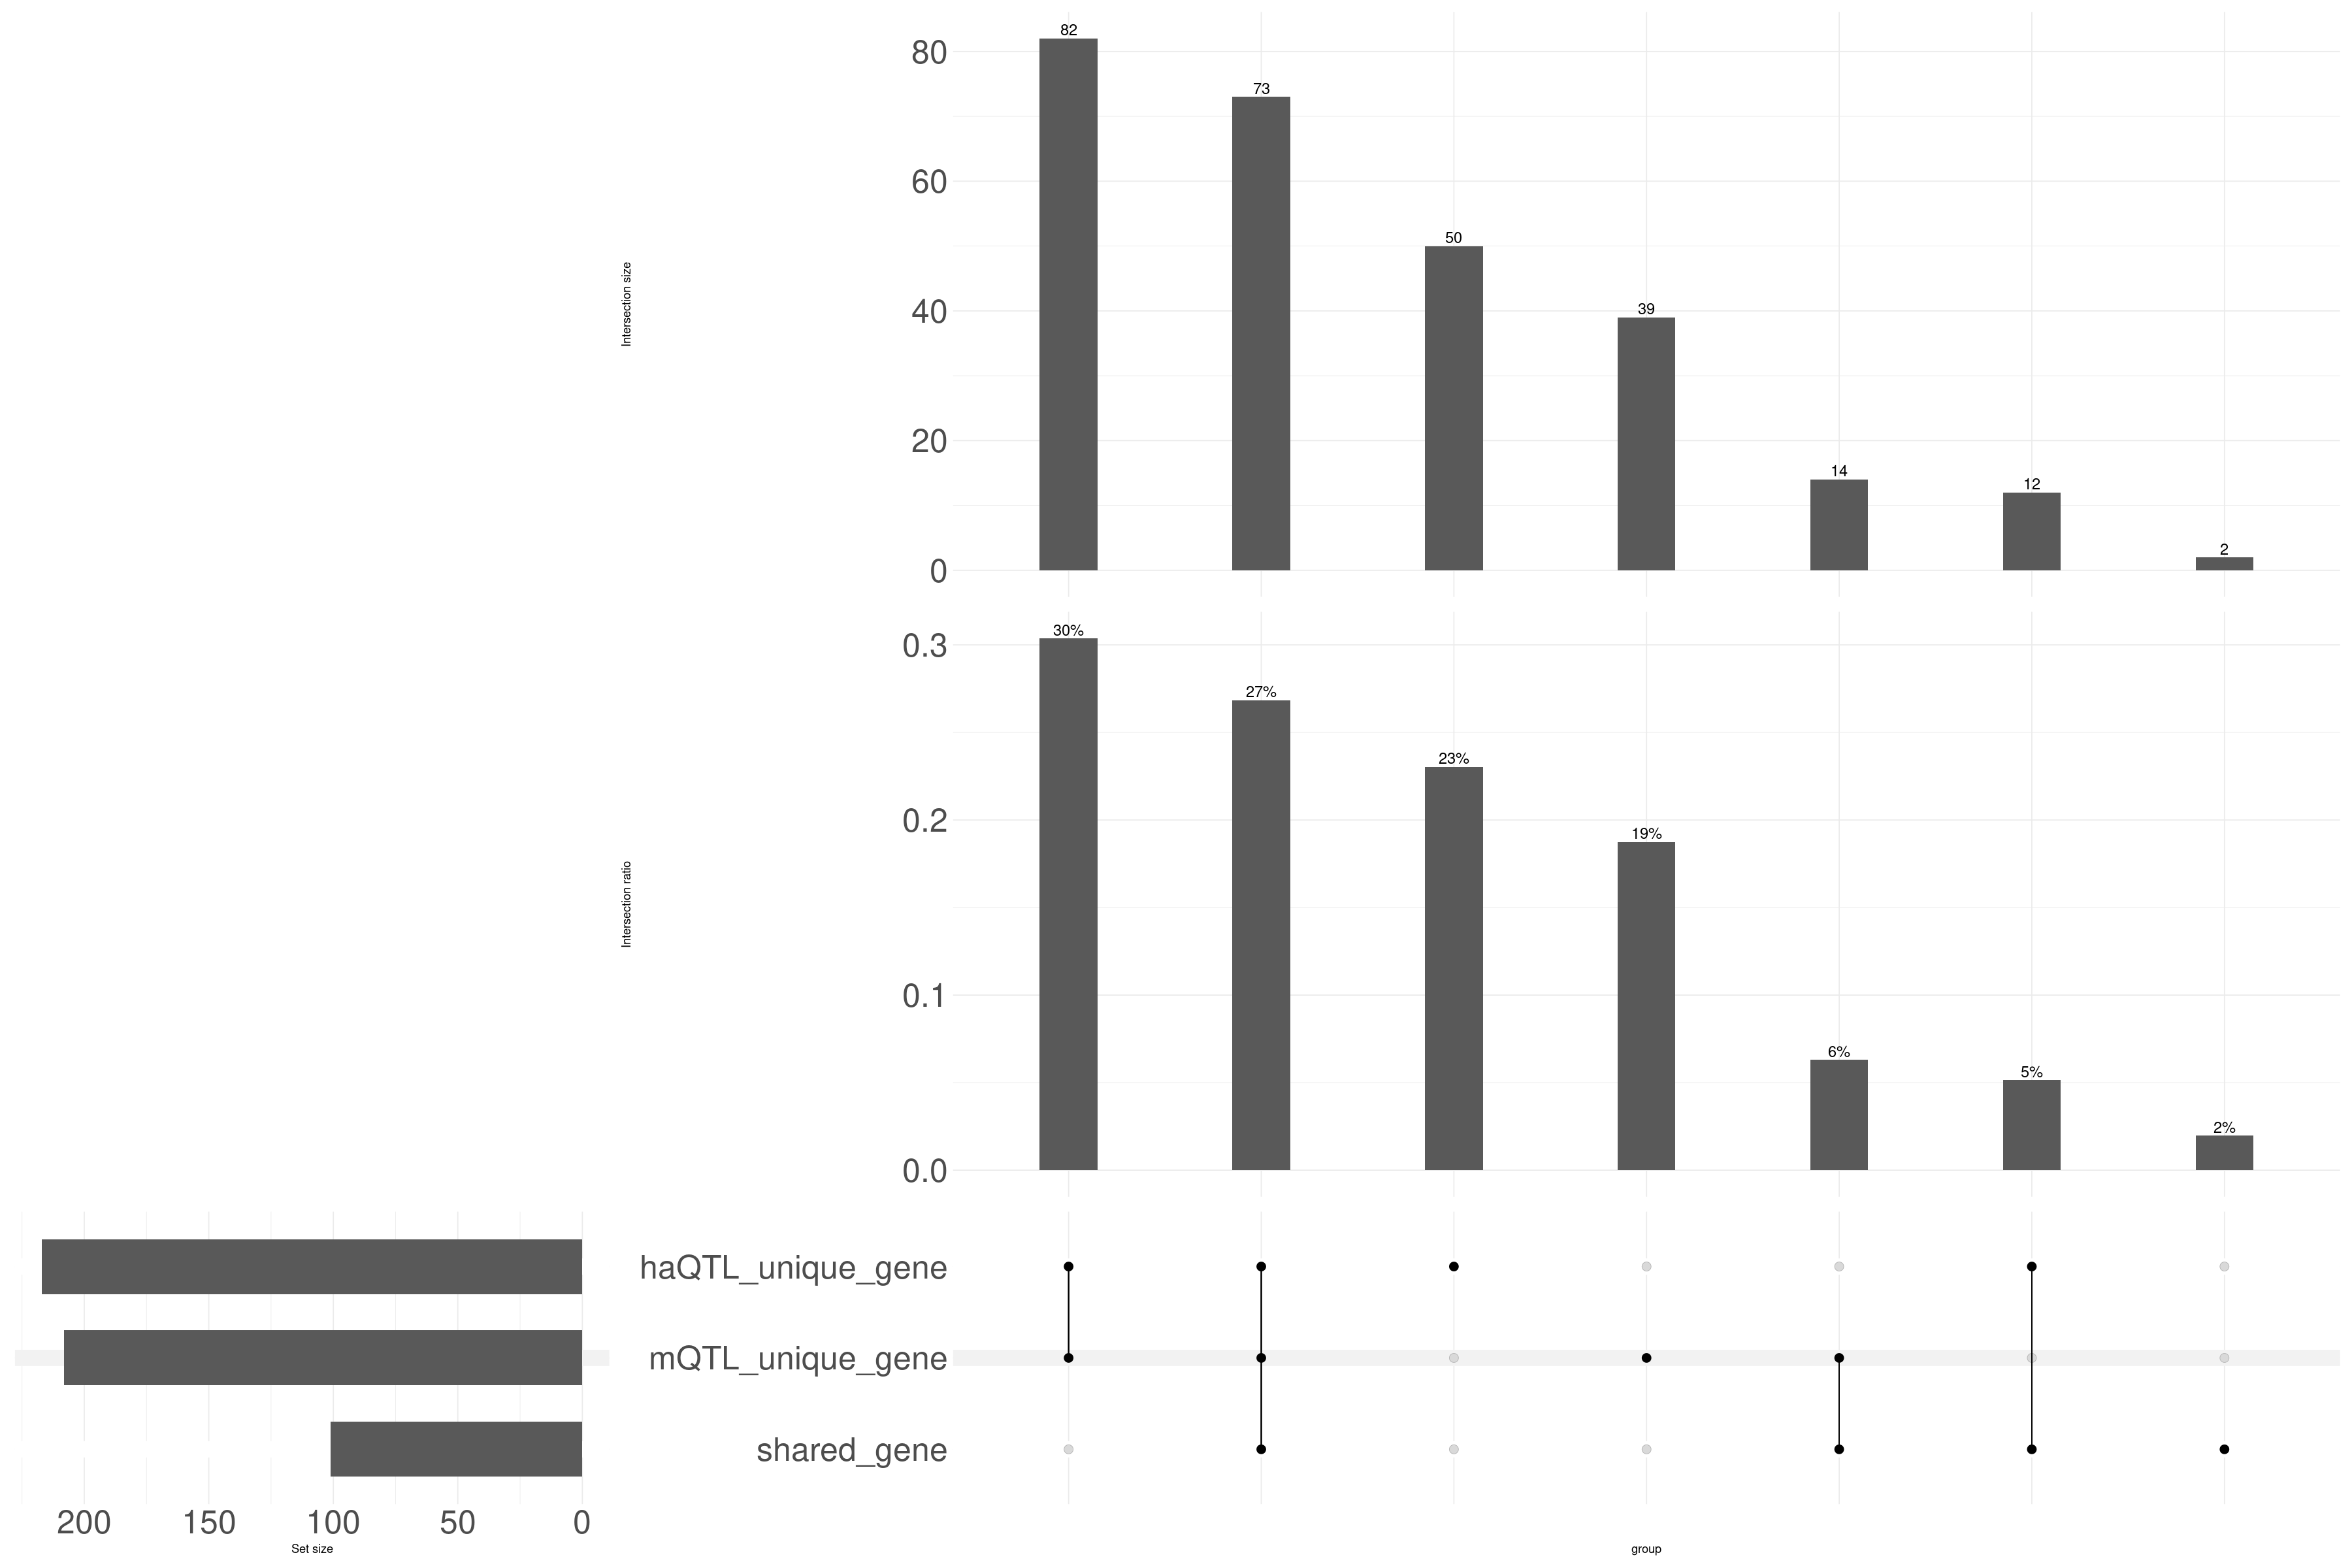

In [123]:
 upset(cs_prop_16_clean%>%as.data.frame,intersect = colnames(cs_prop_16_clean)[5:7],
  keep_empty_groups = F,
      base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 5)  ), `Intersection ratio`=intersection_ratio(text_mapping=aes(label=!!upset_text_percentage()),bar_number_threshold = 1, width = 0.3 ,text = list(size = 5)  )   ) ,
          themes=upset_default_themes(axis.text=element_text(size=30))     ,
          min_degree = 1)

In [124]:
cs_prop_16_clean%>%filter((haQTL_unique_gene == 0) , mQTL_unique_gene == 0 )

molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,haQTL_unique_gene,mQTL_unique_gene,shared_gene
<chr>,<dbl>,<chr>,<dbl>,<int>,<int>,<int>
tad1173,1,tad1173,6,0,0,5
tad18,4,tad18,5,0,0,5


### Direction of max effect for sharerd haQTL and meQTL with 16

### Estimated Effect size correlation for shared CS 16

In [142]:
ha16_effect = ha16_effect%>%unnest(effect)

In [159]:
m16_effect = m16_effect%>%unnest(effect)

In [164]:
m16_effect = m16_effect%>%pivot_longer(cols = Effect_1:Effect_20, names_to = "effect_order", names_prefix =  "Effect_", values_to =  "effect"  )%>%group_by(effect_order,molecular_trait_id)%>%summarise(max_effect = effect[which(abs(effect) == max(abs(effect)))] )%>%arrange(max_effect)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'effect_order', 'molecular_trait_id'. You
can override using the `.groups` argument.


In [160]:
colnames(ha16_effect)

[1] "cs_order.x"           "molecular_trait_id.x" "max_effect.ha"

In [144]:
ha16_effect = ha16_effect%>%pivot_longer(cols = Effect_1:Effect_16, names_to = "effect_order", names_prefix =  "Effect_", values_to =  "effect"  )%>%group_by(effect_order,molecular_trait_id)%>%summarise(max_effect = effect[which(abs(effect) == max(abs(effect)))] )%>%arrange(max_effect)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'effect_order', 'molecular_trait_id'. You
can override using the `.groups` argument.


In [145]:
ha16_effect = ha16_effect%>%rename(cs_order.x = effect_order, molecular_trait_id.x = molecular_trait_id )


In [146]:
ha16_effect = ha16_effect%>%mutate(cs_order.x = as.numeric(cs_order.x))

In [147]:
ha16_effect = ha16_effect%>%rename(max_effect.ha =  max_effect)


In [165]:
colnames(m16_effect)

[1] "effect_order"       "molecular_trait_id" "max_effect"

In [166]:
m16_effect = m16_effect%>%rename(cs_order.y = effect_order, molecular_trait_id.y = molecular_trait_id )


In [167]:
m16_effect = m16_effect%>%mutate(cs_order.y = as.numeric(cs_order.y))

In [168]:
m16_effect = m16_effect%>%rename(max_effect.m =  max_effect)


In [169]:
shared_cs_map_effect = Reduce(inner_join, list(shared_cs_map,ha16_effect,m16_effect ))

Joining with `by = join_by(molecular_trait_id.x, cs_order.x)`
Joining with `by = join_by(molecular_trait_id.y, cs_order.y)`


In [170]:
cs_prop_16e_cat = cs_prop_16_clean%>%mutate( haQTL_unique_gene = (haQTL_unique_gene != 0) , mQTL_unique_gene = (mQTL_unique_gene != 0) ,shared_gene = (shared_gene != 0)  , cat = haQTL_unique_gene + 10*mQTL_unique_gene  + 100*shared_gene)

In [171]:
cs_prop_16e_cat = left_join(shared_cs_map_effect,cs_prop_16e_cat)%>%mutate(cat = coalesce(cat,(0)))

Joining with `by = join_by(molecular_trait_id.x, cs_order.x,
molecular_trait_id.y, cs_order.y)`


In [172]:
color = c("black", "dodgerblue2", "green4", "#6A3D9A",
      "#FF7F00", "gold1", "skyblue2", "#FB9A99", "palegreen2",
      "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
      "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
      "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
      "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
      "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")

In [173]:
sort(as.numeric(cs_prop_16e_cat$cat))

[1]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [19]   0   0   0   0   0   0   0   0   1   1   1   1   1   1   1   1   1   1
 [37]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
 [55]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
 [73]   1   1   1   1  10  10  10  10  10  10  10  10  10  10  10  10  10  10
 [91]  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10
[109]  10  10  10  10  10  10  10  11  11  11  11  11  11  11  11  11  11  11
[127]  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11
[145]  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11
[163]  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11
[181]  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11 100
[199] 100 101 101 101 101 101 101 101 101 101 101 101 101 110 110 110 110 110
[217] 110 110 110 110 110 110 110 110 110 111 111 111 111 111 111 111 111 111
[235] 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111
[253] 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111
[271] 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111
[289] 111 111 111 111 111 111 111 111 111 111

In [174]:
cs_prop_16e_cat%>%group_by(cat)%>%summarize(cor(max_effect.ha,max_effect.m))

cat,"cor(max_effect.ha, max_effect.m)"
<dbl>,<dbl>
0,-0.6554779
1,-0.4317494
10,-0.2811396
11,-0.7159512
100,-1.0000000
101,-0.4839863
110,-0.5737639
111,-0.7488210


In [175]:
cs_prop_16e_cat = cs_prop_16e_cat%>%mutate(cat = ifelse(cat == 111, "All TSS shared by haQTL and mQTL CS, R^2 = -0.749 ",ifelse(cat == 000, "No TSS in affected region, R^2 = -0.655" ,"Others, R^2 = -0.541"  ) )   )

In [176]:
cs_prop_16e_cat%>%group_by(cat)%>%summarize(cor(max_effect.ha,max_effect.m))

cat,"cor(max_effect.ha, max_effect.m)"
<chr>,<dbl>
"All TSS shared by haQTL and mQTL CS, R^2 = -0.749",-0.7488210
"No TSS in affected region, R^2 = -0.655",-0.6554779
"Others, R^2 = -0.541",-0.5607425


In [177]:
e = upset(cs_prop_16e_cat%>%as.data.frame,intersect = c("haQTL_unique_gene","mQTL_unique_gene","shared_gene"),
  keep_empty_groups = F,
      base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 10)  )+ylab("")   ) ,
          themes=upset_default_themes(plot.margin=unit(c(0,0,0,20),"mm"),axis.text=element_text(size=40), axis.title.x = element_blank() ,text=element_text(size=40) )     ,  
          min_degree = 1)

Warning message in upset_data(data, intersect, mode = mode, encode_sets = encode_sets, :
“Detected missing values in the columns indicating sets, coercing to FALSE”


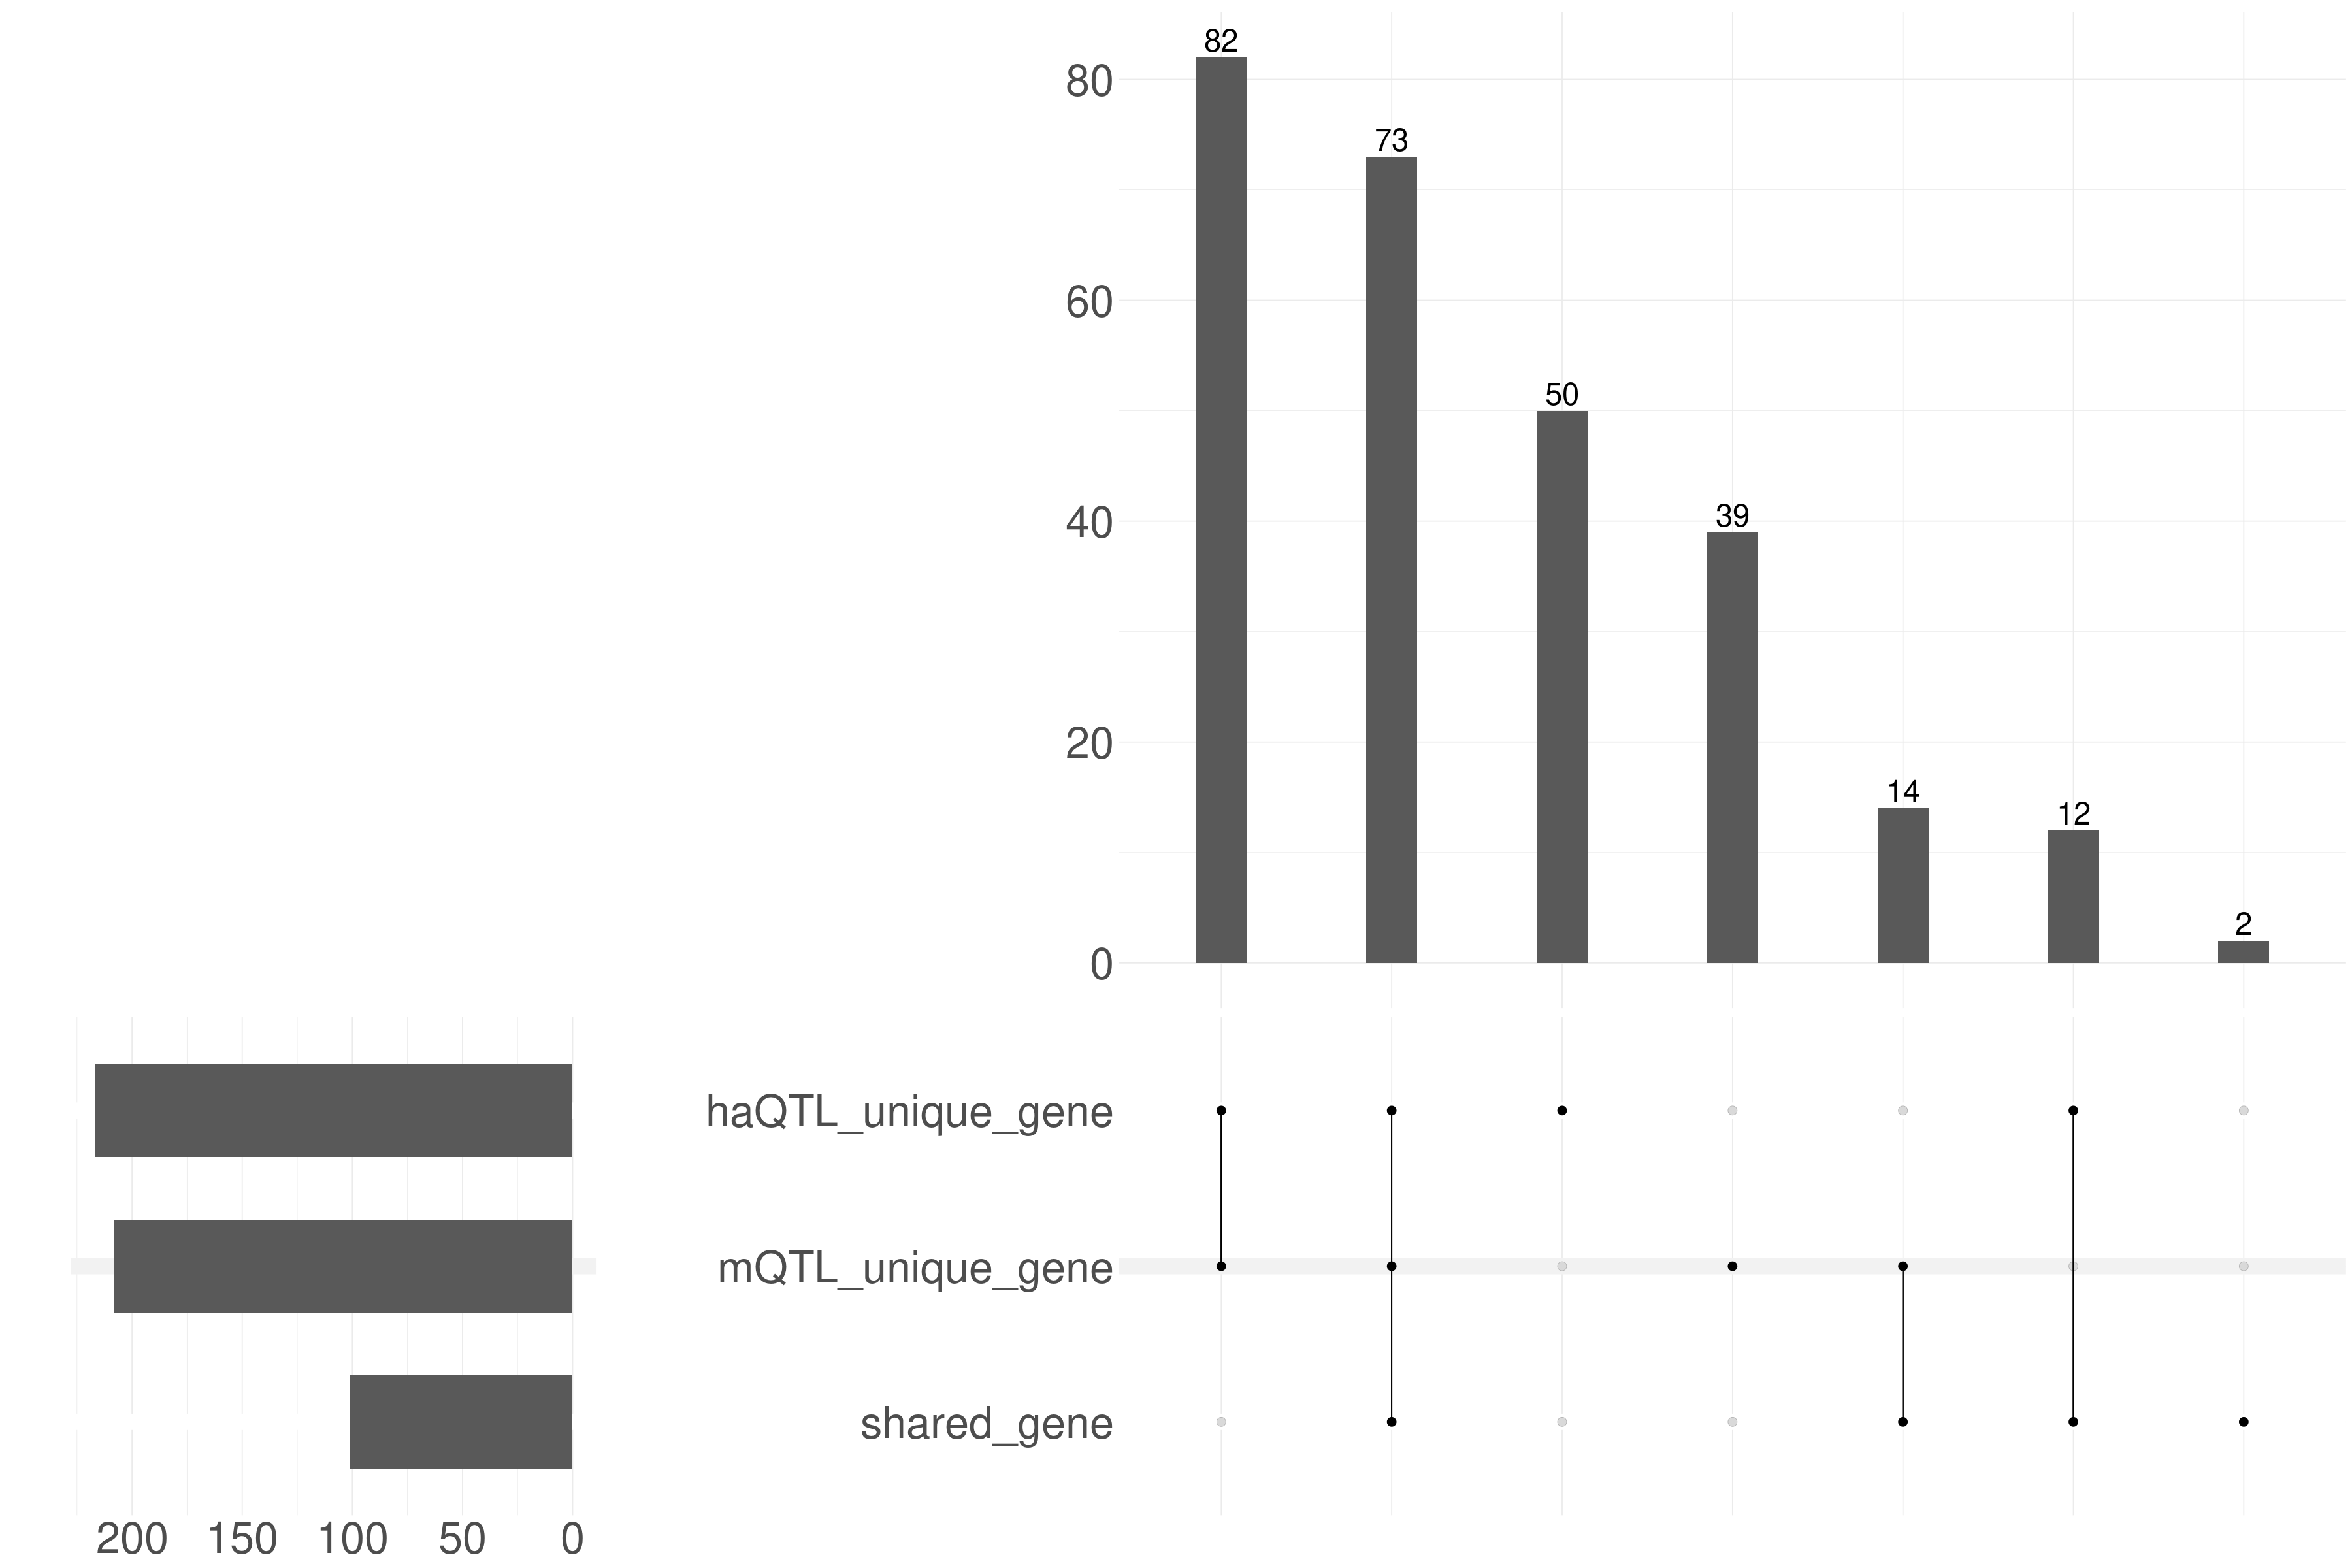

In [178]:
e

In [179]:
cs_prop_16e_cat%>%filter(shared_gene)

molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,n,max_effect.ha,max_effect.m,haQTL_unique_gene,mQTL_unique_gene,shared_gene,cat
<chr>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>
tad1000,1,tad1000,2,1,-0.4174123,0.5844792,TRUE,TRUE,TRUE,"All TSS shared by haQTL and mQTL CS, R^2 = -0.749"
tad1015,3,tad1015,7,23,0.2013206,-0.1558040,TRUE,TRUE,TRUE,"All TSS shared by haQTL and mQTL CS, R^2 = -0.749"
tad1026,1,tad1026,3,5,0.3220453,-0.6044751,TRUE,TRUE,TRUE,"All TSS shared by haQTL and mQTL CS, R^2 = -0.749"
tad1027,1,tad1027,6,1,-0.2001828,0.4896485,FALSE,TRUE,TRUE,"Others, R^2 = -0.541"
tad1050,1,tad1050,2,1,-0.2521201,0.3677271,TRUE,FALSE,TRUE,"Others, R^2 = -0.541"
tad1085,4,tad1085,2,1,0.3343096,-0.2178024,TRUE,TRUE,TRUE,"All TSS shared by haQTL and mQTL CS, R^2 = -0.749"
tad1091,2,tad1091,1,1,0.1047211,-0.5419435,TRUE,TRUE,TRUE,"All TSS shared by haQTL and mQTL CS, R^2 = -0.749"
tad1128,2,tad1128,2,1,-0.2611269,0.6070477,TRUE,TRUE,TRUE,"All TSS shared by haQTL and mQTL CS, R^2 = -0.749"
tad1128,6,tad1128,1,1,0.1794657,-0.6359116,TRUE,TRUE,TRUE,"All TSS shared by haQTL and mQTL CS, R^2 = -0.749"


In [182]:
cs_prop_16e_cat%>%write_delim("2_correlation.tsv","\t")

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


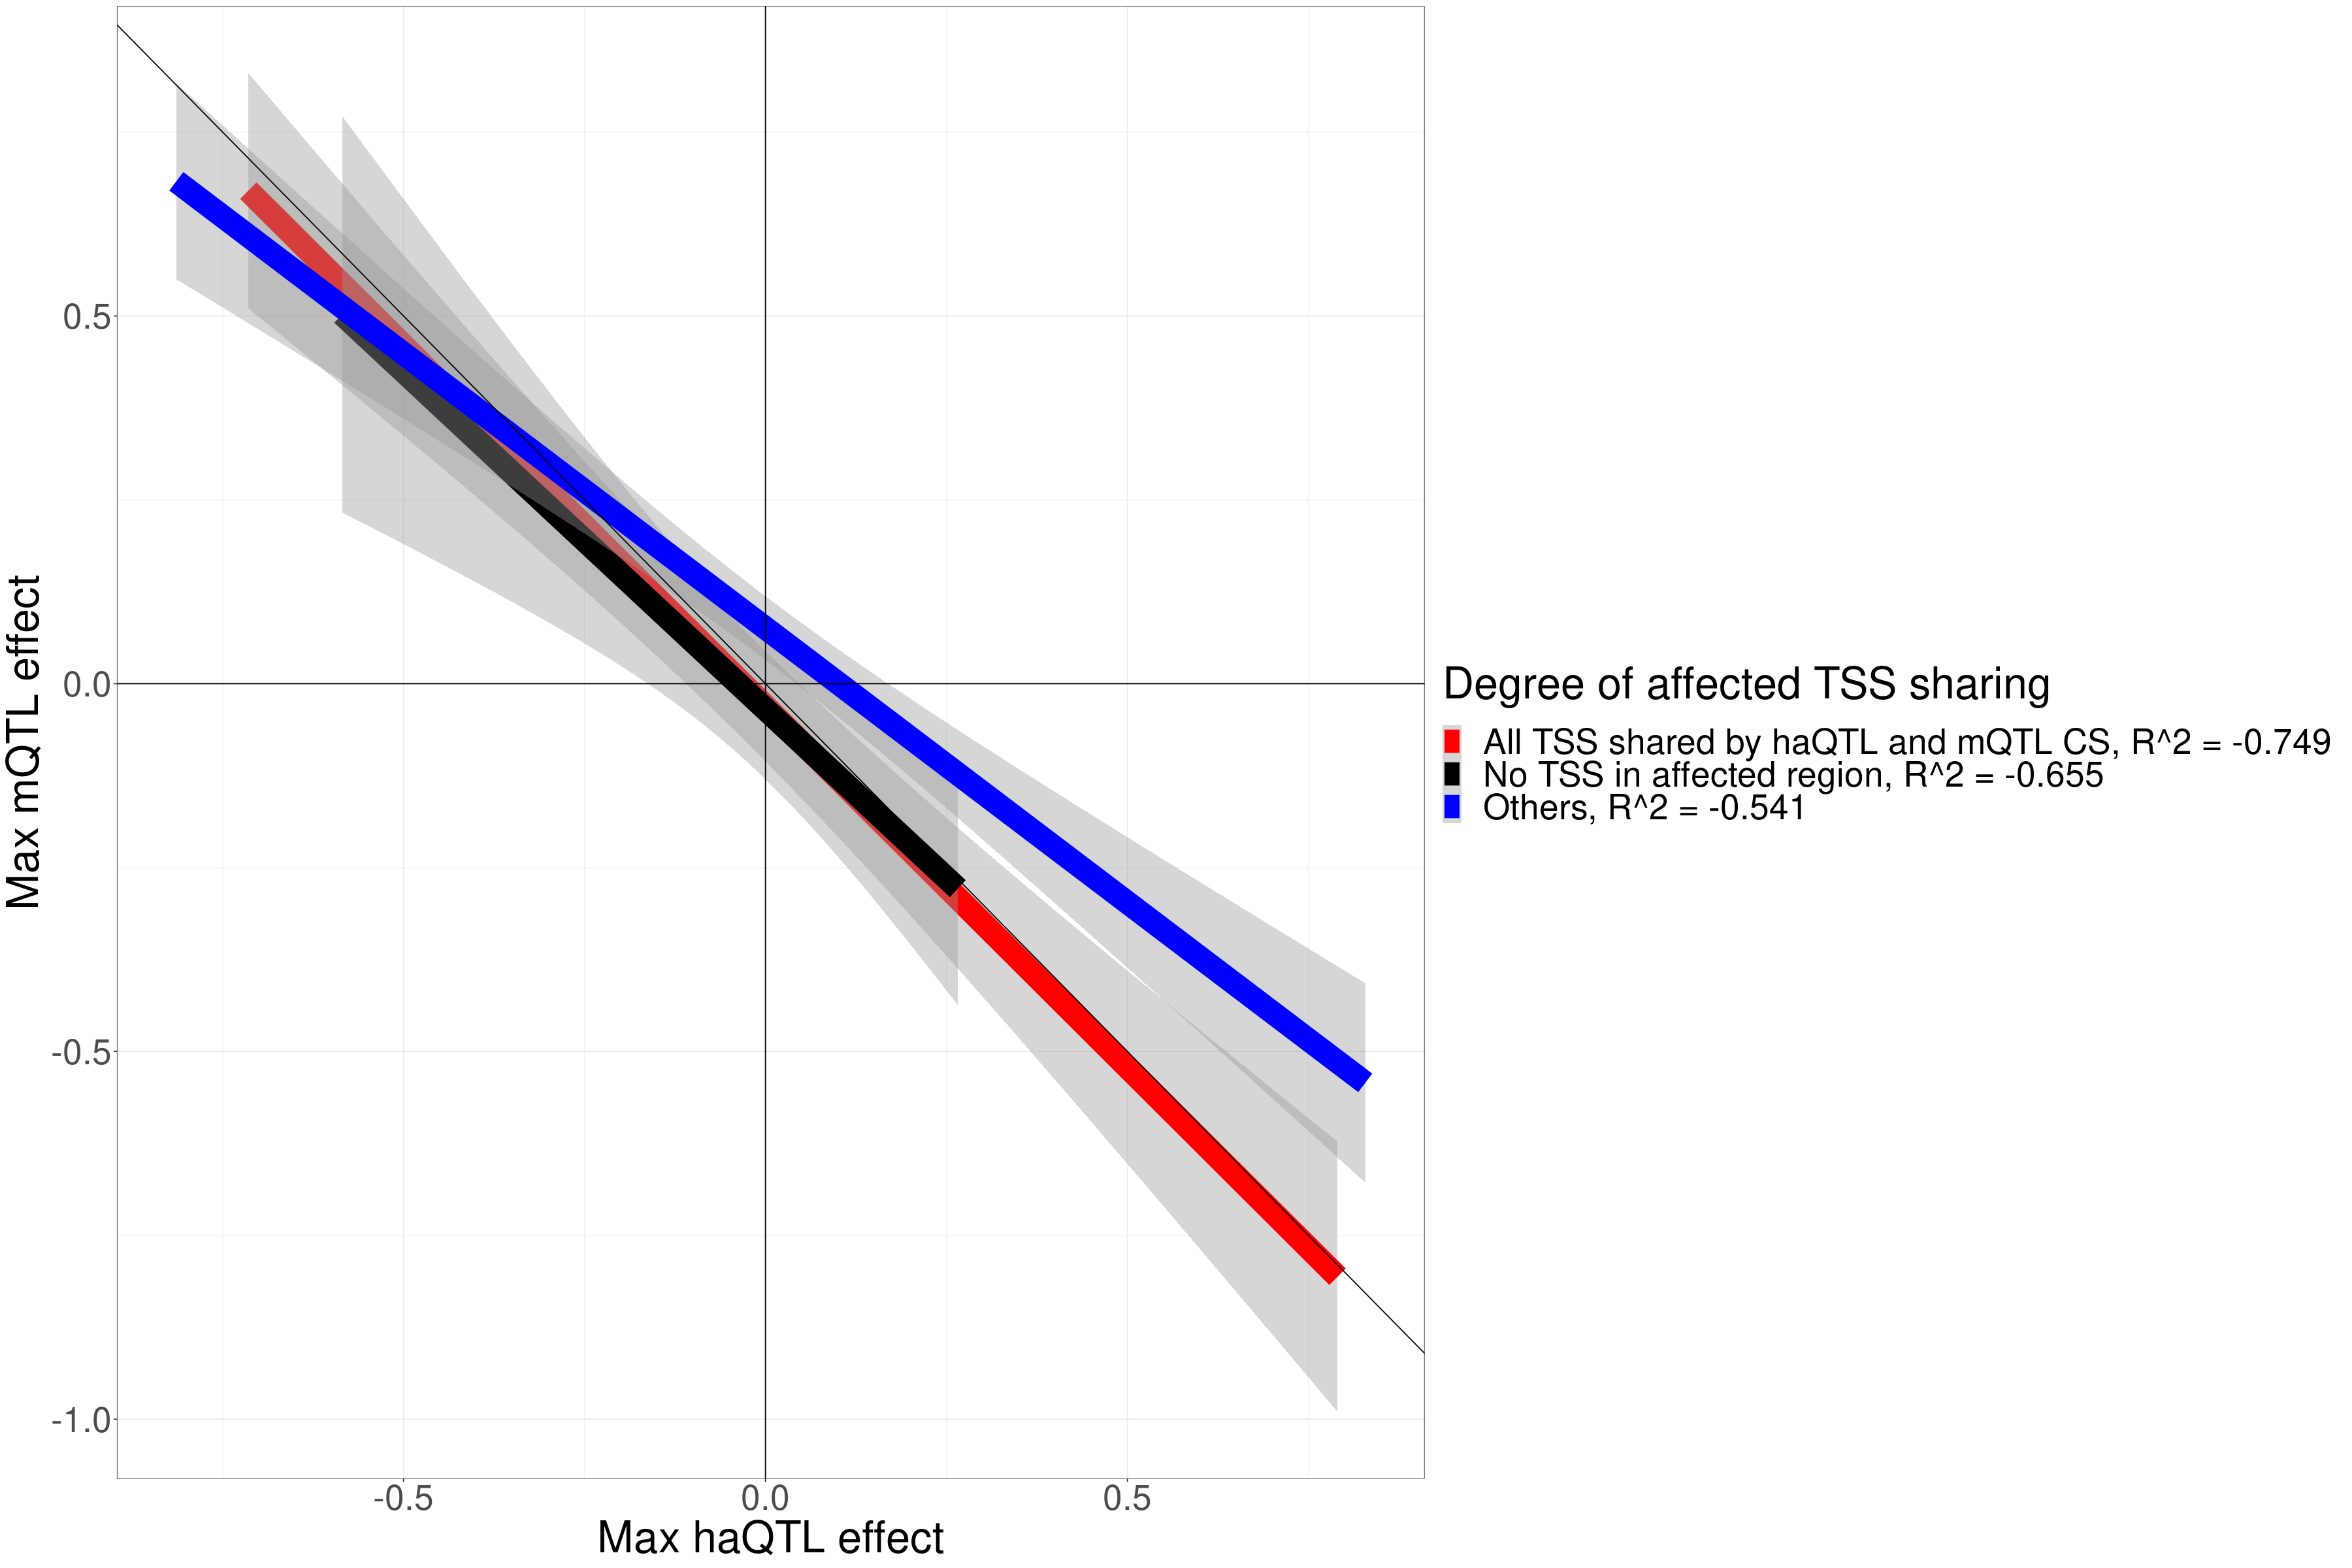

In [180]:
cs_prop_16e_cat%>%ggplot(aes(x = max_effect.ha, y = max_effect.m  ))+geom_smooth(aes(color = cat), size = 10,method = "lm")+geom_vline( xintercept = 0) + geom_hline(yintercept = 0) + geom_abline(slope = -1) +xlab("Max haQTL effect")+ ylab("Max mQTL effect")  + theme_bw()+   theme(text = element_text(size = 40))  +   scale_color_manual("Degree of affected TSS sharing",values = c("red","black","blue")) 

Warning message in geom_point(aes(color = cat), size = 10, method = "lm"):
“Ignoring unknown parameters: `method`”


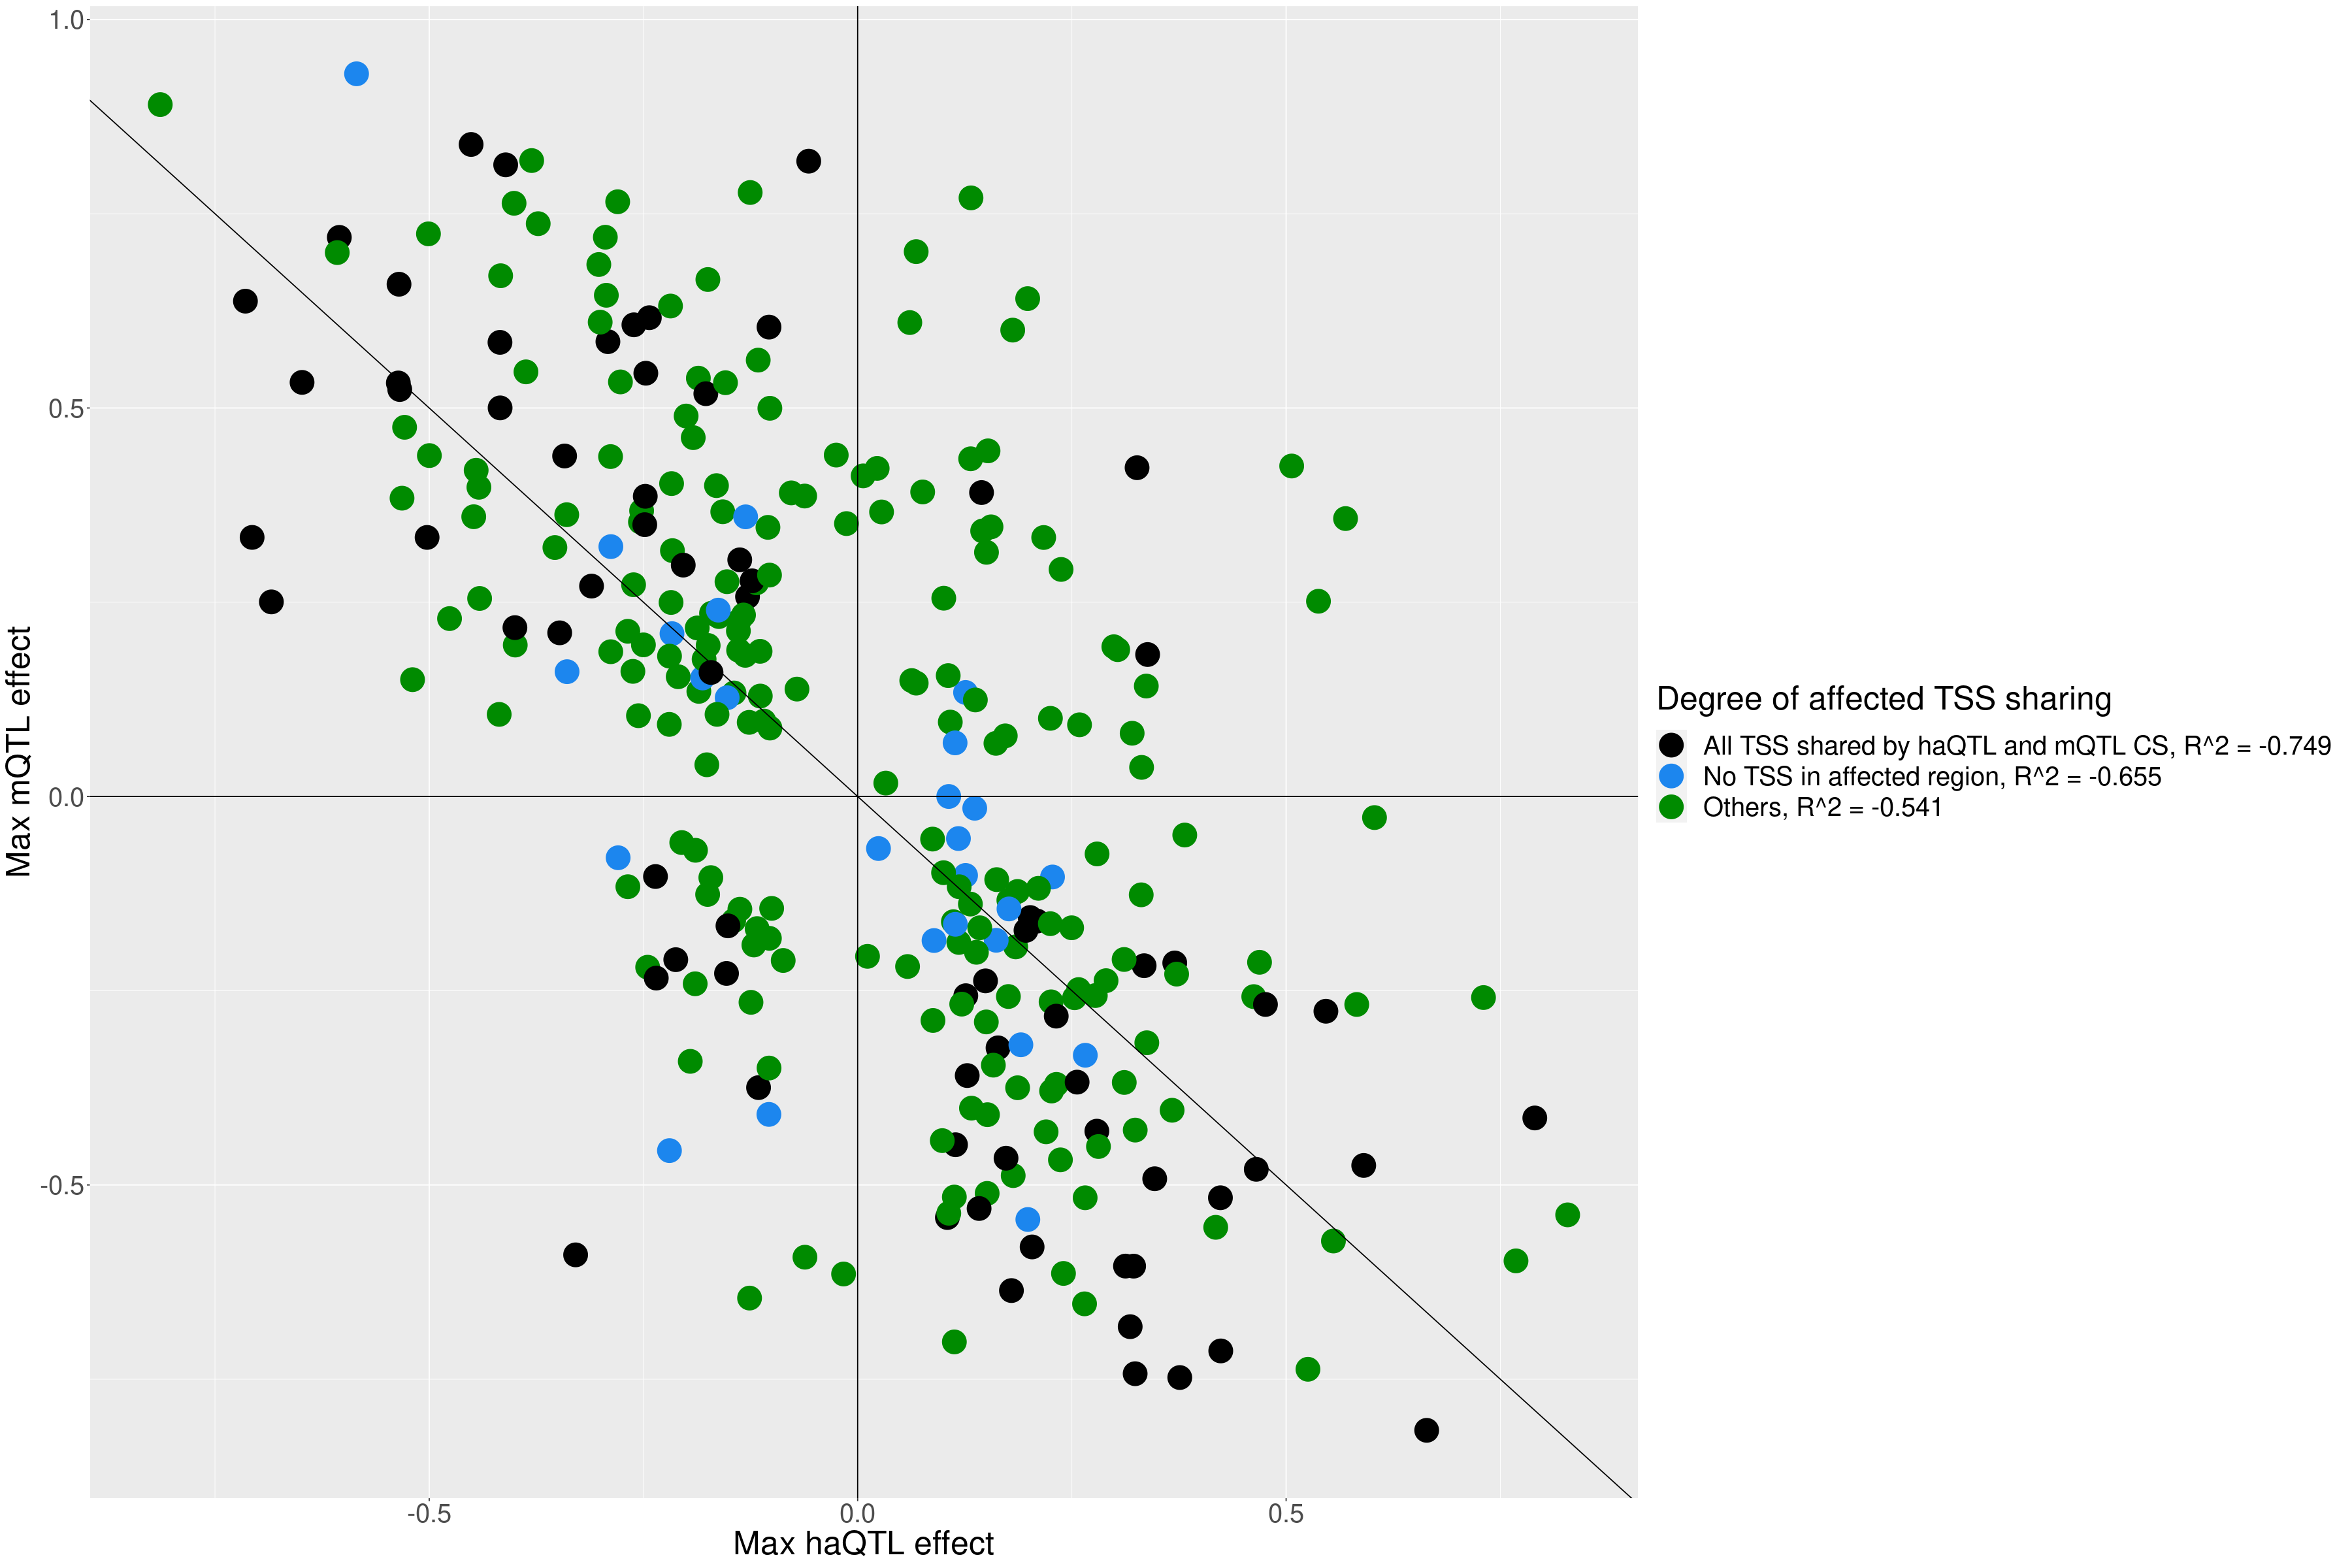

In [181]:
cs_prop_16e_cat%>%ggplot(aes(x = max_effect.ha, y = max_effect.m  ))+geom_point(aes(color = cat), size = 10,method = "lm")+geom_vline( xintercept = 0) + geom_hline(yintercept = 0) + geom_abline(slope = -1) +xlab("Max haQTL effect")+ ylab("Max mQTL effect")  +   theme(text = element_text(size = 30))  +   scale_color_manual("Degree of affected TSS sharing",values = color) 

In [ ]:
colnames(ha16_effect)

In [ ]:
colnames(m16_effect)

In [ ]:
mQTL_tsv = m16%>%filter(variants %in% three_shared_snp$variants)%>%count(cs_order,molecular_trait_id)

In [ ]:
effect = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/all_meQTL_effect/All_meQTL_effect.tsv")

In [ ]:
mQTL_tsv = mQTL_tsv%>%mutate(effect = map(molecular_trait_id, ~read_delim(paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/all_meQTL_effect/meQTL.yuqi_mqtl.",.x,".uni_Fsusie.mixture_normal_per_scale.estimated_effect.tsv"))))

In [ ]:
mQTL_effect = mQTL_tsv%>%unnest(effect)%>%pivot_longer(cols = Effect_1:Effect_20, names_to = "effect_order", names_prefix =  "Effect_", values_to =  "effect"  )%>%
        filter(effect_order == cs_order)%>%group_by(cs_order,molecular_trait_id)%>%summarise(max_effect = effect[which(abs(effect) == max(abs(effect)))] )%>%arrange(max_effect)

In [ ]:
haQTL_tsv = haQTL_pure_completed_unlimted%>%filter(variants %in% three_shared_snp$variants)%>%count(cs_order,molecular_trait_id)

In [ ]:
haQTL_tsv = haQTL_tsv%>%mutate(effect = map(molecular_trait_id, 
                    ~read_delim(paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/all_haQTL_effect/haQTL.rosmap_haqtl.",.x,".uni_Fsusie.mixture_normal_per_scale.estimated_effect.tsv"))))

In [ ]:
haQTL_tsv%>%unnest(effect)%>%colnames

In [ ]:
haQTL_effect = haQTL_tsv%>%unnest(effect)%>%pivot_longer(cols = Effect_1:Effect_13, names_to = "effect_order", names_prefix =  "Effect_", values_to =  "effect"  )%>%
        filter(effect_order == cs_order)%>%group_by(cs_order,molecular_trait_id)%>%summarise(max_effect = effect[which(abs(effect) == max(abs(effect)))] )%>%arrange(max_effect)

In [ ]:
shared_cs_effect = inner_join(inner_join(shared_cs_map, haQTL_effect, by = c("molecular_trait_id.x" = "molecular_trait_id","cs_order.x" = "cs_order"  )), 
           mQTL_effect, by = c("molecular_trait_id.y" = "molecular_trait_id","cs_order.y" = "cs_order"  ) )

In [ ]:
eQTL_effect = eQTL%>%filter(variants %in% three_shared_snp$variants)%>%select(variants,cs_order,z,molecular_trait_id,finemapped_region_start,finemapped_region_end)

In [ ]:
eQTL%>%filter( molecular_trait_id == "ENSG00000248905",  cs_order == "c(L1 = 1)" )%>%summarize(z = sum(z))

In [ ]:
ha_e_sharing_effect = ha_e_sharing_effect%>%group_by(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,z )%>%summarize(max_z = z[which(abs(z) == max(abs(z)))] )

In [ ]:
ha_e_sharing_effect = inner_join(haQTL_pure_completed_unlimted%>%filter(variants %in% three_shared_snp$variants),eQTL_effect,by = "variants")

In [ ]:
sign(-2)

In [ ]:
pot_result = inner_join(shared_cs_effect, ha_e_sharing_effect , by = c("molecular_trait_id.x", "cs_order.x"))%>%filter(sign(z) == sign(max_effect.x), sign(z) != sign(max_effect.y)  )%>%filter(abs(max_z) > 1 )

This is the posterial beta/se of lead snp, not times pip


In [ ]:
eQTL_effect = eQTL%>%filter(variants %in% three_shared_snp$variants)%>%select(variants,cs_order,z,molecular_trait_id,finemapped_region_start,finemapped_region_end)

In [ ]:
pot_result

In [ ]:
pot_result_non_sig = inner_join(shared_cs_effect, ha_e_sharing_effect , by = c("molecular_trait_id.x", "cs_order.x"))%>%filter(sign(z) == sign(max_effect.x), sign(z) != sign(max_effect.y)  ) 

In [ ]:
pot_result_non_sig%>%ggplot(aes(x = max_effect.x, y =max_effect.y))+geom_point()

In [ ]:
pot_result

## Density of cpg/ha peaks in estimated efffect

####  MQTL phenotype

In [111]:
ha_peak = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/ha_peak_list")

Rows: 92401 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): #chr, ID
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [112]:
m_peak = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/methylation_cpg_list")

Rows: 395070 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): #chr, ID
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [113]:
shared_cs_map_cpg = inner_join(shared_cs_map,mQTL_affected_region,by = c("molecular_trait_id.x" = "molecular_trait_id", "cs_order.x" = "CS") )

Warning message in inner_join(shared_cs_map, mQTL_affected_region, by = c(molecular_trait_id.x = "molecular_trait_id", :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 6061 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [114]:
mQTL_affected_region_peak = inner_join(mQTL_affected_region,m_peak,by = c("chr" = "#chr") )

Warning message in inner_join(mQTL_affected_region, m_peak, by = c(chr = "#chr")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


ERROR: Error: cannot allocate vector of size 14.8 Gb


In [ ]:
mQTL_affected_region_peak

In [ ]:
mQTL_affected_region_peak = inner_join(m16%>%count(chromosome,molecular_trait_id,cs_order,finemapped_region_start,finemapped_region_end )%>%mutate(`#chr` = paste0("chr", chromosome ) ),m_peak ) 

In [ ]:
mQTL_affected_region_peak = mQTL_affected_region_peak%>%filter(start > finemapped_region_start, start <  finemapped_region_end )

In [ ]:
mQTL_affected_region_peak = inner_join(mQTL_affected_region,mQTL_affected_region_peak%>%select(CS = cs_order,start,molecular_trait_id) )

In [ ]:
mQTL_affected_region_peak = mQTL_affected_region_peak%>%filter( start > Start , start < End)

In [ ]:
mQTL_affected_region_peak%>%count( molecular_trait_id, CS )%>%count(n)

In [ ]:
colnames(mQTL_affected_region_peak)

In [ ]:
mQTL_affected_region

In [ ]:
mQTL_affected_region_peak%>%write_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/methylation+_affected_cpg_list","\t")

#### HaQTL phenotype

In [ ]:
shared_cs_map_ha = inner_join(shared_cs_map,haQTL_affected_region,by = c("molecular_trait_id.x" = "molecular_trait_id", "cs_order.x" = "CS") )

In [ ]:
haQTL_affected_region_peak = inner_join(h16%>%count(chromosome,molecular_trait_id,cs_order,finemapped_region_start,finemapped_region_end )%>%mutate(`#chr` = paste0("chr", chromosome ) ),ha_peak ) 

In [ ]:
haQTL_affected_region_peak = haQTL_affected_region_peak%>%filter(start > finemapped_region_start, start <  finemapped_region_end )

In [ ]:
haQTL_affected_region_peak = inner_join(haQTL_affected_region,haQTL_affected_region_peak%>%select(CS = cs_order,start,molecular_trait_id) )

In [ ]:
haQTL_affected_region_peak = haQTL_affected_region_peak%>%filter( start > Start , start < End)

In [ ]:
haQTL_affected_region_peak%>%count( molecular_trait_id, CS )%>%count(n)

In [ ]:
colnames(haQTL_affected_region_peak)

In [ ]:
haQTL_affected_region

In [ ]:
haQTL_affected_region_peak%>%write_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/haQTL_affected_peak_list","\t")

In [ ]:
haQTL_affected_region_peak

In [ ]:
## Distribution of number of affected TSS for both molecular phenotypes